# Fantasy Football Prediction

In [241]:
import pandas as pd

In [347]:
df = pd.read_csv('ffball_project_data_2.csv')

In [348]:
df = df.sort_values(['player_id','season'])

In [349]:
df.head()

player_id        player_name position recent_team  season  \
8298  00-0000104        Troy Aikman       QB         DAL    1999   
8299  00-0000104        Troy Aikman       QB         DAL    2000   
2551  00-0000145  Derrick Alexander       WR          KC    1999   
2552  00-0000145  Derrick Alexander       WR          KC    2000   
2553  00-0000145  Derrick Alexander       WR          KC    2001   

      games_played  injured injury type injury severity season ending  ...  \
8298            14        0         NaN             NaN           NaN  ...   
8299            11        0         NaN             NaN           NaN  ...   
2551            16        0         NaN             NaN           NaN  ...   
2552            15        0         NaN             NaN           NaN  ...   
2553            13        1    achilles            mild            no  ...   

      receiving_epa  receiving_2pt_conversions  racr  target_share  \
8298            NaN                        0.0   NaN           NaN   
8299            NaN                        0.0   NaN           NaN   
2551      22.726649                        0.0   0.0      0.216717   
2552      36.469097                        0.0   0.0      0.253858   
2553       2.118593                        0.0   0.0      0.163619   

      air_yards_share  wopr  special_teams_tds  fantasy_points  \
8298              NaN   NaN                0.0          167.80   
8299              NaN   NaN                0.0           63.94   
2551              NaN   NaN                0.0          109.40   
2552              NaN   NaN                0.0          185.00   
2553              NaN   NaN                0.0           66.60   

      fantasy_points_ppr  max_fantasy_points  
8298              167.80               167.8  
8299               63.94               167.8  
2551              163.40               257.0  
2552              257.00               257.0  
2553               93.60               257.0  

[5 rows x 53 columns]

In [350]:
id_list = df['player_id'].to_list()
team_list = df['recent_team'].to_list()

In [351]:
# Creates variable if player goes to new team

new_team = []
for i in range(len(id_list)):
    if id_list[i-1] == id_list[i]:
        if team_list[i-1] != team_list[i]:
            new_team.append(1)
        else:
            new_team.append(0)
    else:
        new_team.append(0)


In [354]:
df['new_team'] = new_team
qb_passing_yards_df = df[df['passing_yards']> 4000]
qb_passing_yards_df = qb_passing_yards_df[['player_id','player_name','position','recent_team','season','passing_yards']]
qb_passing_yards_df['qb_with_4000+_passing'] = 1
temp_df = qb_passing_yards_df[['player_id','season']].copy()
temp_df['season'] = temp_df['season'] + 1
temp_df.head()

player_id  season
7640  00-0001218    2000
2946  00-0001361    2003
5093  00-0003292    2003
2221  00-0003739    2005
1044  00-0005106    2000

In [355]:
id_4000 = temp_df['player_id'].to_list()
season_4000 = temp_df['season'].to_list()

In [356]:
list_of_tuples = list(zip(id_4000, season_4000))
print(list_of_tuples)
tuples_of_tuples = tuple(list_of_tuples)

[('00-0001218', 2000), ('00-0001361', 2003), ('00-0003292', 2003), ('00-0003739', 2005), ('00-0005106', 2000), ('00-0005106', 2005), ('00-0005106', 2008), ('00-0005106', 2010), ('00-0005741', 2003), ('00-0005755', 2001), ('00-0006355', 2004), ('00-0006355', 2005), ('00-0006355', 2006), ('00-0009311', 2007), ('00-0009311', 2008), ('00-0010346', 2000), ('00-0010346', 2001), ('00-0010346', 2002), ('00-0010346', 2003), ('00-0010346', 2004), ('00-0010346', 2005), ('00-0010346', 2007), ('00-0010346', 2008), ('00-0010346', 2009), ('00-0010346', 2010), ('00-0010346', 2011), ('00-0010346', 2013), ('00-0010346', 2014), ('00-0010346', 2015), ('00-0013042', 2005), ('00-0017200', 2002), ('00-0017200', 2009), ('00-0019596', 2006), ('00-0019596', 2008), ('00-0019596', 2010), ('00-0019596', 2012), ('00-0019596', 2013), ('00-0019596', 2014), ('00-0019596', 2015), ('00-0019596', 2016), ('00-0019596', 2018), ('00-0019596', 2019), ('00-0019596', 2020), ('00-0019596', 2021), ('00-0019596', 2022), ('00-0019

In [357]:
def find_teams(df, tuples_of_tuples):
    teams = []
    for player_id, season in tuples_of_tuples:
        team = df[(df['player_id'] == player_id) & (df['season'] == season)]['recent_team'].values
        if len(team) > 0:
            teams.append((player_id, season, team[0]))
        else:
            teams.append((player_id, season, 'Team Not Found'))
    return teams

# Use the function
teams_list = find_teams(df, tuples_of_tuples)

# Display the result
for item in teams_list:
    print(f"Player ID: {item[0]}, Season: {item[1]}, Team: {item[2]}")

Player ID: 00-0001218, Season: 2000, Team: CAR
Player ID: 00-0001361, Season: 2003, Team: BUF
Player ID: 00-0003292, Season: 2003, Team: NYG
Player ID: 00-0003739, Season: 2005, Team: MIN
Player ID: 00-0005106, Season: 2000, Team: GB
Player ID: 00-0005106, Season: 2005, Team: GB
Player ID: 00-0005106, Season: 2008, Team: NYJ
Player ID: 00-0005106, Season: 2010, Team: MIN
Player ID: 00-0005741, Season: 2003, Team: LV
Player ID: 00-0005755, Season: 2001, Team: SF
Player ID: 00-0006355, Season: 2004, Team: KC
Player ID: 00-0006355, Season: 2005, Team: KC
Player ID: 00-0006355, Season: 2006, Team: KC
Player ID: 00-0009311, Season: 2007, Team: DET
Player ID: 00-0009311, Season: 2008, Team: DET
Player ID: 00-0010346, Season: 2000, Team: IND
Player ID: 00-0010346, Season: 2001, Team: IND
Player ID: 00-0010346, Season: 2002, Team: IND
Player ID: 00-0010346, Season: 2003, Team: IND
Player ID: 00-0010346, Season: 2004, Team: IND
Player ID: 00-0010346, Season: 2005, Team: IND
Player ID: 00-001034

In [358]:
filtered_tuples = [(season, team) for player_id, season, team in teams_list if team != "Team Not Found"]

In [359]:
df['QB_4000_yards'] = 0

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Check if the (season, team) pair is in your list of tuples and position is not 'QB'
    if (row['season'], row['recent_team']) in filtered_tuples and row['position'] != 'QB':
        # Update the "QB_4000_yards" column to 1 for rows that meet the criteria
        df.at[index, 'QB_4000_yards'] = 1

In [361]:
receiving_yards_df = df[df['receiving_yards']> 1000]
receiving_yards_df = receiving_yards_df[['player_id','player_name','position','recent_team','season','receiving_yards']]
temp_df = receiving_yards_df[['player_id','season']].copy()
temp_df['season'] = temp_df['season']+1
id_4000 = temp_df['player_id'].to_list()
season_4000 = temp_df['season'].to_list()

In [362]:
list_of_tuples = list(zip(id_4000, season_4000))
print(list_of_tuples)
tuples_of_tuples = tuple(list_of_tuples)

print(tuples_of_tuples)

[('00-0000145', 2001), ('00-0001477', 2002), ('00-0001477', 2003), ('00-0001532', 2001), ('00-0001532', 2002), ('00-0002058', 2000), ('00-0002058', 2001), ('00-0002058', 2002), ('00-0002068', 2002), ('00-0002099', 2000), ('00-0002099', 2001), ('00-0002099', 2002), ('00-0002099', 2003), ('00-0002099', 2005), ('00-0002099', 2007), ('00-0002721', 2000), ('00-0002721', 2001), ('00-0003378', 2000), ('00-0003396', 2002), ('00-0003700', 2000), ('00-0004541', 2003), ('00-0004541', 2005), ('00-0004541', 2006), ('00-0004541', 2007), ('00-0004541', 2008), ('00-0004541', 2009), ('00-0004541', 2010), ('00-0004915', 2008), ('00-0005562', 2000), ('00-0005720', 2006), ('00-0005720', 2007), ('00-0005720', 2008), ('00-0006043', 2000), ('00-0006043', 2006), ('00-0006043', 2007), ('00-0006101', 2001), ('00-0006101', 2005), ('00-0006101', 2008), ('00-0006101', 2009), ('00-0007024', 2000), ('00-0007024', 2001), ('00-0007024', 2002), ('00-0007024', 2003), ('00-0007024', 2004), ('00-0007024', 2005), ('00-0007

In [363]:
def find_teams(df, tuples_of_tuples):
    teams = []
    for player_id, season in tuples_of_tuples:
        team = df[(df['player_id'] == player_id) & (df['season'] == season)]['recent_team'].values
        if len(team) > 0:
            teams.append((player_id, season, team[0]))
        else:
            teams.append((player_id, season, 'Team Not Found'))
    return teams

# Use the function
teams_list = find_teams(df, tuples_of_tuples)

# Display the result
for item in teams_list:
    print(f"Player ID: {item[0]}, Season: {item[1]}, Team: {item[2]}")

Player ID: 00-0000145, Season: 2001, Team: KC
Player ID: 00-0001477, Season: 2002, Team: CHI
Player ID: 00-0001477, Season: 2003, Team: CHI
Player ID: 00-0001532, Season: 2001, Team: ARI
Player ID: 00-0001532, Season: 2002, Team: ARI
Player ID: 00-0002058, Season: 2000, Team: LV
Player ID: 00-0002058, Season: 2001, Team: LV
Player ID: 00-0002058, Season: 2002, Team: LV
Player ID: 00-0002068, Season: 2002, Team: NE
Player ID: 00-0002099, Season: 2000, Team: LA
Player ID: 00-0002099, Season: 2001, Team: LA
Player ID: 00-0002099, Season: 2002, Team: LA
Player ID: 00-0002099, Season: 2003, Team: LA
Player ID: 00-0002099, Season: 2005, Team: LA
Player ID: 00-0002099, Season: 2007, Team: LA
Player ID: 00-0002721, Season: 2000, Team: MIN
Player ID: 00-0002721, Season: 2001, Team: MIN
Player ID: 00-0003378, Season: 2000, Team: WAS
Player ID: 00-0003396, Season: 2002, Team: LAC
Player ID: 00-0003700, Season: 2000, Team: DET
Player ID: 00-0004541, Season: 2003, Team: GB
Player ID: 00-0004541, Se

In [364]:
filtered_tuples = [(season, team) for player_id, season, team in teams_list if team != "Team Not Found"]

In [365]:
df['Receiving_1000_yards'] = 0

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    if (row['season'], row['recent_team']) in filtered_tuples and row['position'] in ('QB', 'RB'):
        df.at[index, 'Receiving_1000_yards'] +=1

In [366]:
rushing_yards_df = df[df['rushing_yards']> 1000]
rushing_yards_df = rushing_yards_df[['player_id','player_name','position','recent_team','season','rushing_yards']]
temp_df = rushing_yards_df[['player_id','season']].copy()
temp_df['season'] = temp_df['season']+1
id_4000 = temp_df['player_id'].to_list()
season_4000 = temp_df['season'].to_list()

In [367]:
list_of_tuples = list(zip(id_4000, season_4000))
print(list_of_tuples)
tuples_of_tuples = tuple(list_of_tuples)

print(tuples_of_tuples)

[('00-0000210', 2001), ('00-0000316', 2001), ('00-0000745', 2001), ('00-0000745', 2003), ('00-0000745', 2004), ('00-0000745', 2005), ('00-0000745', 2006), ('00-0000745', 2007), ('00-0001215', 2000), ('00-0001215', 2001), ('00-0001215', 2002), ('00-0004052', 2000), ('00-0004052', 2001), ('00-0004052', 2002), ('00-0004052', 2004), ('00-0004304', 2000), ('00-0004304', 2001), ('00-0004304', 2002), ('00-0004304', 2003), ('00-0004304', 2005), ('00-0004640', 2001), ('00-0004640', 2005), ('00-0004640', 2006), ('00-0004640', 2007), ('00-0005092', 2000), ('00-0005092', 2001), ('00-0005092', 2002), ('00-0005779', 2000), ('00-0005779', 2001), ('00-0005816', 2000), ('00-0005883', 2000), ('00-0005883', 2001), ('00-0005883', 2003), ('00-0005883', 2004), ('00-0006305', 2001), ('00-0006305', 2002), ('00-0006305', 2003), ('00-0006305', 2004), ('00-0006305', 2005), ('00-0006305', 2007), ('00-0007180', 2002), ('00-0007661', 2002), ('00-0007661', 2003), ('00-0007661', 2004), ('00-0008241', 2000), ('00-0008

In [368]:
def find_teams(df, tuples_of_tuples):
    teams = []
    for player_id, season in tuples_of_tuples:
        team = df[(df['player_id'] == player_id) & (df['season'] == season)]['recent_team'].values
        if len(team) > 0:
            teams.append((player_id, season, team[0]))
        else:
            teams.append((player_id, season, 'Team Not Found'))
    return teams

# Use the function
teams_list = find_teams(df, tuples_of_tuples)

# Display the result
for item in teams_list:
    print(f"Player ID: {item[0]}, Season: {item[1]}, Team: {item[2]}")

Player ID: 00-0000210, Season: 2001, Team: CHI
Player ID: 00-0000316, Season: 2001, Team: ATL
Player ID: 00-0000745, Season: 2001, Team: NYG
Player ID: 00-0000745, Season: 2003, Team: NYG
Player ID: 00-0000745, Season: 2004, Team: NYG
Player ID: 00-0000745, Season: 2005, Team: NYG
Player ID: 00-0000745, Season: 2006, Team: NYG
Player ID: 00-0000745, Season: 2007, Team: Team Not Found
Player ID: 00-0001215, Season: 2000, Team: PIT
Player ID: 00-0001215, Season: 2001, Team: PIT
Player ID: 00-0001215, Season: 2002, Team: PIT
Player ID: 00-0004052, Season: 2000, Team: WAS
Player ID: 00-0004052, Season: 2001, Team: WAS
Player ID: 00-0004052, Season: 2002, Team: WAS
Player ID: 00-0004052, Season: 2004, Team: CAR
Player ID: 00-0004304, Season: 2000, Team: CIN
Player ID: 00-0004304, Season: 2001, Team: CIN
Player ID: 00-0004304, Season: 2002, Team: CIN
Player ID: 00-0004304, Season: 2003, Team: CIN
Player ID: 00-0004304, Season: 2005, Team: NE
Player ID: 00-0004640, Season: 2001, Team: TB
Play

In [369]:
filtered_tuples = [(season, team) for player_id, season, team in teams_list if team != "Team Not Found"]

In [370]:
df['rushing_1000_yards'] = 0

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    if (row['season'], row['recent_team']) in filtered_tuples and row['position'] != 'RB':
        df.at[index, 'rushing_1000_yards'] +=1

In [371]:
df['fantasy_points_per_game'] = df['fantasy_points_ppr']/df['games_played']

In [372]:
# Get rid of missing values for stat columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# fills na in injury columns
df['injury type'].fillna('no injury',inplace=True)
df['injury severity'].fillna('no injury',inplace=True)
df['season ending'].fillna('no injury',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8714 entries, 8298 to 8656
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    8714 non-null   object 
 1   player_name                  8714 non-null   object 
 2   position                     8714 non-null   object 
 3   recent_team                  8714 non-null   object 
 4   season                       8714 non-null   int64  
 5   games_played                 8714 non-null   int64  
 6   injured                      8714 non-null   int64  
 7   injury type                  8714 non-null   object 
 8   injury severity              8714 non-null   object 
 9   season ending                8714 non-null   object 
 10  completions                  8714 non-null   float64
 11  attempts                     8714 non-null   float64
 12  passing_yards                8714 non-null   float64
 13  passing_tds    

In [374]:
# Group by player_id and season, and count the number of unique teams
player_team_counts = df.groupby(['player_id', 'season'])['recent_team'].nunique()

# Filter to find instances where a player has played for more than one team in the same season
multiple_teams = player_team_counts[player_team_counts > 1]

# Show the results
multiple_teams.head(), multiple_teams.shape


(player_id   season
 00-0006331  2002      2
 00-0008210  2002      2
 00-0008560  2003      2
 00-0008612  2003      2
 00-0009163  2001      2
 Name: recent_team, dtype: int64,
 (174,))

In [375]:
# Correct the aggregation process
# Since 'season' is used in both grouping and aggregation, let's avoid using it in the aggregation dictionary directly

# Define aggregation rules specifically
aggregations = {
    'recent_team': 'last',
    'games_played': 'sum',
    'injured': 'max',  # Assuming 1 is injured, 0 is not injured
    'injury type': 'last',  # Taking the first non-null injury type
    'injury severity': 'last',  # Taking the first non-null injury severity
    'season ending': 'last',  # Taking the first non-null season ending
    'max_fantasy_points': 'max',
    'new_team':'first',
    'QB_4000_yards':'first',
    'Receiving_1000_yards':'first',
    'rushing_1000_yards':'first',
    'racr':'mean',
    'target_share':'mean',
    'air_yards_share':'mean',
    'wopr':'mean'
}

# Automatically adding all numerical columns to aggregations, except those handled specifically above
for col in df.columns:
    if df[col].dtype in ['float64', 'int64'] and col not in aggregations and col != 'season':
        aggregations[col] = 'sum'

# Group by player_id, player_name, position, and season and aggregate according to the defined rules
df = df.groupby(['player_id', 'player_name', 'position', 'season']).agg(aggregations).reset_index()

# Check the first few rows of the consolidated data
df.head()


player_id        player_name position  season recent_team  games_played  \
0  00-0000104        Troy Aikman       QB    1999         DAL            14   
1  00-0000104        Troy Aikman       QB    2000         DAL            11   
2  00-0000145  Derrick Alexander       WR    1999          KC            16   
3  00-0000145  Derrick Alexander       WR    2000          KC            15   
4  00-0000145  Derrick Alexander       WR    2001          KC            13   

   injured injury type injury severity season ending  ...  \
0        0   no injury       no injury     no injury  ...   
1        0   no injury       no injury     no injury  ...   
2        0   no injury       no injury     no injury  ...   
3        0   no injury       no injury     no injury  ...   
4        1    achilles            mild            no  ...   

   receiving_fumbles_lost  receiving_air_yards  receiving_yards_after_catch  \
0                     0.0                  0.0                          0.0   
1                     0.0                  0.0                          0.0   
2                     0.0                  0.0                          0.0   
3                     0.0                  0.0                          0.0   
4                     0.0                  0.0                          0.0   

   receiving_first_downs  receiving_epa  receiving_2pt_conversions  \
0                    0.0       0.000000                        0.0   
1                    0.0       0.000000                        0.0   
2                   31.0      22.726649                        0.0   
3                   51.0      36.469097                        0.0   
4                   22.0       2.118593                        0.0   

   special_teams_tds  fantasy_points  fantasy_points_ppr  \
0                0.0          167.80              167.80   
1                0.0           63.94               63.94   
2                0.0          109.40              163.40   
3                0.0          185.00              257.00   
4                0.0           66.60               93.60   

   fantasy_points_per_game  
0                11.985714  
1                 5.812727  
2                10.212500  
3                17.133333  
4                 7.200000  

[5 rows x 58 columns]

In [376]:
temp_df = pd.DataFrame(multiple_teams).reset_index()
temp_df['changed_teams_midseason'] = 1
temp_df.drop(columns=['recent_team'],inplace=True)
df = pd.merge(df, temp_df, on=['player_id','season'], how='left')
df['changed_teams_midseason'].fillna(0, inplace=True)

In [377]:
df.sort_values(['player_name', 'season'], inplace=True)

# Shift the 'recent_team' within each player's data to propagate the previous year's team to the current year
df['recent_team'] = df.groupby('player_name')['recent_team'].shift(-1)

# Since the last season for each player will now have a NaN for 'recent_team', you might want to fill it with the current value
df['recent_team'] = df['recent_team'].fillna(method='ffill')

# Merging Datasets 

In [378]:
# dataset containing categorical information on each player
df2 = pd.read_csv('player_info.csv',encoding='ISO-8859-1')

In [379]:
df2.shape

(1431, 10)

In [380]:
# Get rid of rows with no data

columns_except_name = df2.columns.drop('player_name')
rows_with_only_name = df2[df2[columns_except_name].isnull().all(axis=1)]

# Removing those rows from the dataset
cleaned_data = df2.drop(rows_with_only_name.index)


In [381]:
df2.shape

(1431, 10)

In [382]:
# Convert height to total inches: (feet * 12) + inches
cleaned_data['height_in_inches'] = df2['feet'].fillna(0) * 12 + df2['inches'].fillna(0)

# Dropping the original feet and inches columns
cleaned_data = cleaned_data.drop(columns=['feet', 'inches'])

In [383]:
cleaned_data['draft_info'].count()

1186

In [384]:
import re

# Function to handle all variations of ordinal numbers in the draft pick extraction
def extract_draft_details_final_fix(draft_info):
    if pd.isna(draft_info):
        return None, None
    pick_match = re.search(r'\((\d+)(st|nd|rd|th) overall\)', draft_info)
    year_match = re.search(r'(\d{4}) NFL Draft', draft_info)
    pick = pick_match.group(1) if pick_match else None
    year = year_match.group(1) if year_match else None
    return pick, year

# Apply the function and update the columns
cleaned_data['draft_pick'], cleaned_data['draft_year'] = zip(*cleaned_data['draft_info'].apply(extract_draft_details_final_fix))

# Display the updated data to confirm correct extraction
cleaned_data[['player_name', 'draft_info', 'draft_pick', 'draft_year']].head()


player_name                                         draft_info  \
0      Jared Goff  Draft: Los Angeles Rams in the 1st round (1st ...   
1     Evan Engram  Draft: New York Giants in the 1st round (23rd ...   
2  Shane Matthews                                                NaN   
3     Alec Pierce  Draft: Indianapolis Colts in the 2nd round (53...   
4      Jared Cook  Draft: Tennessee Titans in the 3rd round (89th...   

  draft_pick draft_year  
0          1       2016  
1         23       2017  
2       None       None  
3         53       2022  
4         89       2009

In [385]:
# dataset for info of players that have the same name
duplicate_df = pd.read_csv('duplicate_player_info.csv')

In [386]:
# Convert height to total inches: (feet * 12) + inches
duplicate_df['height_in_inches'] = duplicate_df['feet'].fillna(0) * 12 + duplicate_df['inches'].fillna(0)

# Dropping the original feet and inches columns
duplicate_df = duplicate_df.drop(columns=['feet', 'inches'])

In [387]:
import re

# Function to handle all variations of ordinal numbers in the draft pick extraction
def extract_draft_details_final_fix(draft_info):
    if pd.isna(draft_info):
        return None, None
    pick_match = re.search(r'\((\d+)(st|nd|rd|th) overall\)', draft_info)
    year_match = re.search(r'(\d{4}) NFL Draft', draft_info)
    pick = pick_match.group(1) if pick_match else None
    year = year_match.group(1) if year_match else None
    return pick, year

# Apply the function and update the columns
duplicate_df['draft_pick'], duplicate_df['draft_year'] = zip(*duplicate_df['draft_info'].apply(extract_draft_details_final_fix))

# Display the updated data to confirm correct extraction
duplicate_df[['player_name', 'draft_info', 'draft_pick', 'draft_year']].head()


player_name                                         draft_info  \
0  Michael Pittman  Draft: Arizona Cardinals in the 4th round (95t...   
1  Michael Pittman  Draft: Indianapolis Colts in the 2nd round (34...   
2    Mike Williams  Draft: Detroit Lions in the 1st round (10th ov...   
3    Mike Williams  Draft: Tampa Bay Buccaneers in the 4th round (...   
4    Mike Williams  Draft: Los Angeles Chargers in the 1st round (...   

  draft_pick draft_year  
0         95       1998  
1         34       2020  
2         10       2005  
3        101       2010  
4          7       2017

In [388]:
merged_data = pd.merge(df, cleaned_data, on='player_name', how='inner')

In [389]:
# full birthday data for each player
birthday_df = pd.read_csv('player_birthday.csv')

In [390]:
merged_data.drop(columns=['birthday'],inplace=True)

In [391]:
merged_data = pd.merge(merged_data, birthday_df, on='player_name', how='inner')

In [392]:
merged_data2 = pd.merge(df, duplicate_df, on=['player_id','player_name'], how='inner')

In [393]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 8377
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    8378 non-null   object 
 1   player_name                  8378 non-null   object 
 2   position                     8378 non-null   object 
 3   season                       8378 non-null   int64  
 4   recent_team                  8378 non-null   object 
 5   games_played                 8378 non-null   int64  
 6   injured                      8378 non-null   int64  
 7   injury type                  8378 non-null   object 
 8   injury severity              8378 non-null   object 
 9   season ending                8378 non-null   object 
 10  max_fantasy_points           8378 non-null   float64
 11  new_team                     8378 non-null   int64  
 12  QB_4000_yards                8378 non-null   int64  
 13  Receiving_1000_yar

In [394]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    135 non-null    object 
 1   player_name                  135 non-null    object 
 2   position                     135 non-null    object 
 3   season                       135 non-null    int64  
 4   recent_team                  135 non-null    object 
 5   games_played                 135 non-null    int64  
 6   injured                      135 non-null    int64  
 7   injury type                  135 non-null    object 
 8   injury severity              135 non-null    object 
 9   season ending                135 non-null    object 
 10  max_fantasy_points           135 non-null    float64
 11  new_team                     135 non-null    int64  
 12  QB_4000_yards                135 non-null    int64  
 13  Receiving_1000_yards

In [395]:
# Convert weight(lbs.) to string for both datasets if not merging on this, or to int if you are.
merged_data['weight(lbs.)'] = merged_data['weight(lbs.)'].astype(str)
merged_data2['weight(lbs.)'] = merged_data2['weight(lbs.)'].astype(str)

# Convert height_in_inches to float for both datasets if they're used in merging or comparisons.
merged_data['height_in_inches'] = merged_data['height_in_inches'].astype(float)
merged_data2['height_in_inches'] = merged_data2['height_in_inches'].astype(float)

merged_data = pd.merge(merged_data, merged_data2, how='outer')


In [396]:
# Check to make sure same number of rows as original dataset

print(merged_data.shape)
print(df.shape)

(8513, 70)
(8535, 59)


In [397]:
# Dataset with information on head coach and regular season record
coach_data = pd.read_excel('NFL Coach Data.xlsx')

In [398]:
coach_data.head()

coach_name recent_team  season  (1=firstyearwithteam,0=2+seasons)  \
0    VinceTobin         ARI    1999                                  0   
1    VinceTobin         ARI    2000                                  0   
2  DaveMcGinnis         ARI    2001                                  1   
3  DaveMcGinnis         ARI    2002                                  0   
4  DaveMcGinnis         ARI    2003                                  0   

   years_coached  wins  loses  ties  
0            3.0   6.0   10.0   0.0  
1            4.0   3.0   13.0   0.0  
2            0.0   7.0    9.0   0.0  
3            1.0   5.0   11.0   0.0  
4            2.0   4.0   12.0   0.0

In [399]:
# Final merge
df = pd.merge(merged_data, coach_data , on=['recent_team','season'], how='left')

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8513 entries, 0 to 8512
Data columns (total 76 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   player_id                          8513 non-null   object 
 1   player_name                        8513 non-null   object 
 2   position                           8513 non-null   object 
 3   season                             8513 non-null   int64  
 4   recent_team                        8513 non-null   object 
 5   games_played                       8513 non-null   int64  
 6   injured                            8513 non-null   int64  
 7   injury type                        8513 non-null   object 
 8   injury severity                    8513 non-null   object 
 9   season ending                      8513 non-null   object 
 10  max_fantasy_points                 8513 non-null   float64
 11  new_team                           8513 non-null   int64

In [401]:
df['wins'].fillna(df['wins'].mean(),inplace=True)
df['loses'].fillna(df['loses'].mean(),inplace=True)
df['ties'].fillna(df['ties'].mean(),inplace=True)
df['years_coached'].fillna(0,inplace=True)

# Data Preprocessing 

In [402]:
# drop columns not neccessary for model
df.drop(columns=['college','high_school_name','high_school_state','draft_info','max_fantasy_points','born','draft_team','recent_team'],inplace=True)

In [403]:
# Get rid of instances for weight where lb is contained
df['weight']=df['weight(lbs.)'].str.replace('lb','')
df.drop(columns=['weight(lbs.)'],inplace=True)
df['weight'] = df['weight'].astype(int)

In [404]:
# Extract year from birthday column
df['birthday'] = pd.to_datetime(df['birthday'])

# Format the datetime objects to 'MM/DD/YYYY'
df['birthday'] = df['birthday'].dt.strftime('%m/%d/%Y')

df['birthday'] = pd.to_datetime(df['birthday'])

# Extract the year and create a new column
df['birthday_year'] = df['birthday'].dt.year
df['birthday_year']

0       1997
1       1997
2       1997
3       1997
4       1997
        ... 
8508    1984
8509    1984
8510    1984
8511    1984
8512    1984
Name: birthday_year, Length: 8513, dtype: int64

In [405]:
# get age of player for each season
df['age'] = df['season'] - df['birthday_year']
df['age']

0       22
1       23
2       24
3       25
4       26
        ..
8508    26
8509    27
8510    31
8511    32
8512    33
Name: age, Length: 8513, dtype: int64

In [406]:
df.drop(columns=['birthday','birthday_year'],inplace=True)

In [407]:
# assign all undrafted players to 999th pick for binning purposes
df['draft_pick'].fillna('999',inplace=True)
df['draft_pick'] = df['draft_pick'].astype(int)

In [408]:
# bin weights
weight_bins = range(160, 281, 20)
df['binned_weight'] = pd.cut(df['weight'], bins=weight_bins, right=False,
                               labels=[f"{i}-{i+19}" for i in weight_bins[:-1]])

In [409]:
# bin heights
height_bins = range(66, 82, 3)
df['binned_height'] = pd.cut(df['height_in_inches'], bins=height_bins, right=False,
                               labels=[f"{i}-{i+2}" for i in height_bins[:-1]])

In [410]:
# bin draft picks
# bins aren't 100% accurate just because there are different amount picks in each round due
# to compensatory picks and penaltys

draft_bins = [0,6,17,33,49,65,101,141,181,221,500,1000]
df['binned_draft_pick'] = pd.cut(df['draft_pick'], bins=draft_bins, right=False, labels=
 ["Top 5", "Early 1st Round", "Late First Round", "Early Second Round","Late Second Round",
"Third Round","Fourth Round","Fifth Round","Sixth Round","Seventh Round","Undrafted"])

In [411]:
df['binned_draft_pick'].value_counts()

Undrafted             1416
Third Round           1283
Late First Round       918
Fourth Round           814
Early Second Round     737
Late Second Round      688
Early 1st Round        677
Fifth Round            615
Top 5                  559
Sixth Round            485
Seventh Round          321
Name: binned_draft_pick, dtype: int64

In [412]:
# assign draft year for undrafted players as first year they played
temp_df = pd.DataFrame(df[df['draft_year'].isna() == True].groupby('player_id')['season'].min())
temp_df['draft_year'] = temp_df['season']
temp_df.drop(columns=['season'],inplace=True)

In [413]:
temp_df.shape

(248, 1)

In [414]:
temp_df2 = pd.DataFrame(df[df['draft_year'].isna() == False].groupby('player_id')['draft_year'].min())
temp_df = pd.concat([temp_df,temp_df2])

In [415]:
df = pd.merge(df, temp_df , on='player_id', how='outer')

In [416]:
df[['draft_year_x','draft_year_y']]

draft_year_x draft_year_y
0            2019         2019
1            2019         2019
2            2019         2019
3            2019         2019
4            2019         2019
...           ...          ...
8508         2009         2009
8509         2009         2009
8510         2009         2009
8511         2009         2009
8512         2009         2009

[8513 rows x 2 columns]

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8513 entries, 0 to 8512
Data columns (total 72 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   player_id                          8513 non-null   object  
 1   player_name                        8513 non-null   object  
 2   position                           8513 non-null   object  
 3   season                             8513 non-null   int64   
 4   games_played                       8513 non-null   int64   
 5   injured                            8513 non-null   int64   
 6   injury type                        8513 non-null   object  
 7   injury severity                    8513 non-null   object  
 8   season ending                      8513 non-null   object  
 9   new_team                           8513 non-null   int64   
 10  QB_4000_yards                      8513 non-null   int64   
 11  Receiving_1000_yards               8513 non

In [418]:
df['draft_year'] = df['draft_year_y']
df.drop(columns=['draft_year_y','draft_year_x'],inplace=True)

In [419]:
# need to fix this issue where players could have been drafted before 1999
df[(df['binned_draft_pick'] == 'Undrafted') & (df['draft_year'] == 1999)]

player_id      player_name position  season  games_played  injured  \
817   00-0001098  Brandon Bennett       RB    1999             0        1   
818   00-0001098  Brandon Bennett       RB    2000            15        0   
819   00-0001098  Brandon Bennett       RB    2001            15        0   
820   00-0001098  Brandon Bennett       RB    2002            10        1   
821   00-0001098  Brandon Bennett       RB    2003            14        0   
...          ...              ...      ...     ...           ...      ...   
8243  00-0002962    Wayne Chrebet       WR    2001            15        0   
8244  00-0002962    Wayne Chrebet       WR    2002            15        0   
8245  00-0002962    Wayne Chrebet       WR    2003             7        1   
8246  00-0002962    Wayne Chrebet       WR    2004            14        1   
8247  00-0002962    Wayne Chrebet       WR    2005             6        1   

     injury type injury severity season ending  new_team  ...  years_coached  \
817         knee          severe           yes         0  ...            7.0   
818    no injury       no injury     no injury         0  ...            8.0   
819    no injury       no injury     no injury         0  ...            1.0   
820         knee            mild            no         0  ...            2.0   
821    no injury       no injury     no injury         0  ...            1.0   
...          ...             ...           ...       ...  ...            ...   
8243   no injury       no injury     no injury         0  ...            0.0   
8244   no injury       no injury     no injury         0  ...            1.0   
8245        head        moderate            no         0  ...            2.0   
8246         leg           minor            no         0  ...            3.0   
8247        head          severe           yes         0  ...            4.0   

      wins  loses  ties  weight  age  binned_weight  binned_height  \
817    4.0   12.0   0.0     220   26        220-239          69-71   
818    4.0   12.0   0.0     220   27        220-239          69-71   
819    6.0   10.0   0.0     220   28        220-239          69-71   
820    2.0   14.0   0.0     220   29        220-239          69-71   
821   11.0    5.0   0.0     220   30        220-239          69-71   
...    ...    ...   ...     ...  ...            ...            ...   
8243  10.0    6.0   0.0     188   28        180-199          69-71   
8244   9.0    7.0   0.0     188   29        180-199          69-71   
8245   6.0   10.0   0.0     188   30        180-199          69-71   
8246  10.0    6.0   0.0     188   31        180-199          69-71   
8247   4.0   12.0   0.0     188   32        180-199          69-71   

      binned_draft_pick  draft_year  
817           Undrafted        1999  
818           Undrafted        1999  
819           Undrafted        1999  
820           Undrafted        1999  
821           Undrafted        1999  
...                 ...         ...  
8243          Undrafted        1999  
8244          Undrafted        1999  
8245          Undrafted        1999  
8246          Undrafted        1999  
8247          Undrafted        1999  

[176 rows x 71 columns]

In [420]:
df = df.sort_values(by=['player_id', 'season'])

# Step 2: Create a new column for next season's fantasy points
df['fantasy_points_next_season'] = df.groupby('player_id')['fantasy_points'].shift(-1)

# Now, df will include the fantasy points of the next season in the current season's row.
# You might want to check the result
print(df[['player_id', 'season', 'fantasy_points', 'fantasy_points_next_season']].head())


       player_id  season  fantasy_points  fantasy_points_next_season
7988  00-0000104    1999          167.80                       63.94
7989  00-0000104    2000           63.94                         NaN
2482  00-0000145    1999          109.40                      185.00
2483  00-0000145    2000          185.00                       66.60
2484  00-0000145    2001           66.60                       19.40


In [421]:
df = df.sort_values(by=['player_id', 'season'])

# Step 2: Create a new column for next season's fantasy points
df['fantasy_points_ppr_next_season'] = df.groupby('player_id')['fantasy_points_ppr'].shift(-1)

# Now, df will include the fantasy points of the next season in the current season's row.
# You might want to check the result
print(df[['player_id', 'season', 'fantasy_points_ppr', 'fantasy_points_ppr_next_season']].head())


       player_id  season  fantasy_points_ppr  fantasy_points_ppr_next_season
7988  00-0000104    1999              167.80                           63.94
7989  00-0000104    2000               63.94                             NaN
2482  00-0000145    1999              163.40                          257.00
2483  00-0000145    2000              257.00                           93.60
2484  00-0000145    2001               93.60                           33.40


In [422]:
indices_to_drop = df[(df['fantasy_points_next_season'].isna())].index
# df[(df['season'] != 2023) &
# Drop these rows using the indices
df = df.drop(indices_to_drop)

In [423]:
df.groupby(['player_name','player_id'])['age'].max()

player_name   player_id 
A.J. Brown    00-0035676    25
A.J. Dillon   00-0036265    24
A.J. Feeley   00-0020305    30
A.J. Green    00-0027942    33
Aaron Brooks  00-0001823    29
                            ..
Zach Pascal   00-0033251    28
Zach Wilson   00-0037013    23
Zach Zenner   00-0031665    27
Zack Moss     00-0036251    25
Zay Jones     00-0033891    27
Name: age, Length: 1304, dtype: int64

In [424]:
temp_df = df[(df['draft_year'] == 1999) & (df['binned_draft_pick']=='Undrafted')]
temp_df['player_name'].unique()

array(['James Allen', 'Brandon Bennett', 'Wayne Chrebet', 'Jake Delhomme',
       'Jay Fiedler', 'Brian Finneran', 'Oronde Gadsden', 'Jeff Garcia',
       'Priest Holmes', 'Damon Huard', 'James Jett', 'Randy Jordan',
       'Jon Kitna', 'Chad Lewis', 'Ray Lucas', 'Stacey Mack',
       'Shane Matthews', 'David Patten', 'Marcus Pollard',
       'Leslie Shepherd', 'Rod Smith', 'James Thrash', 'Kurt Warner',
       'Terrence Wilkins'], dtype=object)

In [425]:
temp_df[temp_df['player_name']=='Rod Smith']

player_id player_name position  season  games_played  injured  \
6883  00-0015290   Rod Smith       WR    1999            15        0   
6884  00-0015290   Rod Smith       WR    2000            16        0   
6885  00-0015290   Rod Smith       WR    2001            15        0   
6886  00-0015290   Rod Smith       WR    2002            16        0   
6887  00-0015290   Rod Smith       WR    2003            15        0   
6888  00-0015290   Rod Smith       WR    2004            16        0   
6889  00-0015290   Rod Smith       WR    2005            16        0   

     injury type injury severity season ending  new_team  ...  loses  ties  \
6883   no injury       no injury     no injury         0  ...   10.0   0.0   
6884   no injury       no injury     no injury         0  ...    5.0   0.0   
6885   no injury       no injury     no injury         0  ...    8.0   0.0   
6886   no injury       no injury     no injury         0  ...    7.0   0.0   
6887   no injury       no injury     no injury         0  ...    6.0   0.0   
6888   no injury       no injury     no injury         0  ...    6.0   0.0   
6889   no injury       no injury     no injury         0  ...    3.0   0.0   

      weight  age  binned_weight  binned_height  binned_draft_pick  \
6883     200   29        200-219          72-74          Undrafted   
6884     200   30        200-219          72-74          Undrafted   
6885     200   31        200-219          72-74          Undrafted   
6886     200   32        200-219          72-74          Undrafted   
6887     200   33        200-219          72-74          Undrafted   
6888     200   34        200-219          72-74          Undrafted   
6889     200   35        200-219          72-74          Undrafted   

      draft_year  fantasy_points_next_season  fantasy_points_ppr_next_season  
6883        1999                      219.70                          317.70  
6884        1999                      205.00                          318.00  
6885        1999                      131.60                          220.60  
6886        1999                      121.18                          195.18  
6887        1999                      159.70                          238.70  
6888        1999                      143.20                          228.20  
6889        1999                       66.70                          118.70  

[7 rows x 73 columns]

In [426]:
# Manually assign draft year for players undrafted before 1999

df.loc[df['player_name']=='James Allen', 'draft_year'] = 1998
df.loc[df['player_name']=='Brandon Bennett', 'draft_year'] = 1998
df.loc[df['player_name']=='Wayne Chrebet', 'draft_year'] = 1995
df.loc[df['player_name']=='Jay Fiedler', 'draft_year'] = 1995
df.loc[df['player_name']=='Oronde Gadsden', 'draft_year'] = 1998
df.loc[df['player_name']=='Priest Holmes', 'draft_year'] = 1997
df.loc[df['player_name']=='Damon Huard', 'draft_year'] = 1998
df.loc[df['player_name']=='James Jett', 'draft_year'] = 1993
df.loc[df['player_name']=='Randy Jordan', 'draft_year'] = 1993
df.loc[df['player_name']=='Jon Kitna', 'draft_year'] = 1997
df.loc[df['player_name']=='Chad Lewis', 'draft_year'] = 1997
df.loc[df['player_name']=='Ray Lucas', 'draft_year'] = 1996
df.loc[df['player_name']=='Shane Matthews', 'draft_year'] = 1996
df.loc[df['player_name']=='David Patten', 'draft_year'] = 1997
df.loc[df['player_name']=='Marcus Pollard', 'draft_year'] = 1995
df.loc[df['player_name']=='Leslie Shepherd', 'draft_year'] = 1994
df.loc[df['player_name']=='James Thrash', 'draft_year'] = 1997
df.loc[df['player_name']=='Kurt Warner', 'draft_year'] = 1998
df.loc[df['player_id']=='00-0015290', 'draft_year'] = 1997

In [427]:
df[df['player_name'] == 'Rod Smith']

player_id player_name position  season  games_played  injured  \
6883  00-0015290   Rod Smith       WR    1999            15        0   
6884  00-0015290   Rod Smith       WR    2000            16        0   
6885  00-0015290   Rod Smith       WR    2001            15        0   
6886  00-0015290   Rod Smith       WR    2002            16        0   
6887  00-0015290   Rod Smith       WR    2003            15        0   
6888  00-0015290   Rod Smith       WR    2004            16        0   
6889  00-0015290   Rod Smith       WR    2005            16        0   
6891  00-0031900   Rod Smith       RB    2015             3        0   
6892  00-0031900   Rod Smith       RB    2016             1        0   
6893  00-0031900   Rod Smith       RB    2017            10        0   

     injury type injury severity season ending  new_team  ...  loses  ties  \
6883   no injury       no injury     no injury         0  ...   10.0   0.0   
6884   no injury       no injury     no injury         0  ...    5.0   0.0   
6885   no injury       no injury     no injury         0  ...    8.0   0.0   
6886   no injury       no injury     no injury         0  ...    7.0   0.0   
6887   no injury       no injury     no injury         0  ...    6.0   0.0   
6888   no injury       no injury     no injury         0  ...    6.0   0.0   
6889   no injury       no injury     no injury         0  ...    3.0   0.0   
6891   no injury       no injury     no injury         0  ...   12.0   0.0   
6892   no injury       no injury     no injury         1  ...    3.0   0.0   
6893   no injury       no injury     no injury         0  ...    7.0   0.0   

      weight  age  binned_weight  binned_height  binned_draft_pick  \
6883     200   29        200-219          72-74          Undrafted   
6884     200   30        200-219          72-74          Undrafted   
6885     200   31        200-219          72-74          Undrafted   
6886     200   32        200-219          72-74          Undrafted   
6887     200   33        200-219          72-74          Undrafted   
6888     200   34        200-219          72-74          Undrafted   
6889     200   35        200-219          72-74          Undrafted   
6891     200   45        200-219          72-74          Undrafted   
6892     200   46        200-219          72-74          Undrafted   
6893     200   47        200-219          72-74          Undrafted   

      draft_year  fantasy_points_next_season  fantasy_points_ppr_next_season  
6883        1997                      219.70                          317.70  
6884        1997                      205.00                          318.00  
6885        1997                      131.60                          220.60  
6886        1997                      121.18                          195.18  
6887        1997                      159.70                          238.70  
6888        1997                      143.20                          228.20  
6889        1997                       66.70                          118.70  
6891        2015                        0.40                            1.40  
6892        2015                       73.40                           92.40  
6893        2015                       24.70                           33.70  

[10 rows x 73 columns]

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7155 entries, 7988 to 4870
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   player_id                          7155 non-null   object  
 1   player_name                        7155 non-null   object  
 2   position                           7155 non-null   object  
 3   season                             7155 non-null   int64   
 4   games_played                       7155 non-null   int64   
 5   injured                            7155 non-null   int64   
 6   injury type                        7155 non-null   object  
 7   injury severity                    7155 non-null   object  
 8   season ending                      7155 non-null   object  
 9   new_team                           7155 non-null   int64   
 10  QB_4000_yards                      7155 non-null   int64   
 11  Receiving_1000_yards               7155 

In [429]:
df['draft_year']=df['draft_year'].astype('int')
df['year_in_league'] = df['season'] - df['draft_year'] + 1

In [430]:
df.head()

player_id        player_name position  season  games_played  injured  \
7988  00-0000104        Troy Aikman       QB    1999            14        0   
2482  00-0000145  Derrick Alexander       WR    1999            16        0   
2483  00-0000145  Derrick Alexander       WR    2000            15        0   
2484  00-0000145  Derrick Alexander       WR    2001            13        1   
7331  00-0000166  Stephen Alexander       TE    1999            15        0   

     injury type injury severity season ending  new_team  ...  ties  weight  \
7988   no injury       no injury     no injury         0  ...   0.0     219   
2482   no injury       no injury     no injury         0  ...   0.0     195   
2483   no injury       no injury     no injury         0  ...   0.0     195   
2484    achilles            mild            no         0  ...   0.0     195   
7331   no injury       no injury     no injury         0  ...   0.0     250   

      age  binned_weight  binned_height   binned_draft_pick  draft_year  \
7988   33        200-219          75-77               Top 5        1989   
2482   28        180-199          72-74    Late First Round        1994   
2483   29        180-199          72-74    Late First Round        1994   
2484   30        180-199          72-74    Late First Round        1994   
7331   24        240-259          75-77  Early Second Round        1998   

      fantasy_points_next_season  fantasy_points_ppr_next_season  \
7988                       63.94                           63.94   
2482                      185.00                          257.00   
2483                       66.60                           93.60   
2484                       19.40                           33.40   
7331                       62.00                          108.00   

      year_in_league  
7988              11  
2482               6  
2483               7  
2484               8  
7331               2  

[5 rows x 74 columns]

In [431]:
df.drop(columns=['draft_year','weight','coach_name','draft_pick','height_in_inches'],inplace=True)

In [432]:
# make all injury data same case and remove whitespaces

df['injury severity'] = df['injury severity'].str.strip().str.lower()
df['injury type'] = df['injury type'].str.strip().str.lower()
df['season ending'] = df['season ending'].str.strip().str.lower()

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7155 entries, 7988 to 4870
Data columns (total 69 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   player_id                          7155 non-null   object  
 1   player_name                        7155 non-null   object  
 2   position                           7155 non-null   object  
 3   season                             7155 non-null   int64   
 4   games_played                       7155 non-null   int64   
 5   injured                            7155 non-null   int64   
 6   injury type                        7155 non-null   object  
 7   injury severity                    7155 non-null   object  
 8   season ending                      7155 non-null   object  
 9   new_team                           7155 non-null   int64   
 10  QB_4000_yards                      7155 non-null   int64   
 11  Receiving_1000_yards               7155 

# Data Visualization 

In [434]:
rb_df = df[df['position'] == 'RB'].copy()
rb_df.columns

Index(['player_id', 'player_name', 'position', 'season', 'games_played',
       'injured', 'injury type', 'injury severity', 'season ending',
       'new_team', 'QB_4000_yards', 'Receiving_1000_yards',
       'rushing_1000_yards', 'racr', 'target_share', 'air_yards_share', 'wopr',
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversio

In [435]:
rb_df.drop(columns=['rushing_1000_yards','completions','attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota','fantasy_points_next_season', 'fantasy_points'],
           inplace=True)

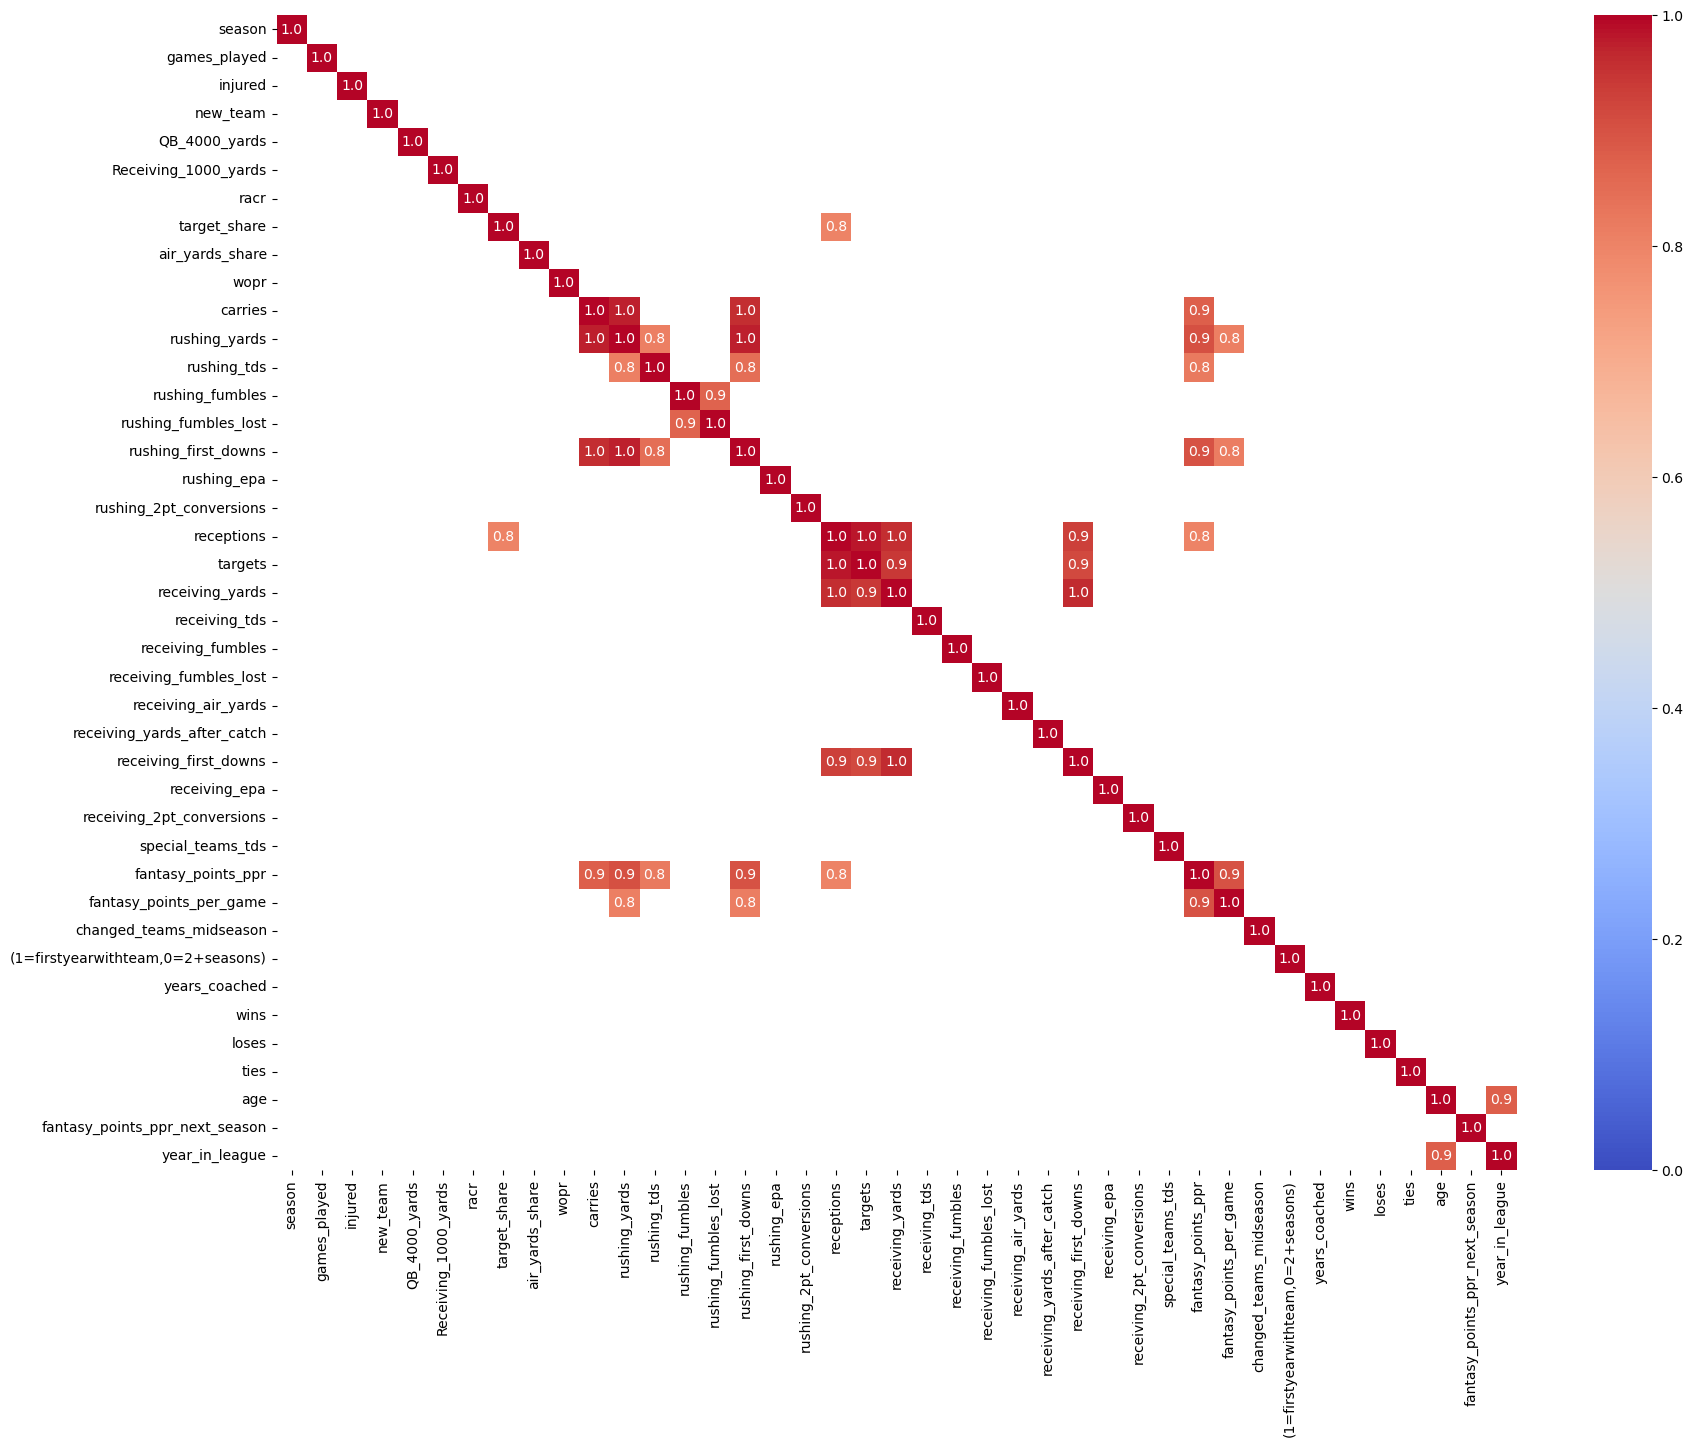

In [436]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_cols = rb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()
strong_corr = corr[corr > 0.80]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(strong_corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()


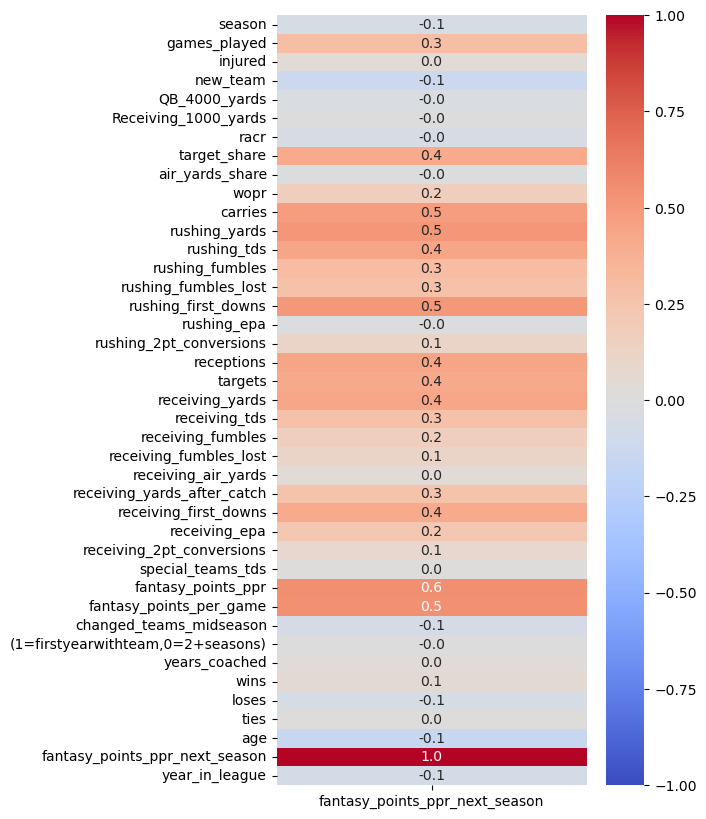

In [437]:
numeric_cols = rb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix and round it to two decimals
corr = numeric_cols.corr().round(2)

# Isolate the correlation of 'fantasy_points_ppr_next_season' with all other variables
corr_fantasy = corr[['fantasy_points_ppr_next_season']]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)  # Adjust the size based on the number of variables
sns.heatmap(corr_fantasy, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
plt.show()


In [438]:
rb_df.drop(columns=['age','loses','receiving_fumbles_lost','rushing_fumbles_lost','receiving_yards'
,'receptions','rushing_yards','rushing_tds', 'receiving_first_downs',
                    'targets','rushing_first_downs','carries'],inplace=True)

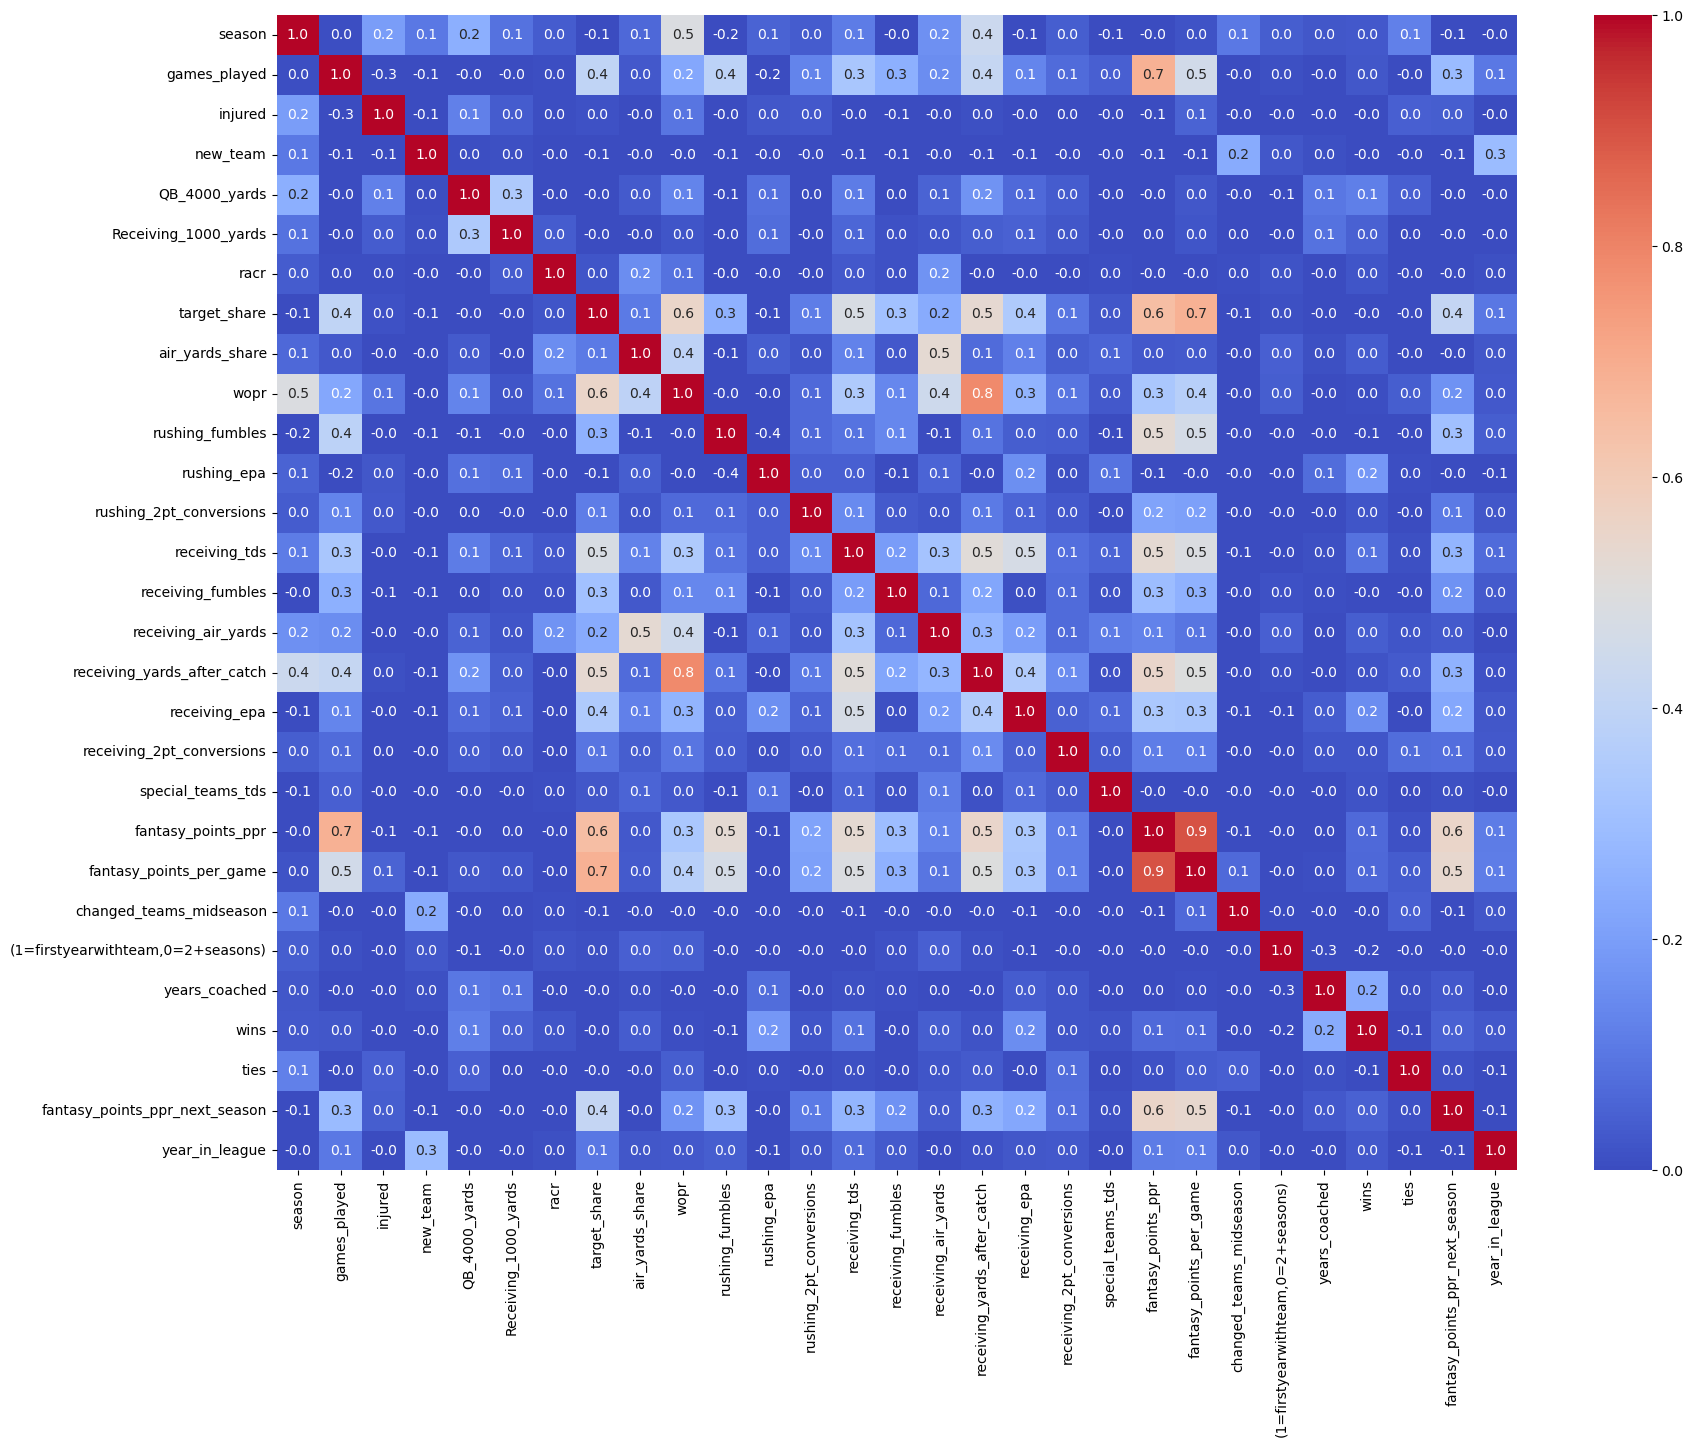

In [439]:
numeric_cols = rb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()


In [440]:
wr_df = df[(df['position'] == 'WR') | (df['position'] == 'TE')].copy()
wr_df.head()

player_id        player_name position  season  games_played  injured  \
2482  00-0000145  Derrick Alexander       WR    1999            16        0   
2483  00-0000145  Derrick Alexander       WR    2000            15        0   
2484  00-0000145  Derrick Alexander       WR    2001            13        1   
7331  00-0000166  Stephen Alexander       TE    1999            15        0   
7332  00-0000166  Stephen Alexander       TE    2000            16        0   

     injury type injury severity season ending  new_team  ...  wins  loses  \
2482   no injury       no injury     no injury         0  ...   9.0    7.0   
2483   no injury       no injury     no injury         0  ...   7.0    9.0   
2484    achilles            mild            no         0  ...   5.0   11.0   
7331   no injury       no injury     no injury         0  ...  10.0    6.0   
7332   no injury       no injury     no injury         0  ...   8.0    8.0   

      ties  age  binned_weight  binned_height   binned_draft_pick  \
2482   0.0   28        180-199          72-74    Late First Round   
2483   0.0   29        180-199          72-74    Late First Round   
2484   0.0   30        180-199          72-74    Late First Round   
7331   0.0   24        240-259          75-77  Early Second Round   
7332   0.0   25        240-259          75-77  Early Second Round   

      fantasy_points_next_season  fantasy_points_ppr_next_season  \
2482                       185.0                           257.0   
2483                        66.6                            93.6   
2484                        19.4                            33.4   
7331                        62.0                           108.0   
7332                         8.5                            17.5   

      year_in_league  
2482               6  
2483               7  
2484               8  
7331               2  
7332               3  

[5 rows x 69 columns]

In [441]:
wr_df.drop(columns=['Receiving_1000_yards','completions','attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota','fantasy_points_next_season', 'fantasy_points'],
           inplace=True)

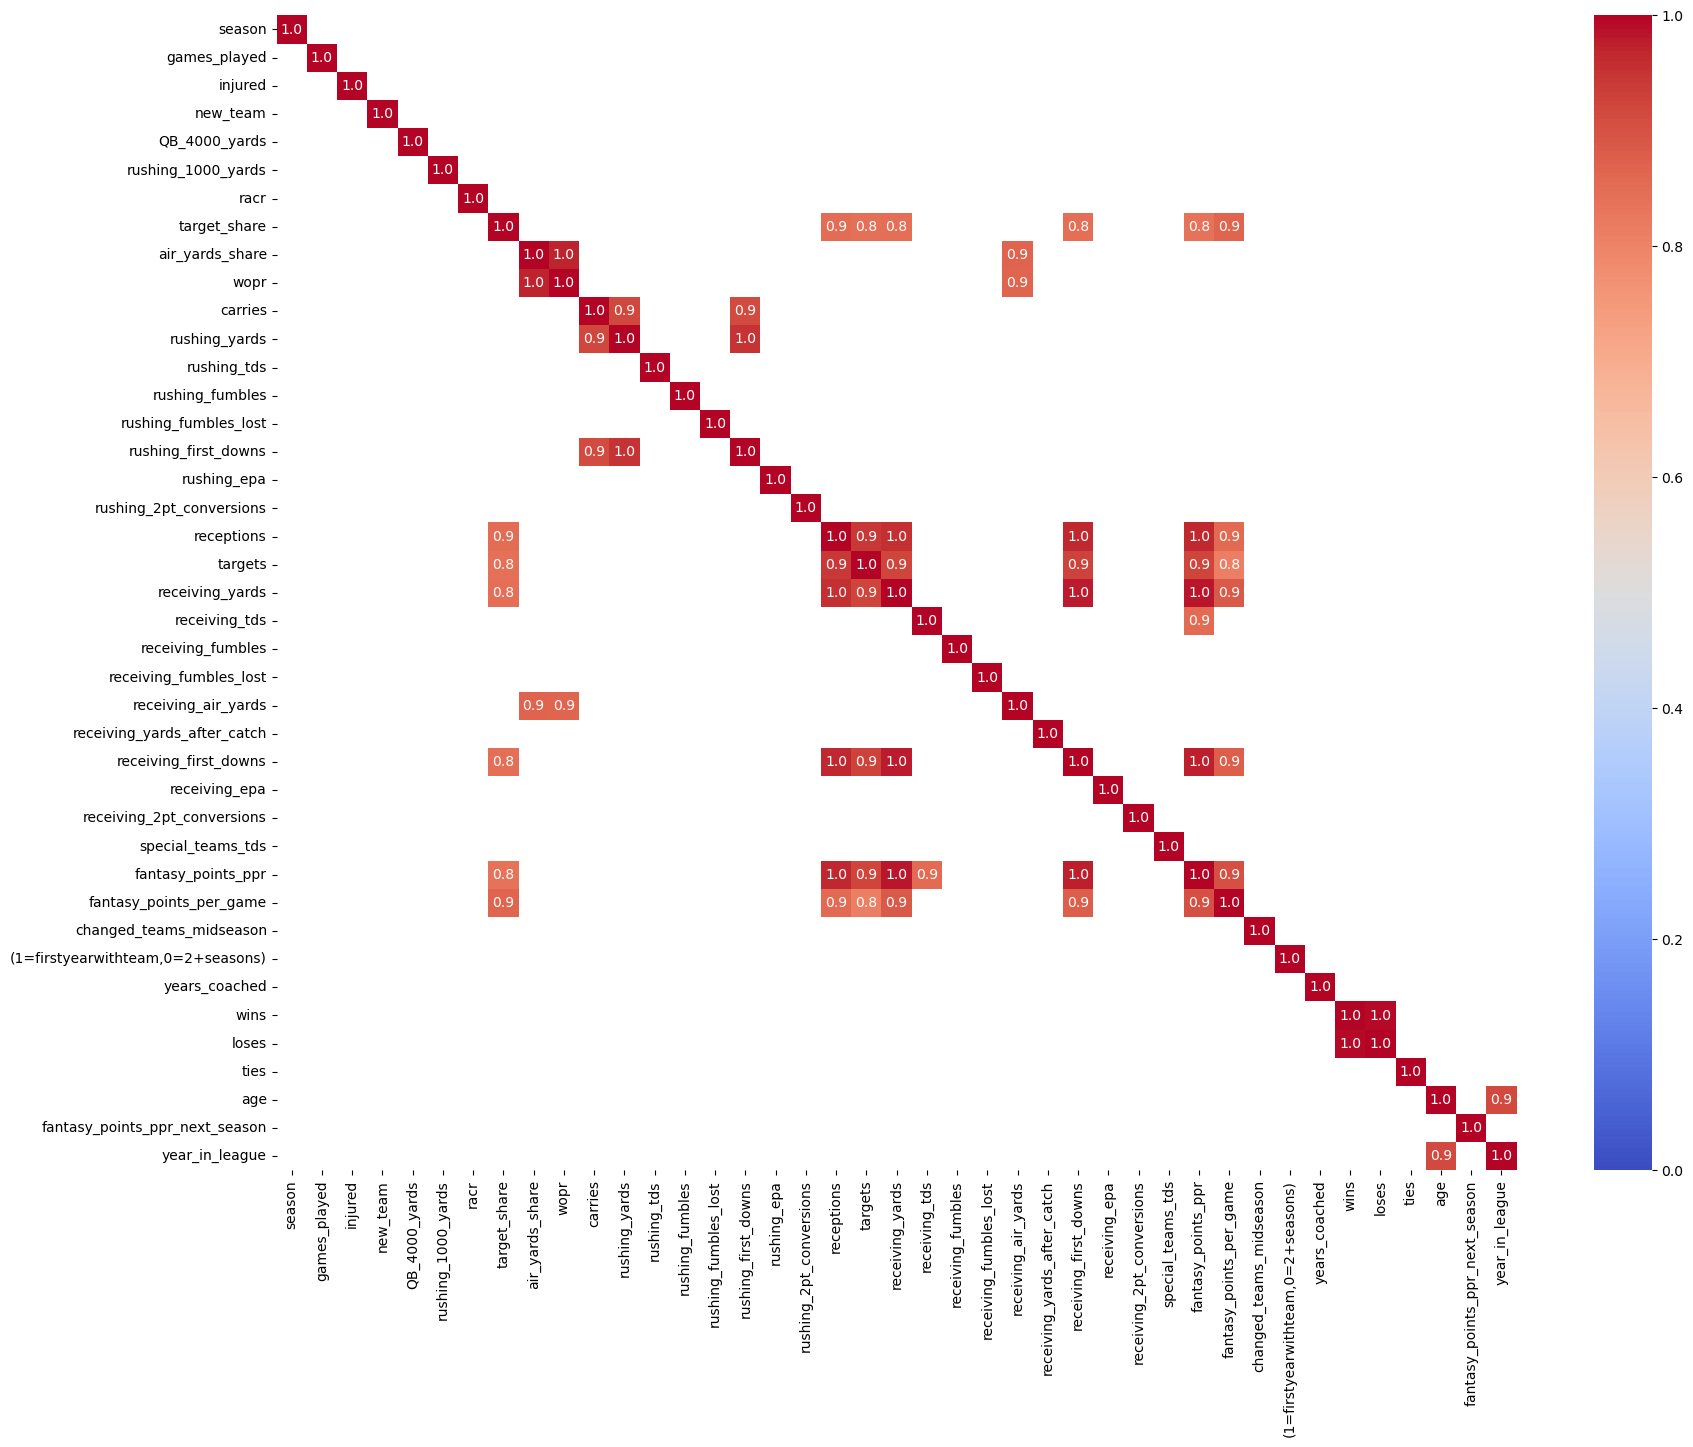

In [442]:
# Select only numeric columns
numeric_cols = wr_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr().abs()
strong_corr = corr[corr > 0.80]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(strong_corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

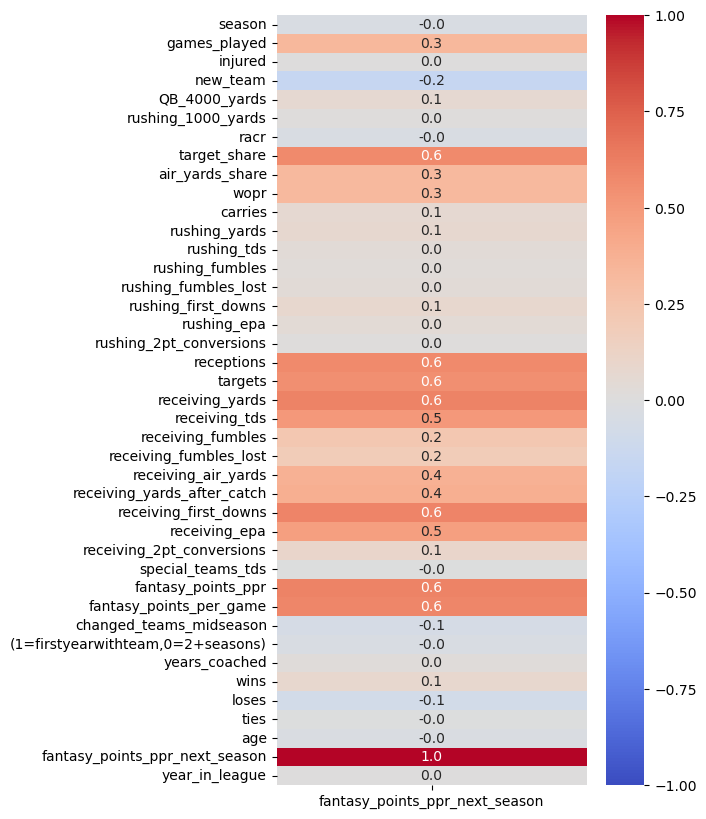

In [443]:
numeric_cols = wr_df.select_dtypes(include=[np.number])

# Compute the correlation matrix and round it to two decimals
corr = numeric_cols.corr()

# Isolate the correlation of 'fantasy_points_ppr_next_season' with all other variables
corr_fantasy = corr[['fantasy_points_ppr_next_season']]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)  # Adjust the size based on the number of variables
sns.heatmap(corr_fantasy, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
plt.show()

In [444]:
wr_df.drop(columns=['age','loses','receiving_fumbles_lost','rushing_fumbles_lost','receiving_yards'
,'receptions','receiving_first_downs','target_share','targets','receiving_tds','receiving_air_yards',
                    'wopr','rushing_first_downs','carries',],inplace=True)

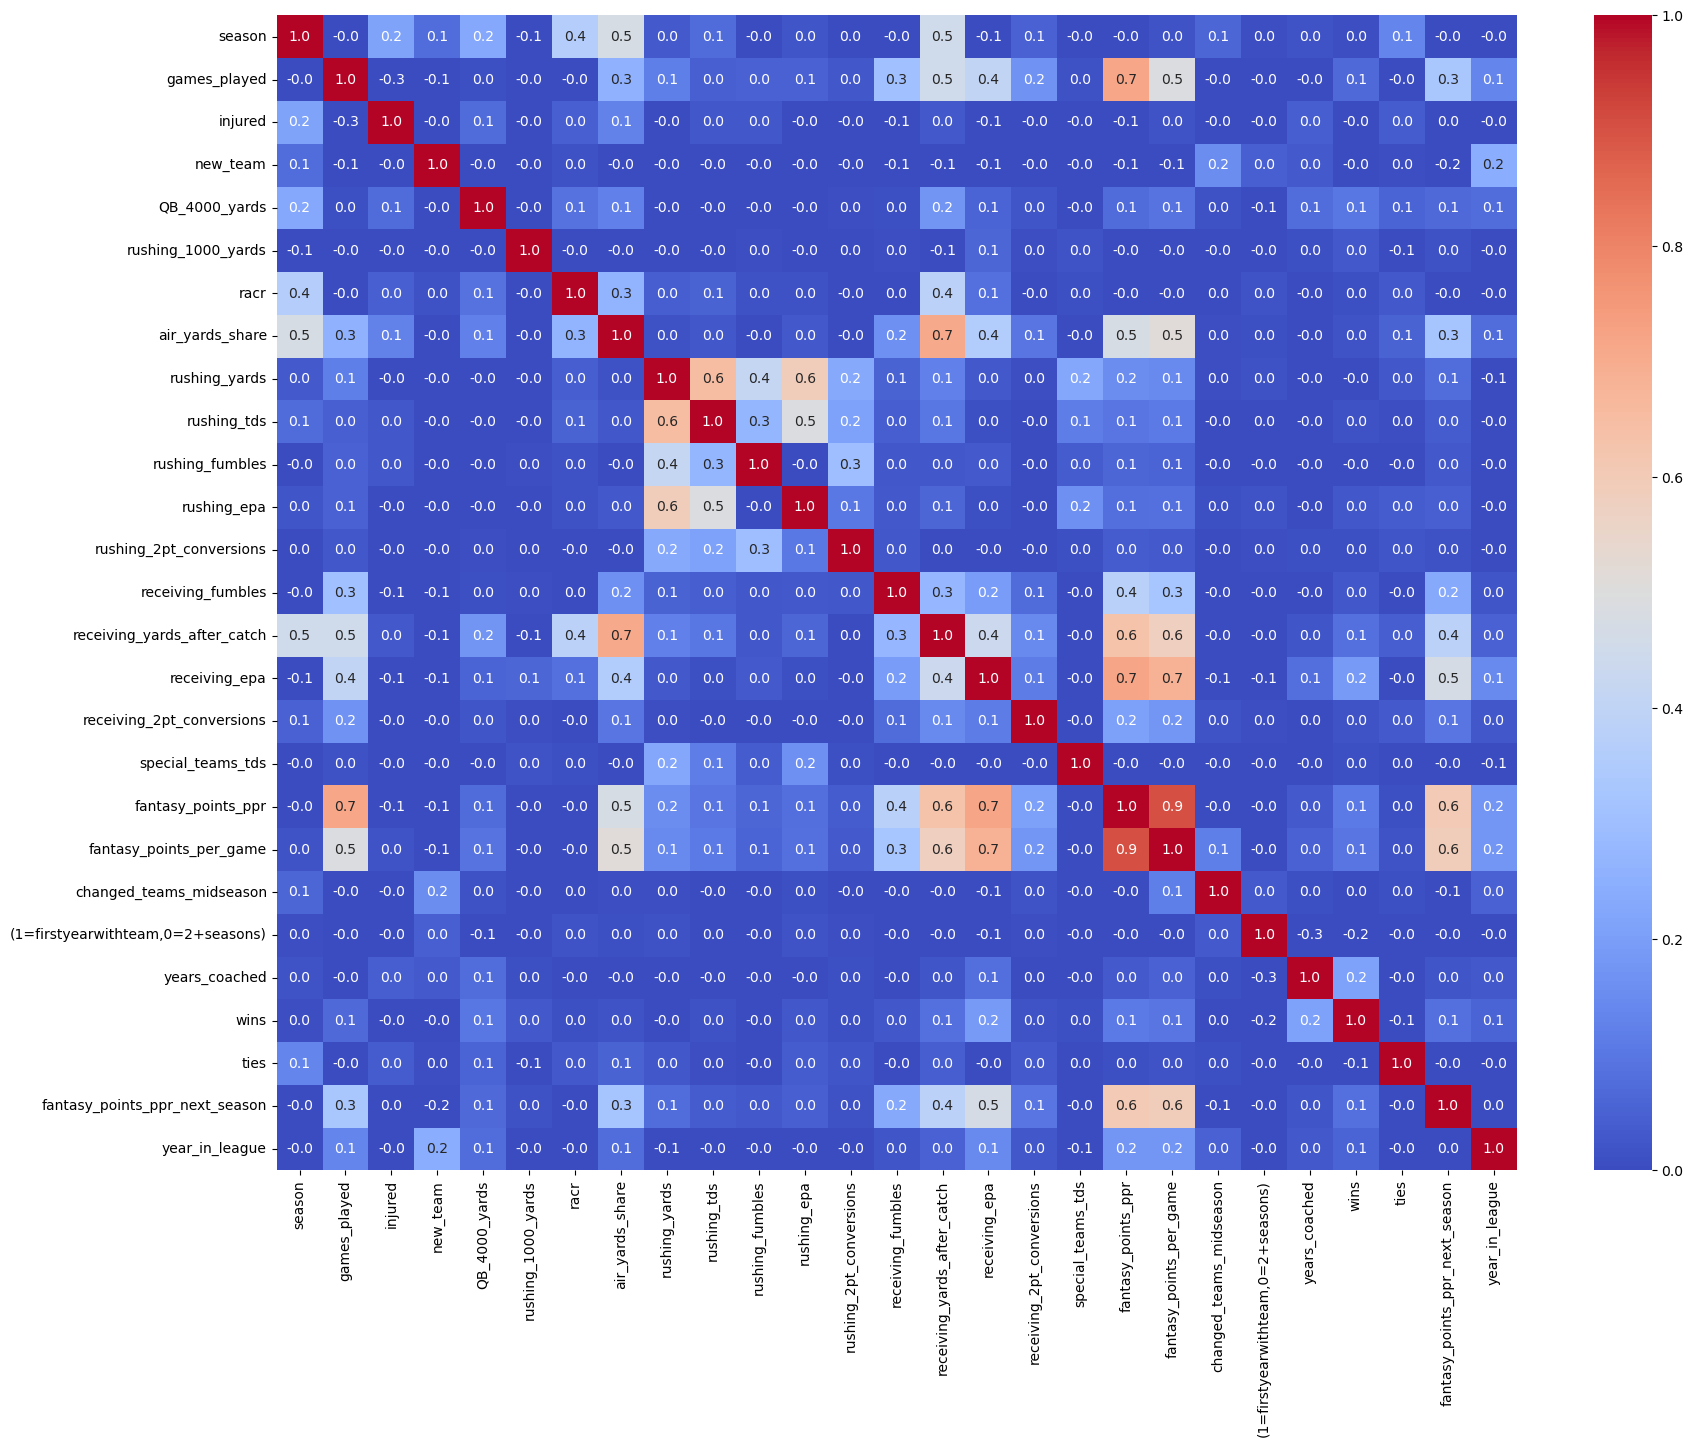

In [445]:
numeric_cols = wr_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

In [449]:
qb_df = df[(df['position'] == 'QB')].copy()
qb_df.head()

player_id  player_name position  season  games_played  injured  \
7988  00-0000104  Troy Aikman       QB    1999            14        0   
7787  00-0000722   Tony Banks       QB    1999            11        0   
7788  00-0000722   Tony Banks       QB    2000            11        0   
7789  00-0000722   Tony Banks       QB    2001            15        0   
7790  00-0000722   Tony Banks       QB    2003             6        0   

     injury type injury severity season ending  new_team  ...      wins  \
7988   no injury       no injury     no injury         0  ...  8.000000   
7787   no injury       no injury     no injury         0  ...  8.000000   
7788   no injury       no injury     no injury         0  ...  8.000000   
7789   no injury       no injury     no injury         1  ...  8.043157   
7790   no injury       no injury     no injury         1  ...  5.000000   

         loses     ties  age  binned_weight  binned_height  \
7988   8.00000  0.00000   33        200-219          75-77   
7787   8.00000  0.00000   26        220-239          75-77   
7788   8.00000  0.00000   27        220-239          75-77   
7789   8.03855  0.03661   28        220-239          75-77   
7790  11.00000  0.00000   30        220-239          75-77   

       binned_draft_pick  fantasy_points_next_season  \
7988               Top 5                       63.94   
7787  Early Second Round                       85.22   
7788  Early Second Round                      136.64   
7789  Early Second Round                       44.42   
7790  Early Second Round                        0.64   

      fantasy_points_ppr_next_season  year_in_league  
7988                           63.94              11  
7787                           85.22               4  
7788                          136.64               5  
7789                           44.42               6  
7790                            0.64               8  

[5 rows x 69 columns]

In [450]:
df.columns

Index(['player_id', 'player_name', 'position', 'season', 'games_played',
       'injured', 'injury type', 'injury severity', 'season ending',
       'new_team', 'QB_4000_yards', 'Receiving_1000_yards',
       'rushing_1000_yards', 'racr', 'target_share', 'air_yards_share', 'wopr',
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversio

In [451]:
qb_df.drop(columns=['receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'special_teams_tds', 'fantasy_points',
        'QB_4000_yards', 'racr', 'target_share', 'air_yards_share', 'wopr',
                    'fantasy_points_next_season'],inplace=True)

In [453]:
starting_data = pd.read_excel('QBstarterbackup.xlsx')
qb_df = qb_df.merge(starting_data, how = 'inner', on = ['player_id', 'season'] )

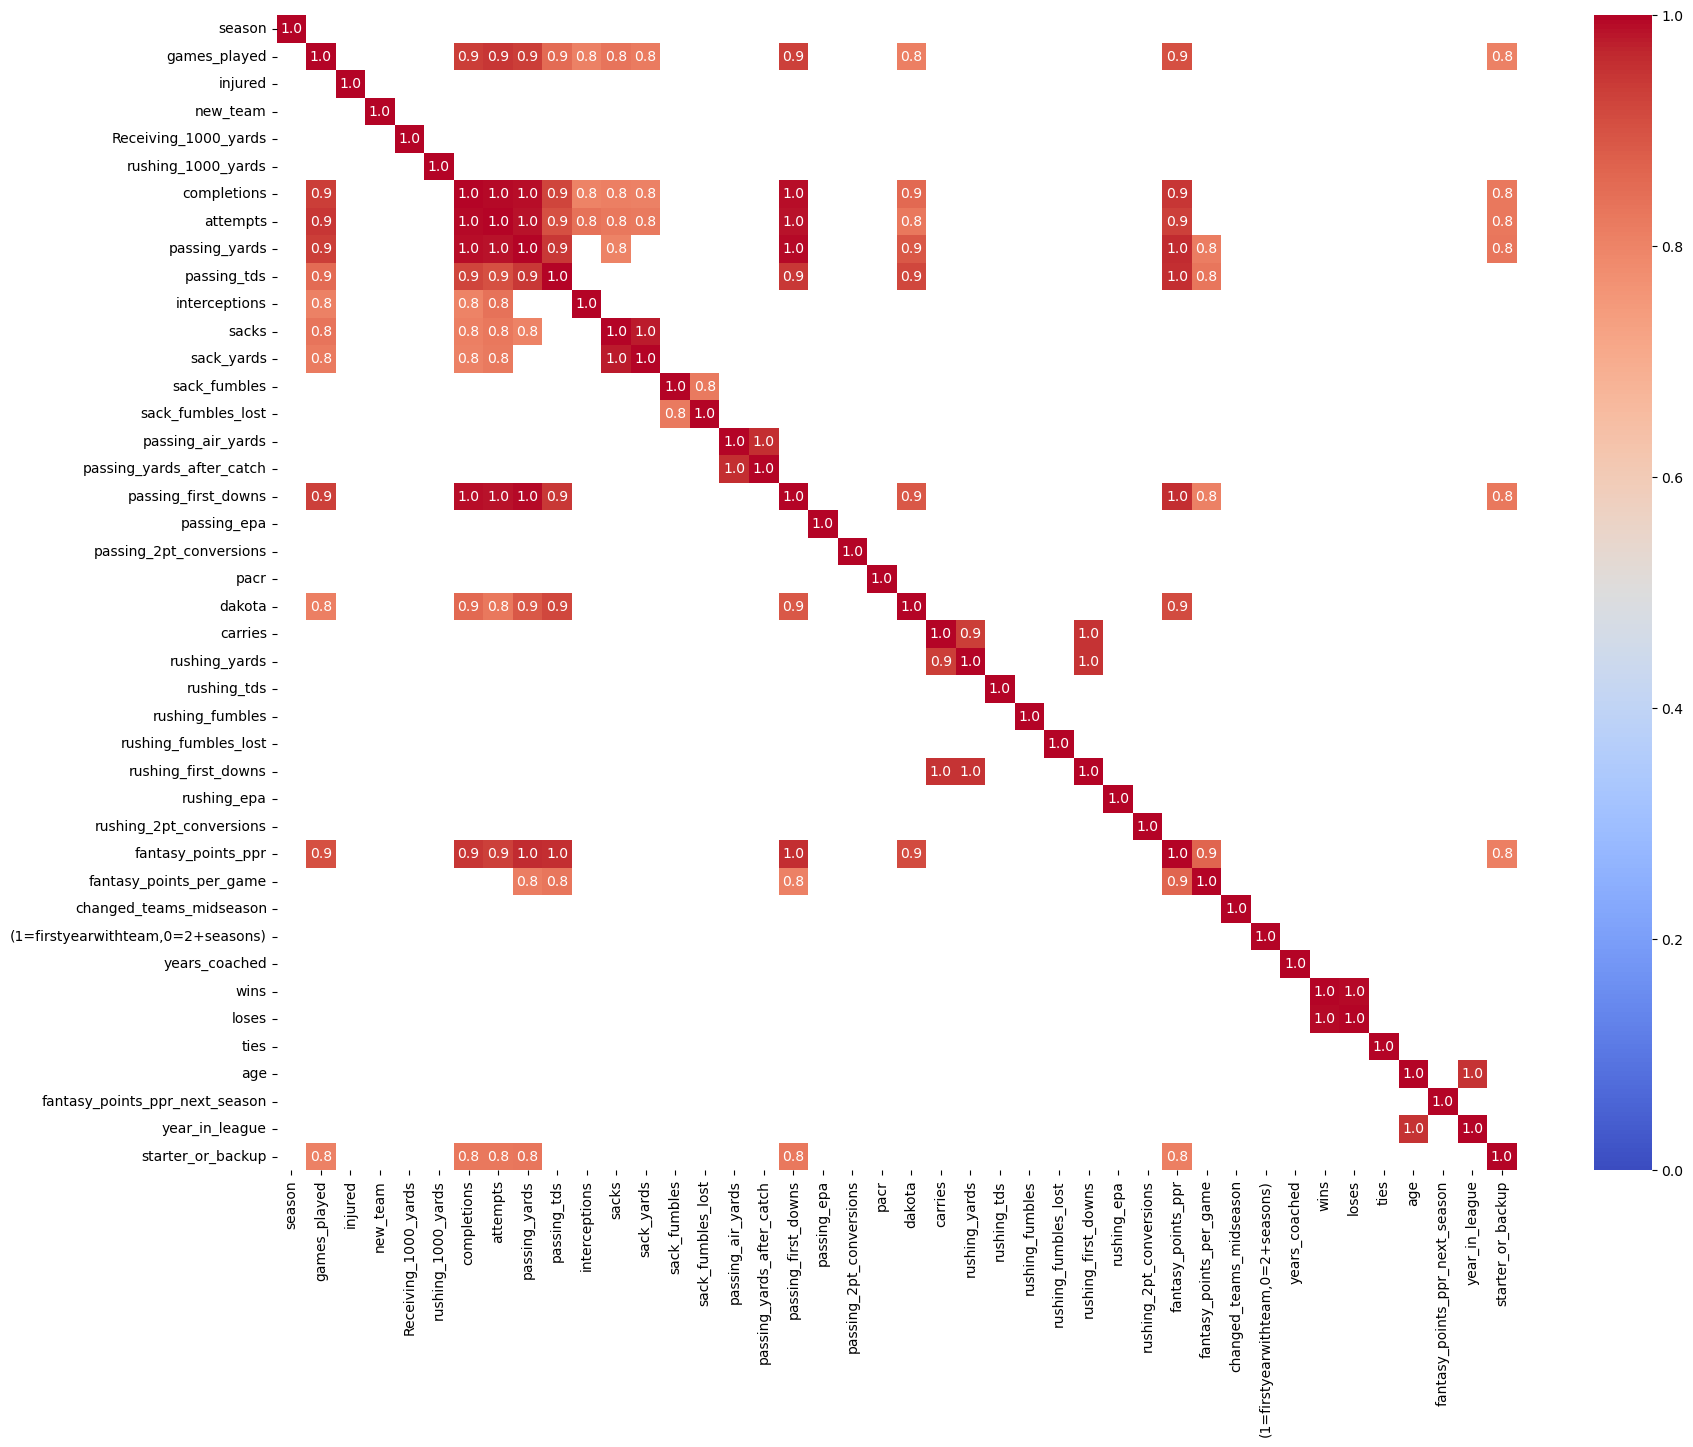

In [454]:
# Select only numeric columns
numeric_cols = qb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr().abs()
strong_corr = corr[corr > 0.80]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(strong_corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

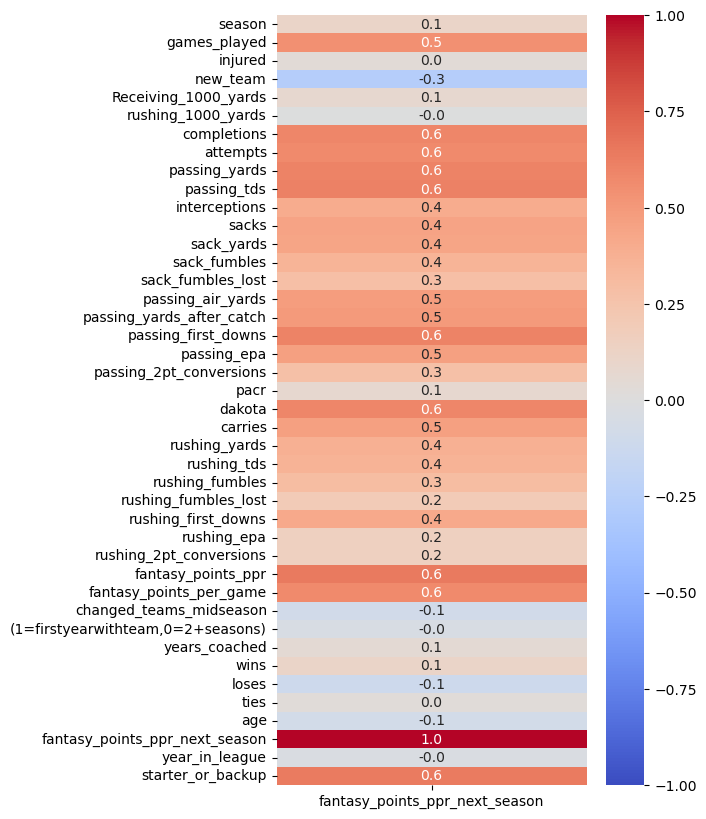

In [455]:
numeric_cols = qb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix and round it to two decimals
corr = numeric_cols.corr()

# Isolate the correlation of 'fantasy_points_ppr_next_season' with all other variables
corr_fantasy = corr[['fantasy_points_ppr_next_season']]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)  # Adjust the size based on the number of variables
sns.heatmap(corr_fantasy, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
plt.show()

In [456]:
qb_df.drop(columns=['completions', 'attempts','passing_yards', 'passing_tds',
                    'passing_first_downs','dakota','loses','age','passing_air_yards','sack_yards',
                    'carries','rushing_first_downs','sack_fumbles_lost'],inplace=True)

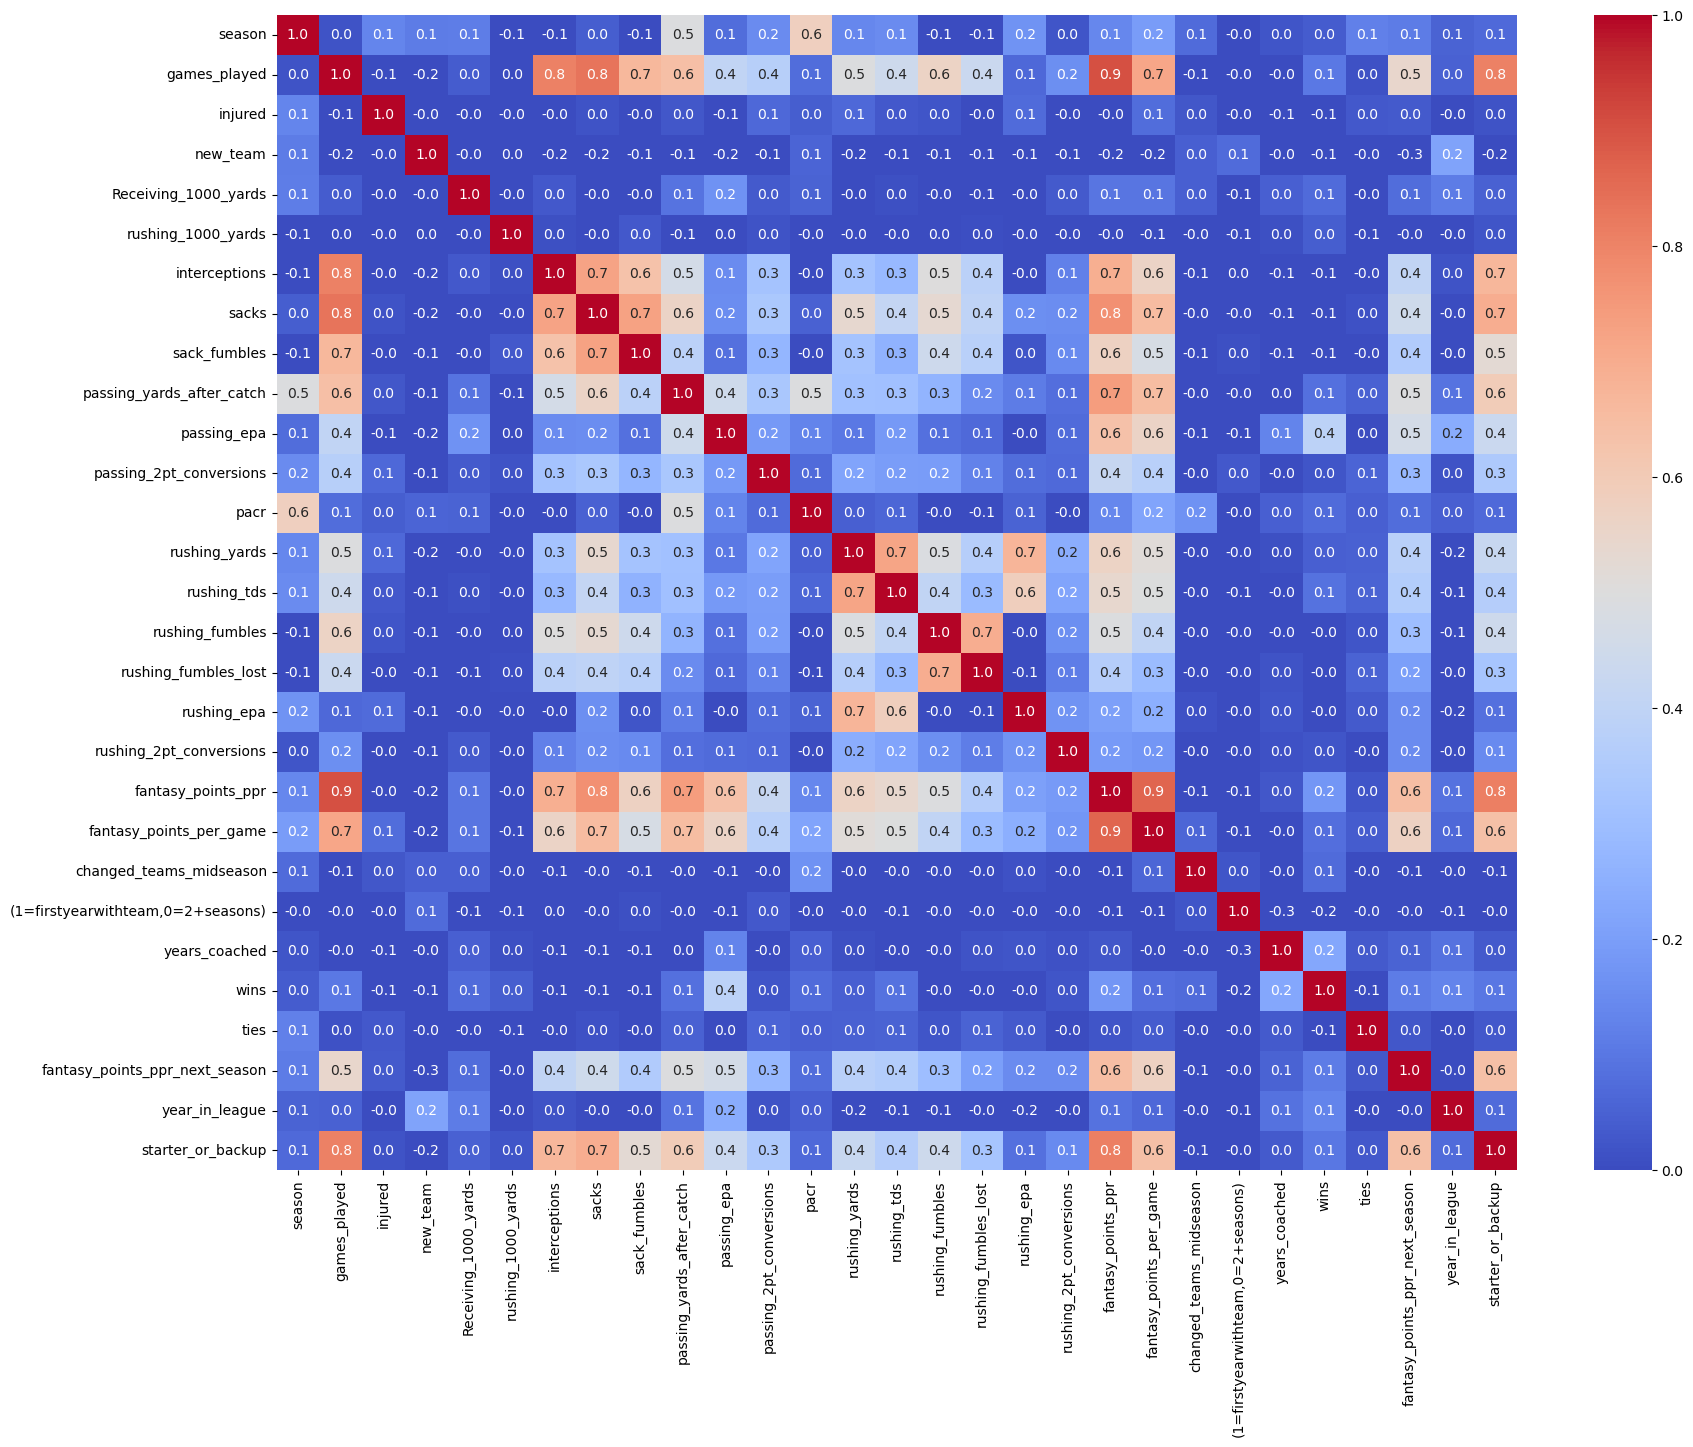

In [457]:
numeric_cols = qb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

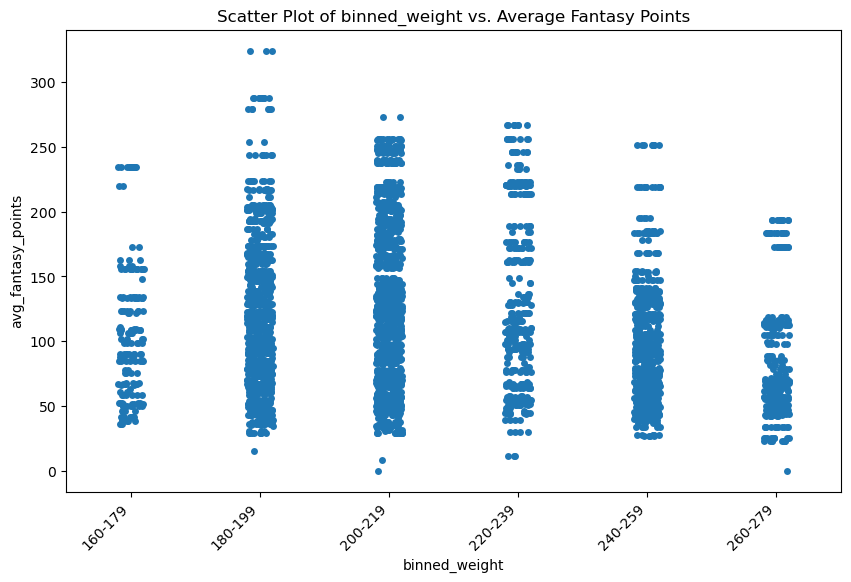

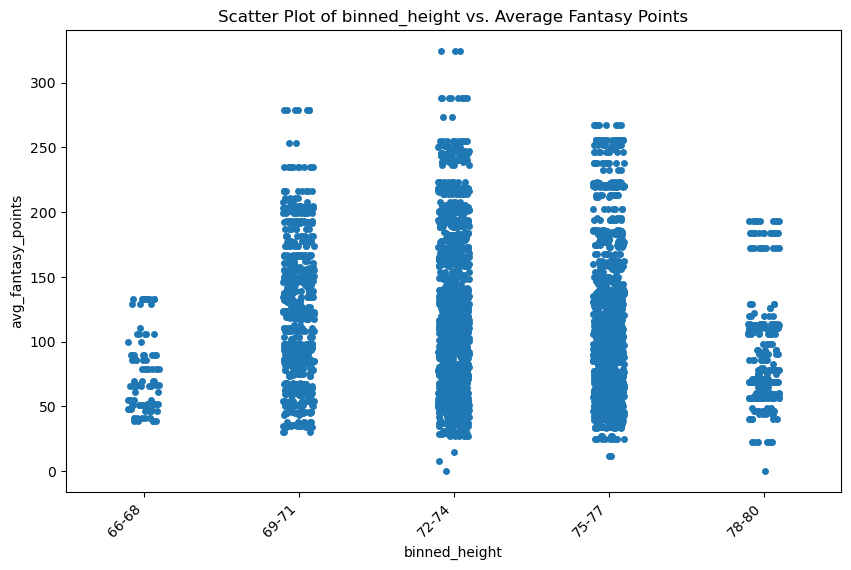

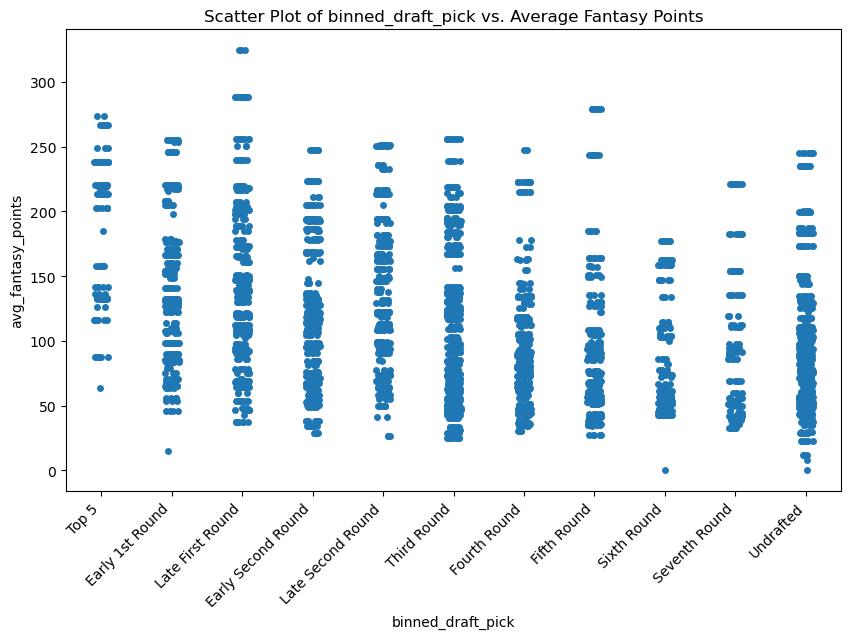

In [458]:
temp_df = wr_df
temp_df['avg_fantasy_points'] = temp_df.groupby('player_id')['fantasy_points_ppr'].transform('mean')

non_numeric_cols=df[['binned_weight','binned_height','binned_draft_pick']]
# Plot each non-numeric column against 'fantasy_points_ppr_next_season'
for column in non_numeric_cols.columns:
    plt.figure(figsize=(10, 6))
    # Use seaborn to create a scatter plot. As seaborn scatter plot does not directly support non-numeric data,
    # we use a category plot or strip plot here.
    sns.stripplot(x=column, y='avg_fantasy_points', data=temp_df)

    # Providing a title for each plot
    plt.title(f'Scatter Plot of {column} vs. Average Fantasy Points')

    # Improve plot readability by rotating x labels if they are too long or numerous
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

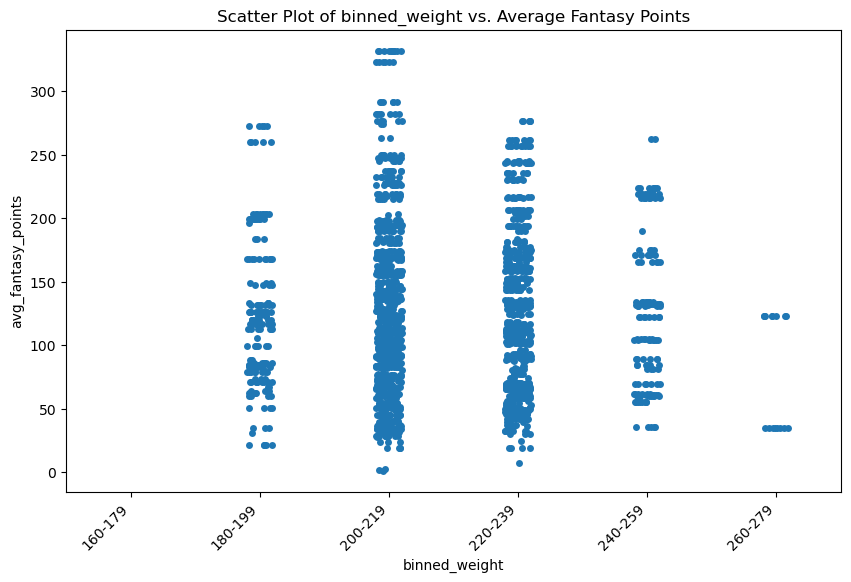

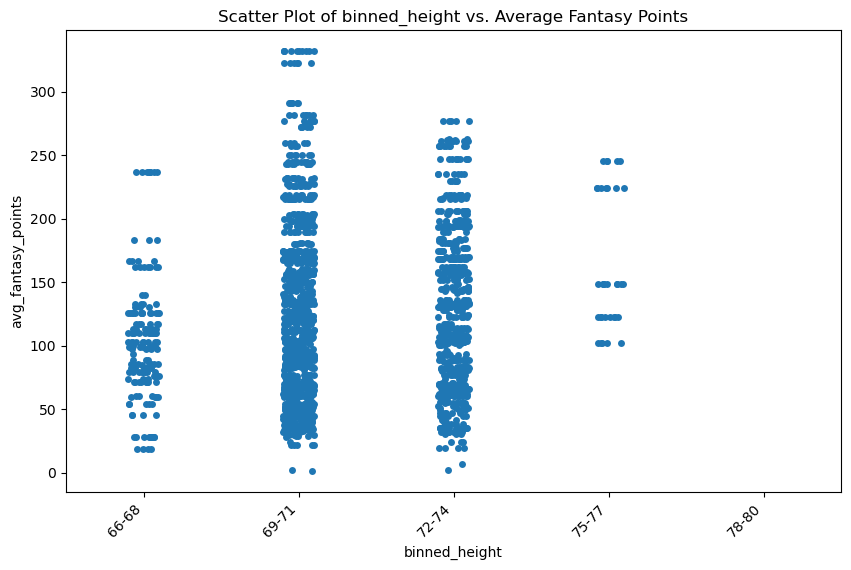

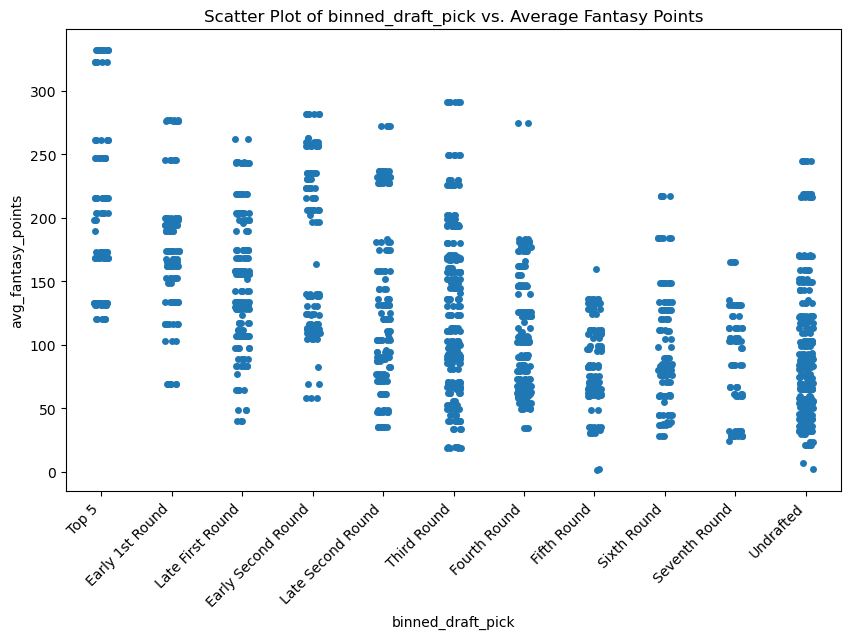

In [459]:
temp_df = rb_df
temp_df['avg_fantasy_points'] = temp_df.groupby('player_id')['fantasy_points_ppr'].transform('mean')

non_numeric_cols=df[['binned_weight','binned_height','binned_draft_pick']]
# Plot each non-numeric column against 'fantasy_points_ppr_next_season'
for column in non_numeric_cols.columns:
    plt.figure(figsize=(10, 6))
    # Use seaborn to create a scatter plot. As seaborn scatter plot does not directly support non-numeric data,
    # we use a category plot or strip plot here.
    sns.stripplot(x=column, y='avg_fantasy_points', data=temp_df)

    # Providing a title for each plot
    plt.title(f'Scatter Plot of {column} vs. Average Fantasy Points')

    # Improve plot readability by rotating x labels if they are too long or numerous
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

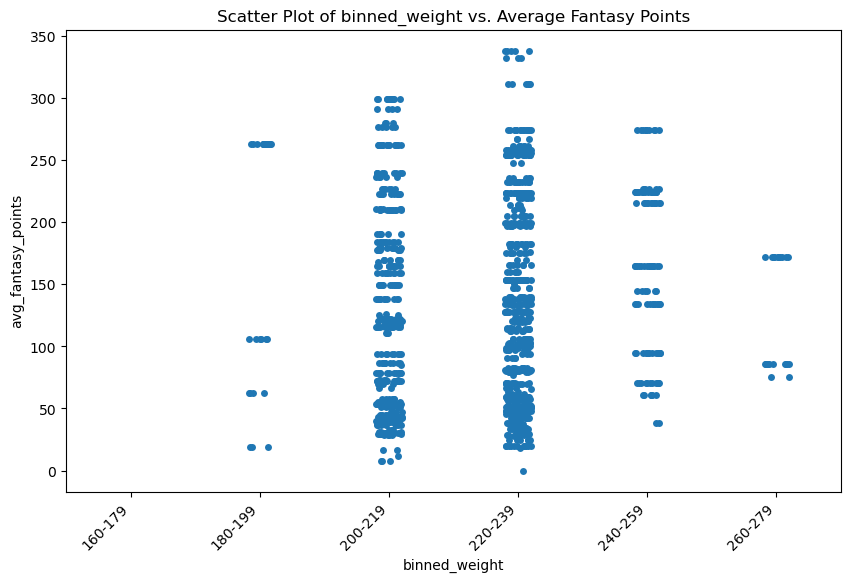

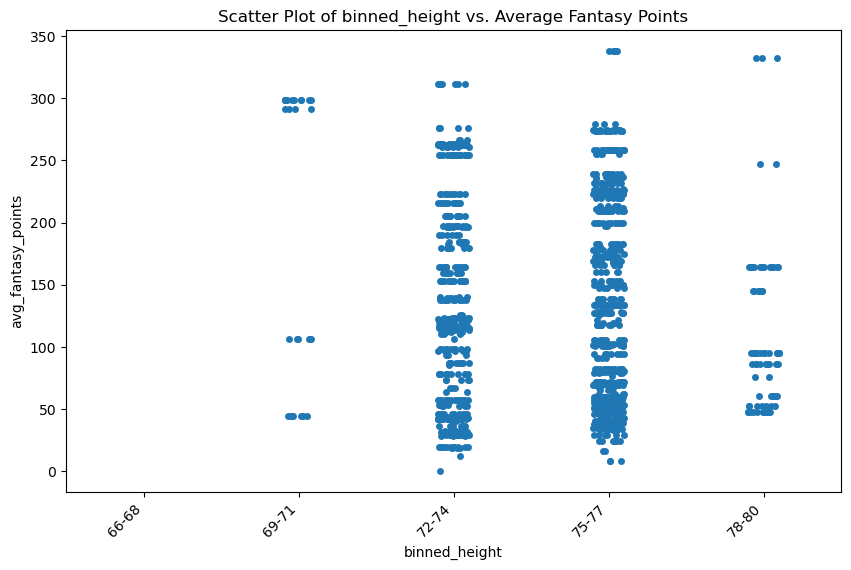

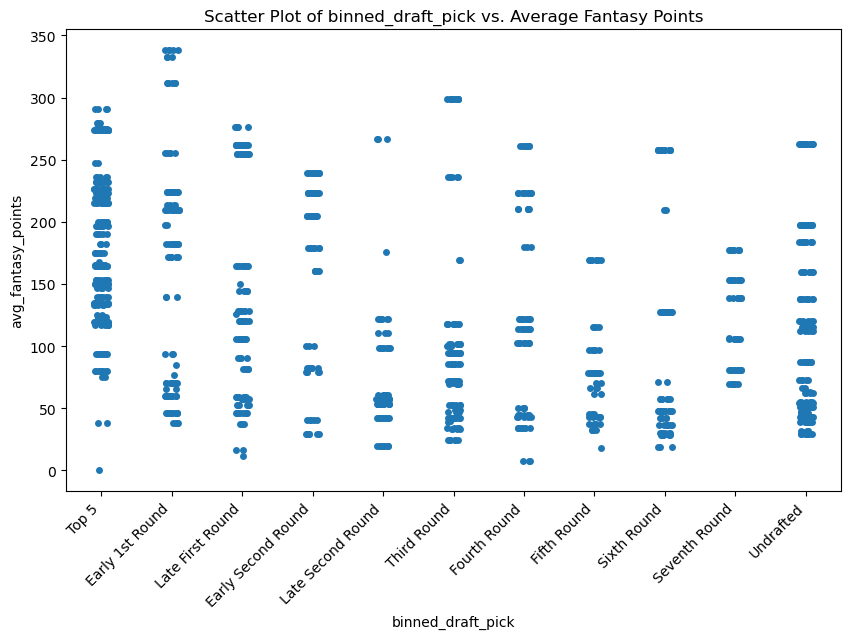

In [460]:
temp_df = qb_df
temp_df['avg_fantasy_points'] = temp_df.groupby('player_id')['fantasy_points_ppr'].transform('mean')

non_numeric_cols=df[['binned_weight','binned_height','binned_draft_pick']]
# Plot each non-numeric column against 'fantasy_points_ppr_next_season'
for column in non_numeric_cols.columns:
    plt.figure(figsize=(10, 6))
    # Use seaborn to create a scatter plot. As seaborn scatter plot does not directly support non-numeric data,
    # we use a category plot or strip plot here.
    sns.stripplot(x=column, y='avg_fantasy_points', data=temp_df)

    # Providing a title for each plot
    plt.title(f'Scatter Plot of {column} vs. Average Fantasy Points')

    # Improve plot readability by rotating x labels if they are too long or numerous
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

In [461]:
wr_df.groupby('binned_draft_pick')['fantasy_points_ppr'].agg(['mean','median','max'])

mean  median    max
binned_draft_pick                            
Top 5               190.130991  191.40  359.2
Early 1st Round     143.469069  144.20  369.1
Late First Round    138.337039  126.50  385.3
Early Second Round  121.077433  112.90  374.6
Late Second Round   135.104723  121.30  358.4
Third Round         116.295292  102.10  439.5
Fourth Round         94.386504   81.70  339.2
Fifth Round          92.261625   81.00  341.2
Sixth Round          90.235238   82.20  297.7
Seventh Round        94.472464   78.65  282.2
Undrafted            91.274828   79.60  390.9

In [462]:
wr_injury = wr_df.groupby(['injury severity','injury type'])['fantasy_points_ppr_next_season'].agg(['mean','median','std','count'])
wr_injury[wr_injury['count'] > 20].sort_values(by=['injury severity','median'])

mean  median        std  count
injury severity injury type                                      
mild            knee          85.839024   67.40  69.015874     41
                concussion   113.398400   78.40  92.288983     25
                ankle        118.255686  109.10  79.593262     51
                shoulder     123.990476  118.20  81.059212     21
                hamstring    127.446897  122.40  93.685301     29
minor           hamstring    113.759444  104.27  69.343313     36
                ankle        146.595484  153.60  83.868409     31
                knee         168.882759  165.20  78.032429     29
moderate        knee         102.957037   88.10  72.466637     27
                hamstring    128.262000  100.95  95.777575     30
                ankle        101.569231  105.20  66.206198     26
no injury       no injury    110.502422   97.10  80.756893   3047
severe          foot          59.742857   31.00  78.374834     21
                knee          90.233171   64.50  79.434357     41
                acl          108.521739  107.50  69.990960     23

In [463]:
rb_injury = rb_df.groupby(['injury severity','injury type'])['fantasy_points_ppr_next_season'].agg(['mean','median','std','count'])
rb_injury[rb_injury['count'] > 15].sort_values(by=['injury severity','median'])

mean  median         std  count
injury severity injury type                                       
mild            hamstring     90.893750   79.55   66.095421     16
                knee         127.683333  122.80   92.467203     36
                ankle        169.115862  178.10   89.113578     29
minor           ankle        139.723810  142.20   99.301621     21
moderate        knee         104.083333   79.95   68.253052     18
                ankle        119.892222  115.80  100.969369     18
no injury       no injury    113.635485   93.75   91.269150   1422
severe          acl           72.862500   46.05   71.467287     16
                knee         116.101739   87.60   93.080437     23

In [464]:
qb_injury = rb_df.groupby(['injury severity','injury type'])['fantasy_points_ppr_next_season'].agg(['mean','median','std','count'])
qb_injury[rb_injury['count'] > 5].sort_values(by=['injury severity','median'])

mean  median         std  count
injury severity injury type                                       
mild            foot          95.716667   79.55   77.586788      6
                hamstring     90.893750   79.55   66.095421     16
                toe          129.746667   79.95  110.685144      6
                shoulder     109.622222   98.60   88.302106      9
                knee         127.683333  122.80   92.467203     36
                concussion   148.644444  144.60   79.247163      9
                ankle        169.115862  178.10   89.113578     29
                leg          127.866667  181.30  109.354012      9
minor           knee          89.518182   41.80   96.613589     11
                calf         115.562500   97.65   99.037034      8
                leg          142.960000  117.40  131.913972     10
                hamstring    167.434000  133.22  102.665431     10
                concussion   140.788889  140.10  105.833837      9
                ankle        139.723810  142.20   99.301621     21
                shoulder     179.583333  184.60   92.115393      6
moderate        knee         104.083333   79.95   68.253052     18
                leg           96.522222   81.30   86.242098      9
                mcl          107.250000   99.00   74.663800      6
                ankle        119.892222  115.80  100.969369     18
no injury       no injury    113.635485   93.75   91.269150   1422
severe          acl           72.862500   46.05   71.467287     16
                leg           82.377778   53.50   74.833662      9
                ankle         85.866667   68.40   64.738976      9
                knee         116.101739   87.60   93.080437     23
                foot         181.145714  208.00  101.567778      7

In [465]:
conditions = (rb_df['injury severity'].isin(['minor', 'mild']))

# Replace 'injury_severity' under specified conditions
rb_df.loc[conditions, 'injury severity'] = 'no injury'

# Replace 'injury_type' and 'season_ending' under specified conditions
rb_df.loc[conditions, ['injury type', 'season ending']] = 'no injury'

# Update 'injured' column under specified conditions
rb_df.loc[conditions, 'injured'] = 1

In [466]:
conditions = (qb_df['injury severity'].isin(['minor', 'mild']))

# Replace 'injury_severity' under specified conditions
qb_df.loc[conditions, 'injury severity'] = 'no injury'

# Replace 'injury_type' and 'season_ending' under specified conditions
qb_df.loc[conditions, ['injury type', 'season ending']] = 'no injury'

# Update 'injured' column under specified conditions
qb_df.loc[conditions, 'injured'] = 1

In [467]:
conditions = (wr_df['injury severity'].isin(['minor', 'mild']))

# Replace 'injury_severity' under specified conditions
wr_df.loc[conditions, 'injury severity'] = 'no injury'

# Replace 'injury_type' and 'season_ending' under specified conditions
wr_df.loc[conditions, ['injury type', 'season ending']] = 'no injury'

# Update 'injured' column under specified conditions
wr_df.loc[conditions, 'injured'] = 1

In [468]:
wr_df['injury severity'].unique()

array(['no injury', 'severe', 'moderate', 'suspension', 'mild, severe',
       'mild, minor', 'modeate'], dtype=object)

# Modeling 

## Quaterback Analysis

### Regression

In [469]:
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from  sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statistics as stat
import math
import sklearn.metrics


In [503]:
#function to test for correlation between the independent variables
def multicollinearity(x):
  vif_data = pd.DataFrame()
  vif_data["feature"] = x.columns
  vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

  for index, row in vif_data.iterrows():
      print(row)
  return vif_data

In [471]:
qb_df.columns

Index(['player_id', 'player_name', 'position', 'season', 'games_played',
       'injured', 'injury type', 'injury severity', 'season ending',
       'new_team', 'Receiving_1000_yards', 'rushing_1000_yards',
       'interceptions', 'sacks', 'sack_fumbles', 'passing_yards_after_catch',
       'passing_epa', 'passing_2pt_conversions', 'pacr', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost', 'rushing_epa',
       'rushing_2pt_conversions', 'fantasy_points_ppr',
       'fantasy_points_per_game', 'changed_teams_midseason',
       '(1=firstyearwithteam,0=2+seasons)', 'years_coached', 'wins', 'ties',
       'binned_weight', 'binned_height', 'binned_draft_pick',
       'fantasy_points_ppr_next_season', 'year_in_league', 'starter_or_backup',
       'avg_fantasy_points'],
      dtype='object')

In [472]:
qb_df.dropna(axis = 0, inplace=True)

In [473]:
#function to check for correlation
def prediction_scatterplot(actual, pred):
  plt.figure(figsize=(8, 6))
  plt.scatter(actual, pred, color='blue')
  plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Actual vs. Predicted')
  plt.show()


In [474]:
#function to get the model
def linear_reg(x_train, x_test, y_train, y_test, test_ids_names=None):
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    x_train2 = sm.add_constant(x_train)
    reg = sm.OLS(y_train, x_train2)
    reg1 = reg.fit()
    print(reg1.summary())
    y_pred_train = lr.predict(x_train)
    #accuracy of training data
    prediction_scatterplot(y_train, y_pred_train)
    mse_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
    print(f"RMSE Training = { math.sqrt(mse_train)}")

    #accuracy of test data
    y_pred_test = lr.predict(x_test)

    prediction_scatterplot(y_test, y_pred_test)

    mse_test = sklearn.metrics.mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    print(f"RMSE Testing = {rmse_test}")
    if test_ids_names is not None:
      results = pd.DataFrame({
        'player_id': test_ids_names['player_id'],
        'player_name': test_ids_names['player_name'],
        'actual_fantasy_points': test_y,
        'predicted_fantasy_points': y_pred_test
    })

      results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
      results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
      results = results.sort_values('predicted_fantasy_points',ascending=False)
      top = results.head(10)

      top_predictions(top)

In [512]:
#converts all the categorical and binned data
x = pd.get_dummies(qb_df.drop(columns=['player_id', 'player_name','season','fantasy_points_ppr_next_season']),drop_first=True).astype(float)
y = qb_df['fantasy_points_ppr_next_season'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)


In [508]:
multicollinearity(x)

C:\Users\alexs\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


feature    games_played
VIF           14.598542
Name: 0, dtype: object
feature     injured
VIF        1.924858
Name: 1, dtype: object
feature    new_team
VIF        1.235257
Name: 2, dtype: object
feature    Receiving_1000_yards
VIF                    1.145257
Name: 3, dtype: object
feature    rushing_1000_yards
VIF                  1.106546
Name: 4, dtype: object
feature    interceptions
VIF             4.411649
Name: 5, dtype: object
feature       sacks
VIF        6.358619
Name: 6, dtype: object
feature    sack_fumbles
VIF            2.521415
Name: 7, dtype: object
feature    passing_yards_after_catch
VIF                          4.41535
Name: 8, dtype: object
feature    passing_epa
VIF           6.975443
Name: 9, dtype: object
feature    passing_2pt_conversions
VIF                       1.431272
Name: 10, dtype: object
feature        pacr
VIF        1.830095
Name: 11, dtype: object
feature    rushing_yards
VIF             6.370319
Name: 12, dtype: object
feature    rushing_tds
VIF  

feature        VIF
0                      games_played  14.598542
1                           injured   1.924858
2                          new_team   1.235257
3              Receiving_1000_yards   1.145257
4                rushing_1000_yards   1.106546
..                              ...        ...
87   binned_draft_pick_Fourth Round   1.434088
88    binned_draft_pick_Fifth Round   1.392348
89    binned_draft_pick_Sixth Round   1.607498
90  binned_draft_pick_Seventh Round   1.370898
91      binned_draft_pick_Undrafted   2.287796

[92 rows x 2 columns]

In [514]:
x.drop(columns = ['fantasy_points_ppr', 'injury type_knee', 'injury type_no injury', 'injury type_shoulder', 'injury severity_moderate', 'injury severity_no injury', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_72-74', 'games_played'], inplace = True)

In [515]:
multicollinearity(x)

feature     injured
VIF        2.221627
Name: 0, dtype: object
feature    new_team
VIF        1.545912
Name: 1, dtype: object
feature    Receiving_1000_yards
VIF                    2.285311
Name: 2, dtype: object
feature    rushing_1000_yards
VIF                  1.818349
Name: 3, dtype: object
feature    interceptions
VIF             8.568505
Name: 4, dtype: object
feature        sacks
VIF        13.373769
Name: 5, dtype: object
feature    sack_fumbles
VIF            5.612737
Name: 6, dtype: object
feature    passing_yards_after_catch
VIF                         5.957312
Name: 7, dtype: object
feature    passing_epa
VIF           3.101883
Name: 8, dtype: object
feature    passing_2pt_conversions
VIF                       1.757984
Name: 9, dtype: object
feature        pacr
VIF        3.917223
Name: 10, dtype: object
feature    rushing_yards
VIF             8.595468
Name: 11, dtype: object
feature    rushing_tds
VIF           3.771005
Name: 12, dtype: object
feature    rushing_fumbles
V

feature       VIF
0                           injured  2.221627
1                          new_team  1.545912
2              Receiving_1000_yards  2.285311
3                rushing_1000_yards  1.818349
4                     interceptions  8.568505
..                              ...       ...
77   binned_draft_pick_Fourth Round  1.468768
78    binned_draft_pick_Fifth Round  1.345906
79    binned_draft_pick_Sixth Round  1.610567
80  binned_draft_pick_Seventh Round  1.354592
81      binned_draft_pick_Undrafted  2.064406

[82 rows x 2 columns]

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.635
Model:                                        OLS   Adj. R-squared:                  0.595
Method:                             Least Squares   F-statistic:                     16.05
Date:                            Mon, 20 May 2024   Prob (F-statistic):          6.43e-121
Time:                                    14:45:18   Log-Likelihood:                -4850.3
No. Observations:                             861   AIC:                             9871.
Df Residuals:                                 776   BIC:                         1.027e+04
Df Model:                                      84                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

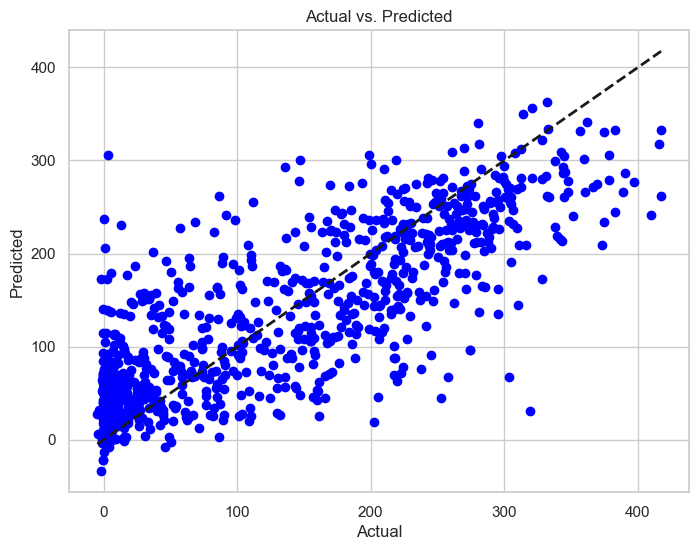

RMSE Training = 67.65163206938118


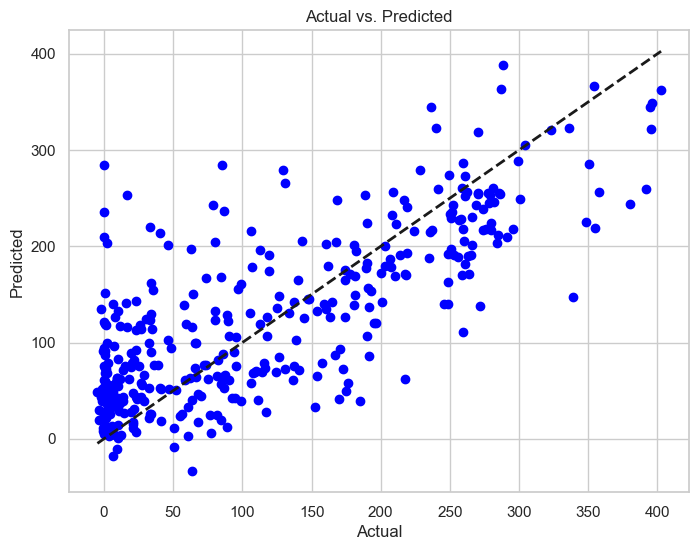

RMSE Testing = 69.62214211346523


In [516]:
#calls on the model to predict outcome in general
linear_reg(x_train, x_test, y_train, y_test)

In [517]:

train_qb = qb_df[qb_df['season']!=2022]
test_qb = qb_df[qb_df['season']==2022]

In [538]:
# Saving player_id and player_name before dropping them
train_ids_names = train_qb[['player_id', 'player_name']]
test_ids_names = test_qb[['player_id', 'player_name']]

train_X = pd.get_dummies(train_qb.drop(columns=['player_id','player_name','position','season','fantasy_points_ppr_next_season','fantasy_points_ppr']),drop_first=True).astype(float)
train_y = train_qb['fantasy_points_ppr_next_season'].astype(float)
test_X = pd.get_dummies(test_qb.drop(columns=['player_id','player_name','position','season','fantasy_points_ppr_next_season','fantasy_points_ppr']),drop_first=True).astype(float)
test_y = test_qb['fantasy_points_ppr_next_season'].astype(float)
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

In [521]:
#plot_of_results
def top_predictions(results):
  melted_results = pd.melt(results, id_vars=['player_id', 'player_name'],
                         value_vars=['actual_fantasy_points', 'predicted_fantasy_points'],
                         var_name='Fantasy Points Type', value_name='Fantasy Points')

  sns.set(style="whitegrid")
  plt.figure(figsize=(12, 6))
  sns.barplot(x='player_name', y='Fantasy Points', hue='Fantasy Points Type', data=melted_results)
  plt.xlabel('Player Name')
  plt.ylabel('Fantasy Points')
  plt.title('Actual vs. Predicted Fantasy Points for Each Player')
  plt.xticks(rotation=90)
  plt.legend()
  plt.tight_layout()
  plt.show()

In [539]:
train_X.drop(columns = [ 'fantasy_points_per_game','injury type_knee', 'injury type_no injury', 'injury type_shoulder', 'injury severity_moderate', 'injury severity_no injury', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_72-74', 'games_played'], inplace = True)
test_X.drop(columns = [ 'fantasy_points_per_game','injury type_knee', 'injury type_no injury', 'injury type_shoulder', 'injury severity_moderate', 'injury severity_no injury', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_72-74', 'games_played'], inplace = True)

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.653
Model:                                        OLS   Adj. R-squared:                  0.627
Method:                             Least Squares   F-statistic:                     25.42
Date:                            Mon, 20 May 2024   Prob (F-statistic):          7.15e-198
Time:                                    15:00:27   Log-Likelihood:                -6584.4
No. Observations:                            1177   AIC:                         1.333e+04
Df Residuals:                                1095   BIC:                         1.375e+04
Df Model:                                      81                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

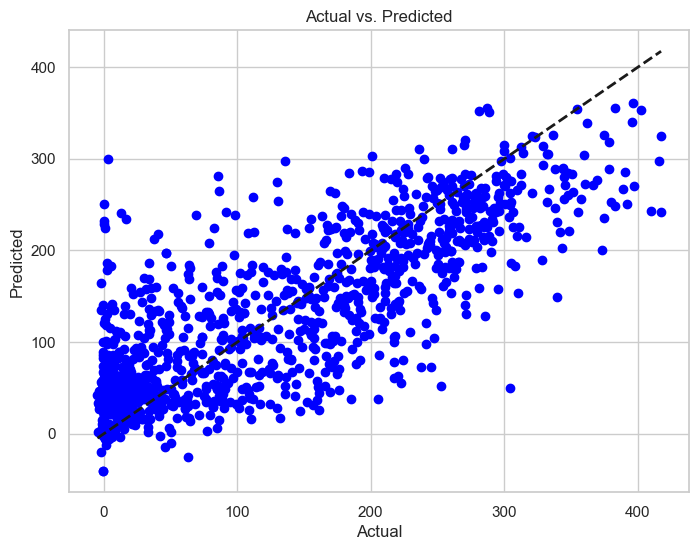

RMSE Training = 65.06024887378356


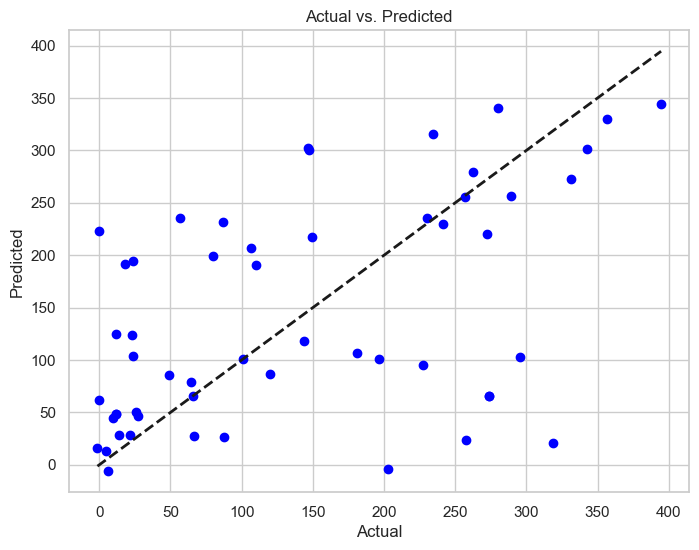

RMSE Testing = 110.3633957252328


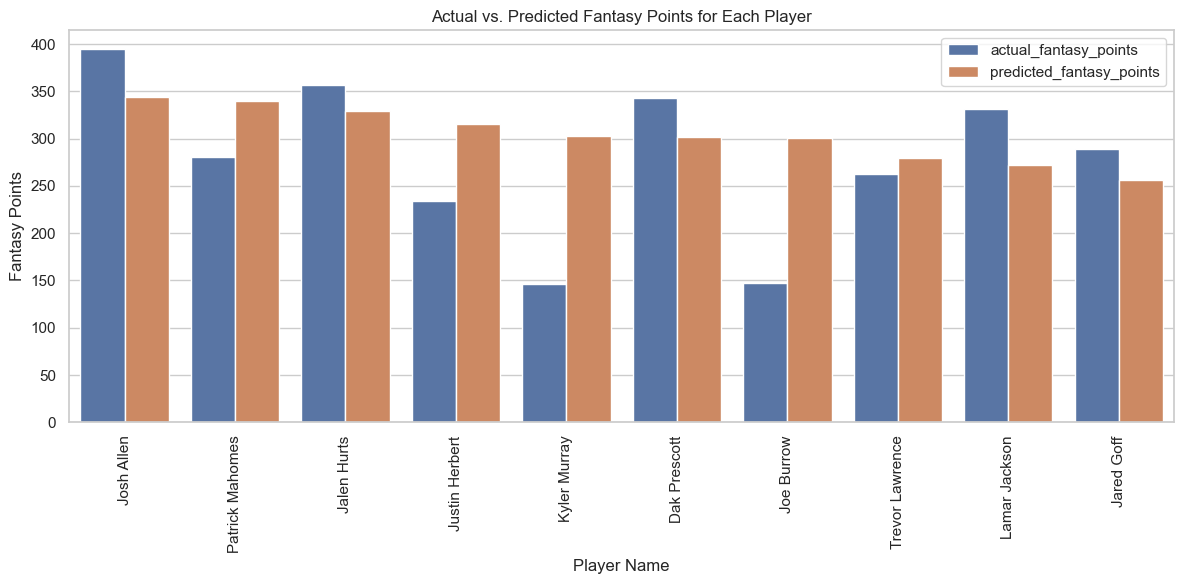

In [540]:
#predicts outcome for the 2023 season
linear_reg(train_X, test_X, train_y, test_y, test_ids_names)

### Random Forest

In [528]:
#random forrest regression model
def randomforest(train_X, test_X, train_y, test_y, test_ids_names):
    # Create RandomForestRegressor object with configuration
    regressor = RandomForestRegressor(max_depth=10, criterion="squared_error", oob_score=True, bootstrap=True)
    regressor.fit(train_X, train_y)

    # Access the OOB Score
    oob_score = regressor.oob_score_
    print(f'Out-of-Bag Score: {oob_score}')

    # Making predictions on the test data
    predictions = regressor.predict(test_X)

    # Evaluating the model
    mse = sklearn.metrics.mean_squared_error(test_y, predictions)
    print(f'Root Mean Squared Error: {math.sqrt(mse)}')

    r2 = r2_score(test_y, predictions)
    print(f'R-squared: {r2}')

    # Prepare DataFrame to show predictions with player information
    results = pd.DataFrame({
        'player_id': test_ids_names['player_id'],
        'player_name': test_ids_names['player_name'],
        'actual_fantasy_points': test_y,
        'predicted_fantasy_points': predictions
    })

    results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
    results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
    results = results.sort_values('predicted_fantasy_points',ascending=False)
    top = results.head(10)

    top_predictions(top)
    prediction_scatterplot(test_y, predictions)
    return results


Out-of-Bag Score: 0.5803629606929378
Root Mean Squared Error: 111.28843735073511
R-squared: 0.10321274876387154


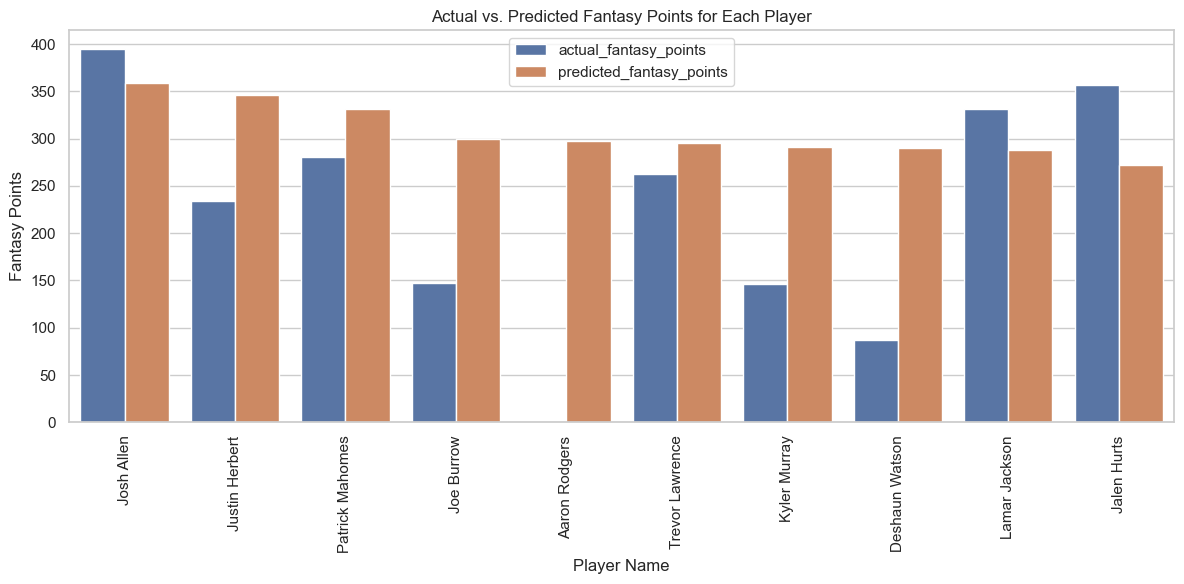

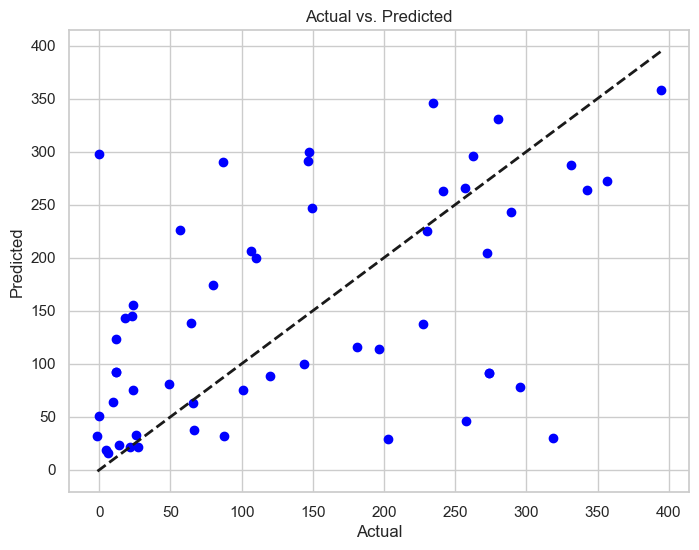

In [541]:
results = randomforest(train_X, test_X, train_y, test_y, test_ids_names)


In [542]:
results.sort_values('predicted_fantasy_points',ascending=False)

player_id        player_name  actual_fantasy_points  \
1219  00-0034857         Josh Allen                 394.64   
1251  00-0036355     Justin Herbert                 234.16   
1184  00-0033873    Patrick Mahomes                 280.22   
1257  00-0036442         Joe Burrow                 147.16   
640   00-0023459      Aaron Rodgers                   0.00   
1263  00-0036971    Trevor Lawrence                 262.54   
1228  00-0035228       Kyler Murray                 146.36   
1172  00-0033537     Deshaun Watson                  86.80   
1208  00-0034796      Lamar Jackson                 331.22   
1254  00-0036389        Jalen Hurts                 356.82   
983   00-0029263     Russell Wilson                 256.90   
1141  00-0033077       Dak Prescott                 342.84   
1078  00-0031280         Derek Carr                 241.12   
1004  00-0029604       Kirk Cousins                 149.74   
1150  00-0033106         Jared Goff                 289.10   
1240  00-0035710       Daniel Jones                  56.96   
1261  00-0036945      Justin Fields                 230.18   
1265  00-0036972          Mac Jones                 106.40   
1246  00-0036212     Tua Tagovailoa                 272.36   
1270  00-0038102      Kenny Pickett                 110.20   
1038  00-0029701     Ryan Tannehill                  80.04   
943   00-0027973        Andy Dalton                  23.64   
1157  00-0033119    Jacoby Brissett                  22.86   
1259  00-0036898        Davis Mills                  17.82   
1087  00-0031345    Jimmy Garoppolo                  64.10   
1061  00-0030565         Geno Smith                 227.26   
1101  00-0031503     Jameis Winston                  11.96   
1271  00-0038122     Desmond Ridder                 181.14   
1233  00-0035289    Gardner Minshew                 196.20   
1167  00-0033357        Taysom Hill                 143.52   
1123  00-0032268     Marcus Mariota                  11.76   
1122  00-0032268     Marcus Mariota                  11.76   
1213  00-0034855     Baker Mayfield                 274.06   
1214  00-0034855     Baker Mayfield                 274.06   
1267  00-0037013        Zach Wilson                 119.94   
1178  00-0033869  Mitchell Trubisky                  48.68   
1269  00-0037834        Brock Purdy                 295.60   
827   00-0026158         Joe Flacco                 100.84   
1224  00-0034869        Sam Darnold                  23.38   
972   00-0028986        Case Keenum                   9.74   
1108  00-0031800    Taylor Heinicke                  66.00   
1069  00-0031237  Teddy Bridgewater                  -0.20   
1268  00-0037077         Sam Howell                 257.54   
1162  00-0033319       Nick Mullens                  66.74   
1243  00-0035993      Tyler Huntley                  25.62   
1200  00-0034577         Kyle Allen                  -1.30   
960   00-0028118       Tyrod Taylor                  87.34   
1248  00-0036264        Jordan Love                 319.06   
1193  00-0033949       Joshua Dobbs                 202.66   
1127  00-0032436       Jeff Driskel                  13.94   
1114  00-0032156     Trevor Siemian                  26.96   
1190  00-0033936      C.J. Beathard                  21.46   
869   00-0026625        Brian Hoyer                   4.94   
928   00-0027948     Blaine Gabbert                   5.90   

      predicted_fantasy_points  actual_points_rank  predicted_points_rank  
1219                358.452010                 1.0                    1.0  
1251                345.600563                16.0                    2.0  
1184                331.145210                 8.0                    3.0  
1257                300.057671                23.0                    4.0  
640                 297.598440                52.0                    5.0  
1263                295.680434                12.0                    6.0  
1228                291.501621                24.0              

### XGBoost

In [488]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [531]:
def xgboost(train_X, test_X, train_y, test_y, test_ids_names ):
  xg_reg = xgb.XGBRegressor(objective = "reg:squarederror",n_estimators = 10,random_state=0)
  xg_reg.fit(train_X,train_y)
  feature_importance = [(train_X.columns[i], item) for i, item in enumerate(xg_reg.feature_importances_)]

  sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
  for feature, importance in sorted_feature_importance:
    print("{0:s}: {1:.6f}".format(feature, importance))
  features = [feature[0] for feature in sorted_feature_importance]
  importance_scores = [feature[1] for feature in sorted_feature_importance]
  plt.figure(figsize=(10, 6))
  plt.barh(features[:20], importance_scores[:20], color='skyblue')
  plt.xlabel('Feature Importance Score')
  plt.ylabel('Features')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
  plt.show()



  xgb_params = {
    'colsample_bytree': [0.8, 0.7,0.6],
    'n_estimators': [60,70,80],
    'max_depth': [4,5,7]
}

  xgb_grid = GridSearchCV(
      estimator = xg_reg, param_grid =  xgb_params, scoring="neg_mean_squared_error",cv=4,verbose=1
  )
  xgb_grid.fit(train_X, train_y)

  # Get best estimator from grid search
  best_xgb_reg = xgb_grid.best_estimator_

  # Make predictions on test data
  Y_pred = best_xgb_reg.predict(test_X)
  mse = sklearn.metrics.mean_squared_error(test_y, Y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(test_y, Y_pred)


  print("Root Mean Squared Error:", rmse)
  print("R-squared:", r2)


  prediction_scatterplot(test_y, Y_pred)

  results = pd.DataFrame({
    'player_id': test_ids_names['player_id'],
    'player_name': test_ids_names['player_name'],
    'actual_fantasy_points': test_y,
    'predicted_fantasy_points': Y_pred
})

  results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
  results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
  results = results.sort_values('predicted_fantasy_points',ascending=False)
  top = results.head(10)

  top_predictions(top)
  #results.sort_values('predicted_fantasy_points',ascending=False)

  return xgb_grid




avg_fantasy_points: 0.285496
starter_or_backup: 0.180229
injury severity_severe: 0.033791
changed_teams_midseason: 0.027078
year_in_league: 0.026244
rushing_tds: 0.024181
passing_epa: 0.022453
ties: 0.019526
injury type_acl: 0.019197
passing_yards_after_catch: 0.018754
rushing_fumbles_lost: 0.018356
binned_draft_pick_Third Round: 0.018309
binned_draft_pick_Undrafted: 0.017707
pacr: 0.016906
injury type_ankle: 0.016526
passing_2pt_conversions: 0.015964
binned_height_75-77: 0.015737
rushing_yards: 0.015483
rushing_epa: 0.015410
wins: 0.015189
years_coached: 0.014469
binned_draft_pick_Late First Round: 0.014031
rushing_2pt_conversions: 0.013285
new_team: 0.012515
binned_weight_220-239: 0.011907
interceptions: 0.011738
sacks: 0.011089
sack_fumbles: 0.010690
binned_weight_240-259: 0.010283
injured: 0.010173
rushing_fumbles: 0.010108
binned_draft_pick_Sixth Round: 0.009795
binned_weight_260-279: 0.008692
injury type_hand: 0.007134
rushing_1000_yards: 0.007012
binned_draft_pick_Seventh Round:

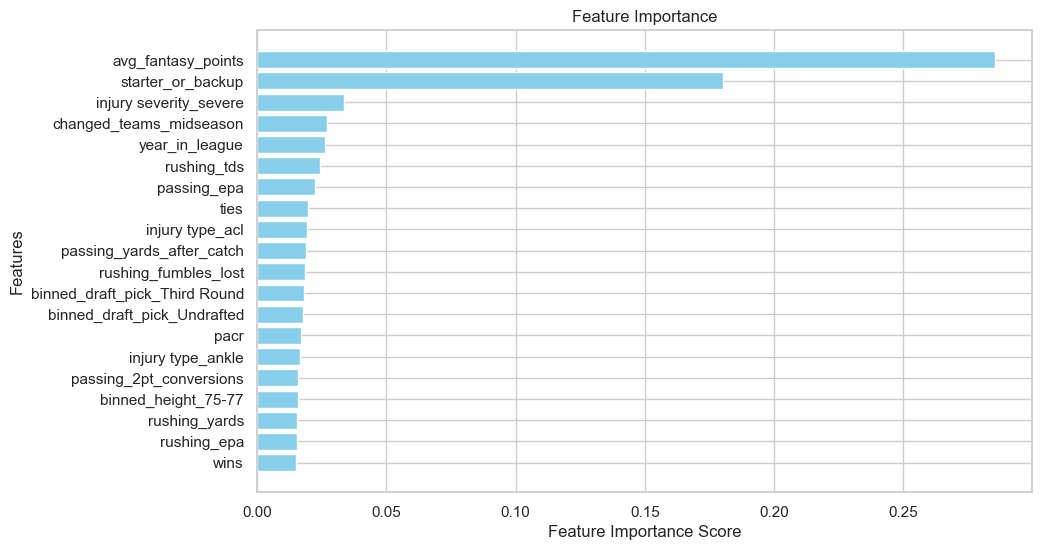

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Root Mean Squared Error: 103.5109900231865
R-squared: 0.22417769446147895


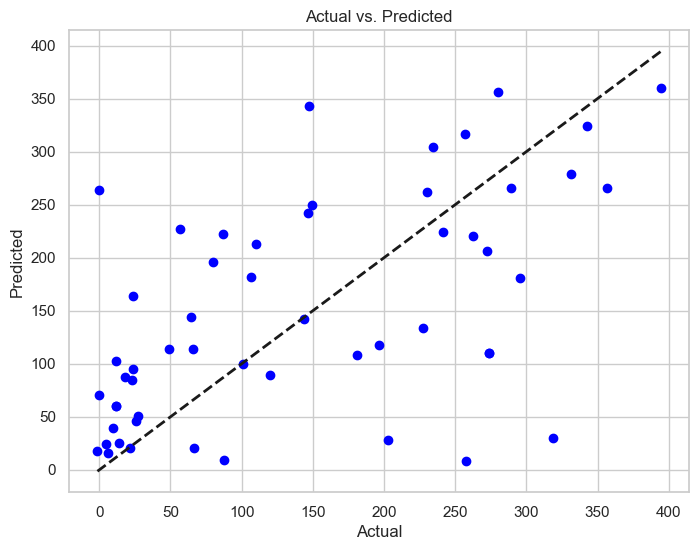

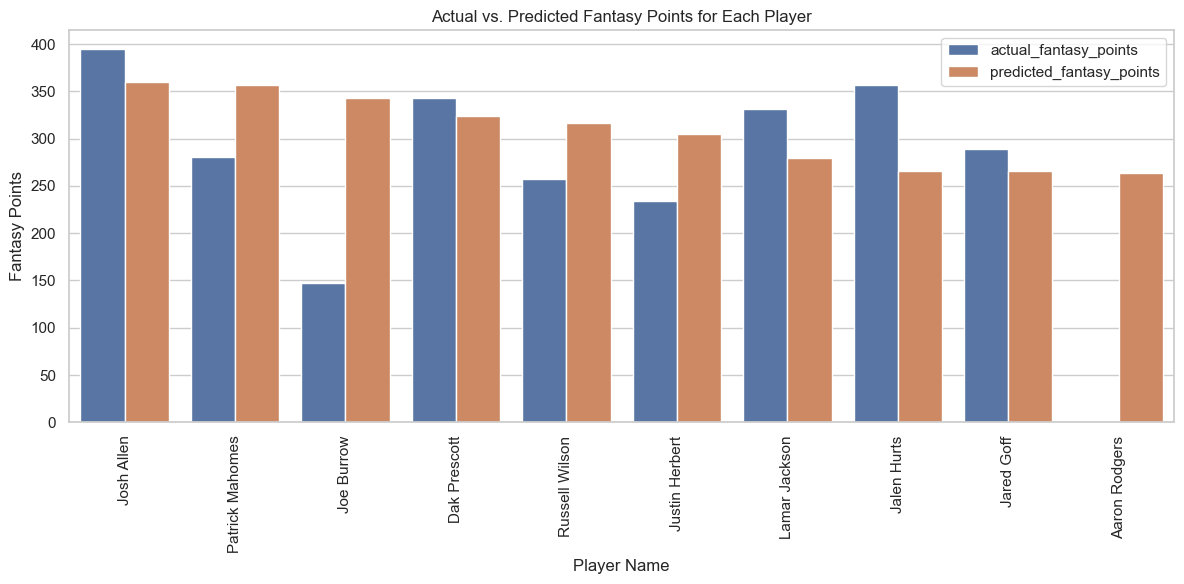

In [543]:
xg_results = xgboost(train_X, test_X, train_y, test_y, test_ids_names )


### Gradient Boosting

In [491]:
def gradientboosting(train_X, test_X, train_y, test_y, test_ids_names):
  gb = GradientBoostingRegressor(max_depth=4, n_estimators=200,random_state=2)
  gb.fit(train_X,train_y)
  feature_importance = [(train_X.columns[i], item) for i, item in enumerate(gb.feature_importances_)]

  sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
  for feature, importance in sorted_feature_importance:
    print("{0:s}: {1:.6f}".format(feature, importance))
  features = [feature[0] for feature in sorted_feature_importance]
  importance_scores = [feature[1] for feature in sorted_feature_importance]
  plt.figure(figsize=(10, 6))
  plt.barh(features[:20], importance_scores[:20], color='skyblue')
  plt.xlabel('Feature Importance Score')
  plt.ylabel('Features')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
  plt.show()
  gb_params = {
      'max_depth':[4,5],
      'n_estimators':[250,275],
      'subsample':[0.75,0.8],
              'max_features':[0.2]
  }

  gb_grid = GridSearchCV(
      estimator = gb, param_grid =  gb_params, scoring="neg_mean_squared_error",cv=5,verbose=1
      )

  gb_grid.fit(train_X, train_y)

  # Get best estimator from grid search
  best_gb_reg = gb_grid.best_estimator_

  # Make predictions on test data
  Y_pred = best_gb_reg.predict(test_X)
  mse = sklearn.metrics.mean_squared_error(test_y, Y_pred)


  # Evaluate performance

  rmse = np.sqrt(mse)
  r2 = r2_score(test_y, Y_pred)


  print("Root Mean Squared Error:", rmse)
  print("R-squared:", r2)

  prediction_scatterplot(test_y, Y_pred)

  results = pd.DataFrame({
  'player_id': test_ids_names['player_id'],
  'player_name': test_ids_names['player_name'],
  'actual_fantasy_points': test_y,
  'predicted_fantasy_points': Y_pred
})

  results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
  results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
  results = results.sort_values('predicted_fantasy_points',ascending=False)
  top = results.head(10)

  top_predictions(top)
  #results.sort_values('predicted_fantasy_points',ascending=False)

  return gb_grid

avg_fantasy_points: 0.596781
starter_or_backup: 0.101877
passing_epa: 0.047972
year_in_league: 0.034502
rushing_epa: 0.032395
passing_yards_after_catch: 0.023294
pacr: 0.021372
rushing_yards: 0.018555
wins: 0.017586
sacks: 0.016405
years_coached: 0.010868
interceptions: 0.010727
sack_fumbles: 0.007044
rushing_tds: 0.006259
new_team: 0.005102
passing_2pt_conversions: 0.004858
rushing_fumbles_lost: 0.003145
season ending_yes: 0.002837
rushing_1000_yards: 0.002805
rushing_fumbles: 0.002535
injured: 0.002384
rushing_2pt_conversions: 0.002235
injury type_acl: 0.002093
Receiving_1000_yards: 0.002065
binned_weight_240-259: 0.001872
binned_draft_pick_Sixth Round: 0.001615
injury type_leg: 0.001464
binned_weight_220-239: 0.001403
(1=firstyearwithteam,0=2+seasons): 0.001258
binned_weight_260-279: 0.001189
injury type_hand: 0.001137
changed_teams_midseason: 0.001075
binned_draft_pick_Late Second Round: 0.001035
binned_draft_pick_Third Round: 0.001026
binned_height_75-77: 0.000964
binned_draft_pic

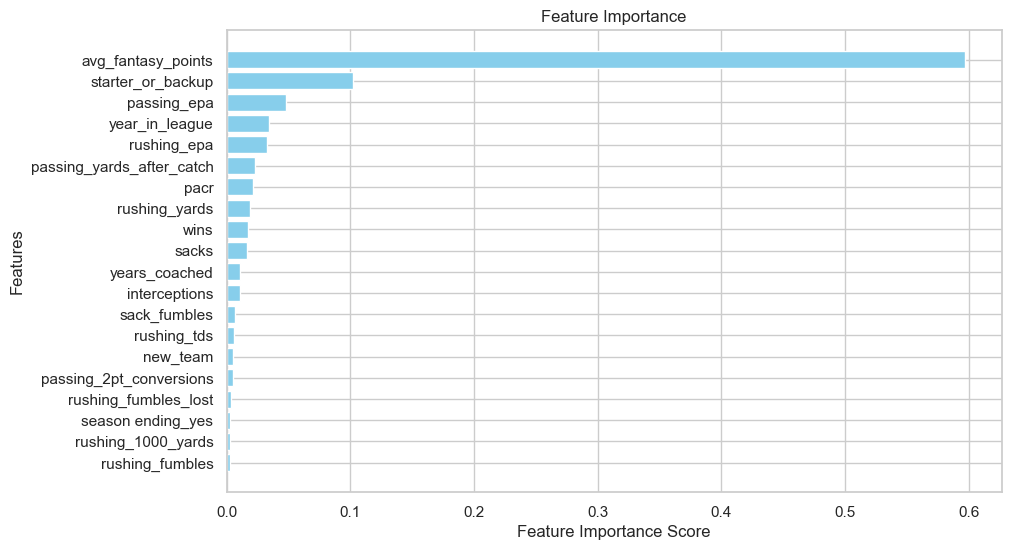

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 106.27975166094325
R-squared: 0.18211847348781351


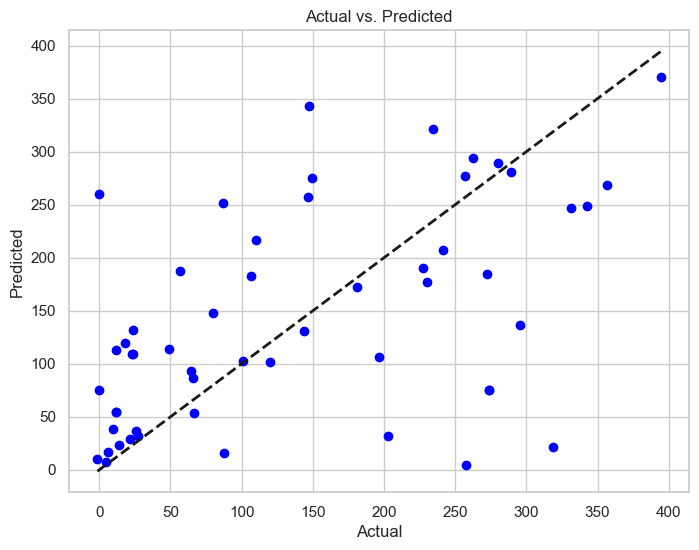

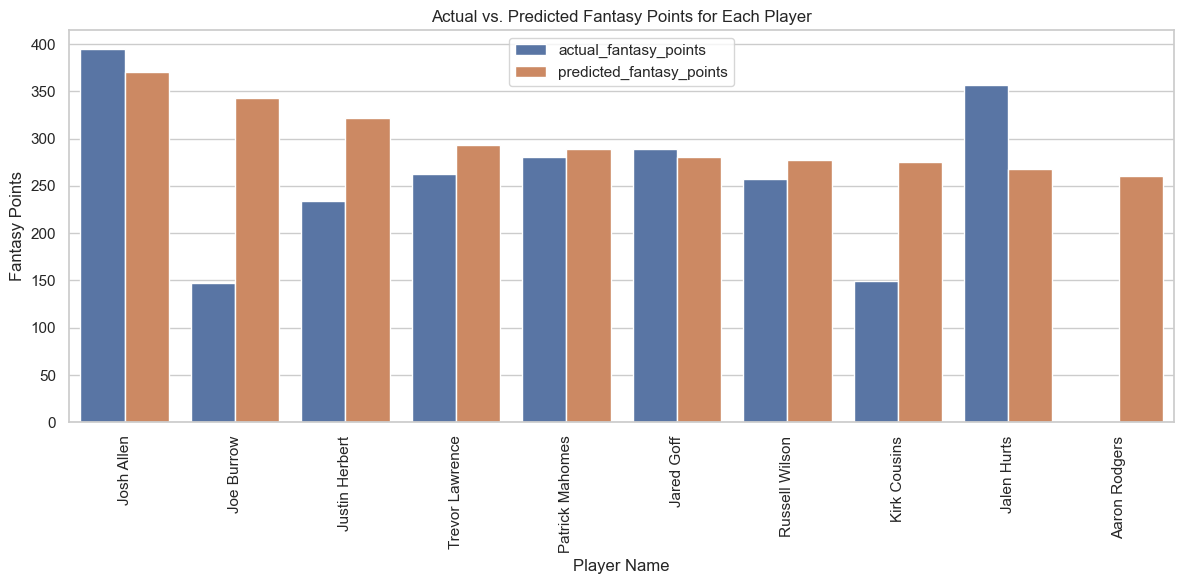

In [544]:
gb_results = gradientboosting(train_X, test_X, train_y, test_y, test_ids_names)

### Voting Regression

In [534]:
from sklearn.ensemble import VotingRegressor

In [535]:
def votingregressor(xgb_results, gb_results):
# After multiple trials xgb and gradient boosting were most successful models which is why they are the models used in the voting regressor

  regressors = [ ('XGBRegressor',xgb_results),('GradientBoostingRegressor',gb_results)]

  # Combing variables in a voting regression was the most effective method for minimizing RMSE

  vr = VotingRegressor(estimators=regressors)
  vr.fit(train_X, train_y)
  Y_pred = vr.predict(test_X)
  mse = sklearn.metrics.mean_squared_error(test_y, Y_pred)


  # Evaluate performance

  rmse = np.sqrt(mse)
  r2 = r2_score(test_y, Y_pred)


  print("Root Mean Squared Error:", rmse)
  print("R-squared:", r2)

  prediction_scatterplot(test_y, Y_pred)

  results = pd.DataFrame({
  'player_id': test_ids_names['player_id'],
  'player_name': test_ids_names['player_name'],
  'actual_fantasy_points': test_y,
  'predicted_fantasy_points': Y_pred
  })

  results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
  results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
  results = results.sort_values('predicted_fantasy_points',ascending=False)
  top = results.head(10)

  top_predictions(top)
  #results.sort_values('predicted_fantasy_points',ascending=False)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 103.72410920611277
R-squared: 0.2209797185152519


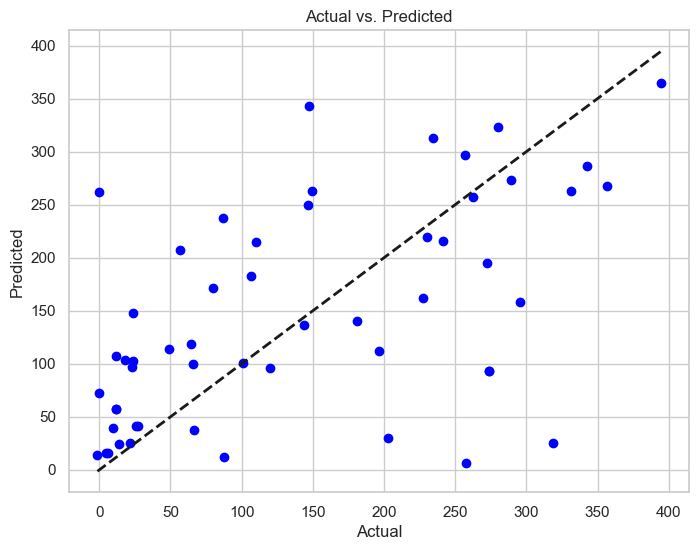

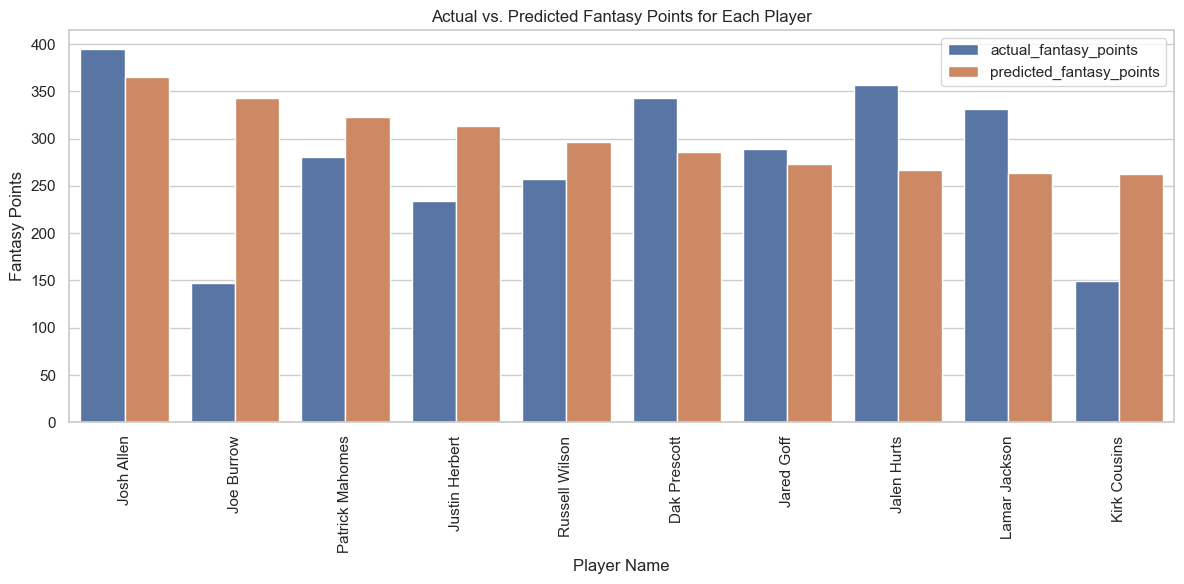

In [545]:
votingregressor(xg_results, gb_results )

## Wide Receiver and Tight End Analysis

### Regression

In [496]:
#this drops all the rookie data
wr_df.dropna(axis = 0, inplace=True)

In [567]:
#converts all the categorical and binned data
x = pd.get_dummies(wr_df.drop(columns=['player_id', 'player_name','season',
                                     'fantasy_points_ppr_next_season','fantasy_points_per_game']),drop_first=True).astype(float)
y = wr_df['fantasy_points_ppr_next_season'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)

In [564]:
multicollinearity(x)

C:\Users\alexs\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


feature    games_played
VIF            2.789603
Name: 0, dtype: object
feature     injured
VIF        1.687833
Name: 1, dtype: object
feature    new_team
VIF        1.179573
Name: 2, dtype: object
feature    QB_4000_yards
VIF             1.101594
Name: 3, dtype: object
feature    rushing_1000_yards
VIF                  1.047541
Name: 4, dtype: object
feature        racr
VIF        1.491339
Name: 5, dtype: object
feature    air_yards_share
VIF               2.622714
Name: 6, dtype: object
feature    rushing_yards
VIF             2.840491
Name: 7, dtype: object
feature    rushing_tds
VIF           1.768592
Name: 8, dtype: object
feature    rushing_fumbles
VIF               1.605357
Name: 9, dtype: object
feature    rushing_epa
VIF           1.855654
Name: 10, dtype: object
feature    rushing_2pt_conversions
VIF                        1.15222
Name: 11, dtype: object
feature    receiving_fumbles
VIF                 1.218172
Name: 12, dtype: object
feature    receiving_yards_after_catch
VIF

feature       VIF
0                       games_played  2.789603
1                            injured  1.687833
2                           new_team  1.179573
3                      QB_4000_yards  1.101594
4                 rushing_1000_yards  1.047541
..                               ...       ...
115   binned_draft_pick_Fourth Round  4.410879
116    binned_draft_pick_Fifth Round  4.209515
117    binned_draft_pick_Sixth Round  2.974908
118  binned_draft_pick_Seventh Round  2.415672
119      binned_draft_pick_Undrafted  6.629161

[120 rows x 2 columns]

In [568]:
x.drop(columns = ['fantasy_points_ppr','injury type_achilles', 'injury type_ankle', 'injury type_foot', 'injury type_hamstring', 'injury type_knee', 'injury type_knee', 'injury type_no injury', 'injury type_quad, foot', 'injury type_shoulder, hamstiring', 'injury type_suspension', 'injury severity_mild, severe', 'season ending_no injury', 'injury severity_no injury', 'games_played', 'position_WR', 'binned_weight_240-259'], inplace = True)

In [569]:
multicollinearity(x)

feature     injured
VIF        2.180722
Name: 0, dtype: object
feature    new_team
VIF        1.380399
Name: 1, dtype: object
feature    QB_4000_yards
VIF              1.42997
Name: 2, dtype: object
feature    rushing_1000_yards
VIF                  1.752361
Name: 3, dtype: object
feature        racr
VIF        2.535609
Name: 4, dtype: object
feature    air_yards_share
VIF               5.691732
Name: 5, dtype: object
feature    rushing_yards
VIF             3.032381
Name: 6, dtype: object
feature    rushing_tds
VIF           1.801441
Name: 7, dtype: object
feature    rushing_fumbles
VIF               1.633021
Name: 8, dtype: object
feature    rushing_epa
VIF           1.862536
Name: 9, dtype: object
feature    rushing_2pt_conversions
VIF                        1.14692
Name: 10, dtype: object
feature    receiving_fumbles
VIF                 1.646149
Name: 11, dtype: object
feature    receiving_yards_after_catch
VIF                           5.896062
Name: 12, dtype: object
feature    r

feature       VIF
0                            injured  2.180722
1                           new_team  1.380399
2                      QB_4000_yards  1.429970
3                 rushing_1000_yards  1.752361
4                               racr  2.535609
..                               ...       ...
99    binned_draft_pick_Fourth Round  3.037641
100    binned_draft_pick_Fifth Round  2.817759
101    binned_draft_pick_Sixth Round  2.117966
102  binned_draft_pick_Seventh Round  1.851053
103      binned_draft_pick_Undrafted  4.472766

[104 rows x 2 columns]

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.579
Model:                                        OLS   Adj. R-squared:                  0.561
Method:                             Least Squares   F-statistic:                     32.97
Date:                            Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                                    15:27:33   Log-Likelihood:                -14527.
No. Observations:                            2699   AIC:                         2.927e+04
Df Residuals:                                2590   BIC:                         2.992e+04
Df Model:                                     108                                         
Covariance Type:                        nonrobust                                         
                                             coef    std err          t      P>|t|      [0

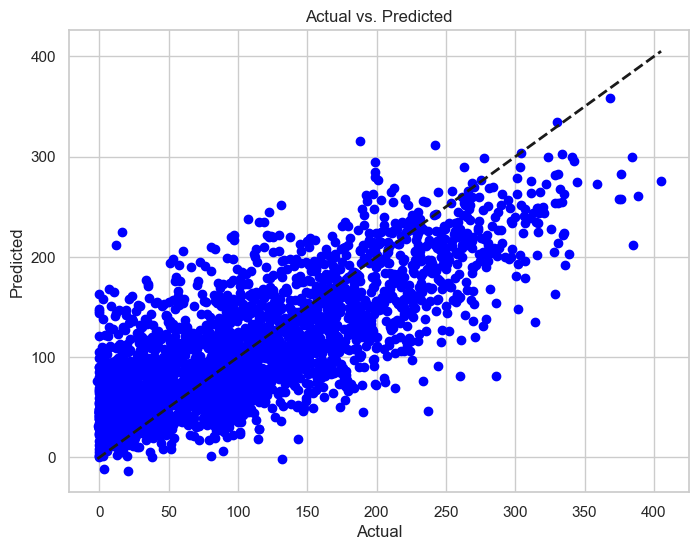

RMSE Training = 52.64546621878665


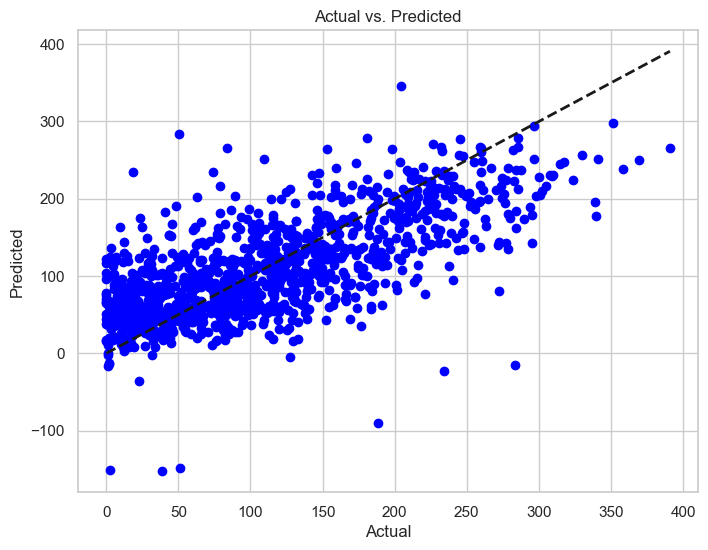

RMSE Testing = 57.305775767842


In [570]:
linear_reg(x_train, x_test, y_train, y_test)

In [571]:
train_wr = wr_df[wr_df['season']!=2022]
test_wr = wr_df[wr_df['season']==2022]

In [584]:
# Saving player_id and player_name before dropping them
train_ids_names = train_wr[['player_id', 'player_name']]
test_ids_names = test_wr[['player_id', 'player_name']]

train_X = pd.get_dummies(train_wr.drop(columns=['player_id','player_name','season','fantasy_points_ppr_next_season', 'fantasy_points_per_game']),drop_first=True).astype(float)
train_y = train_wr['fantasy_points_ppr_next_season'].astype(float)
test_X = pd.get_dummies(test_wr.drop(columns=['player_id','player_name','season','fantasy_points_ppr_next_season', 'fantasy_points_per_game']),drop_first=True).astype(float)
test_y = test_wr['fantasy_points_ppr_next_season'].astype(float)
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

In [585]:
train_X.drop(columns = ['fantasy_points_ppr','injury type_achilles', 'injury type_ankle', 'injury type_foot', 'injury type_hamstring', 'injury type_knee', 'injury type_knee', 'injury type_no injury', 'injury type_quad, foot', 'injury type_shoulder, hamstiring', 'injury type_suspension', 'injury severity_mild, severe', 'season ending_no injury', 'injury severity_no injury', 'games_played', 'position_WR', 'binned_weight_240-259'], inplace = True)
test_X.drop(columns = ['fantasy_points_ppr','injury type_achilles', 'injury type_ankle', 'injury type_foot', 'injury type_hamstring', 'injury type_knee', 'injury type_knee', 'injury type_no injury', 'injury type_quad, foot', 'injury type_shoulder, hamstiring', 'injury type_suspension', 'injury severity_mild, severe', 'season ending_no injury', 'injury severity_no injury', 'games_played', 'position_WR', 'binned_weight_240-259'], inplace = True)

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.562
Model:                                        OLS   Adj. R-squared:                  0.550
Method:                             Least Squares   F-statistic:                     45.68
Date:                            Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                                    16:19:11   Log-Likelihood:                -19924.
No. Observations:                            3694   AIC:                         4.005e+04
Df Residuals:                                3592   BIC:                         4.069e+04
Df Model:                                     101                                         
Covariance Type:                        nonrobust                                         
                                             coef    std err          t      P>|t|      [0

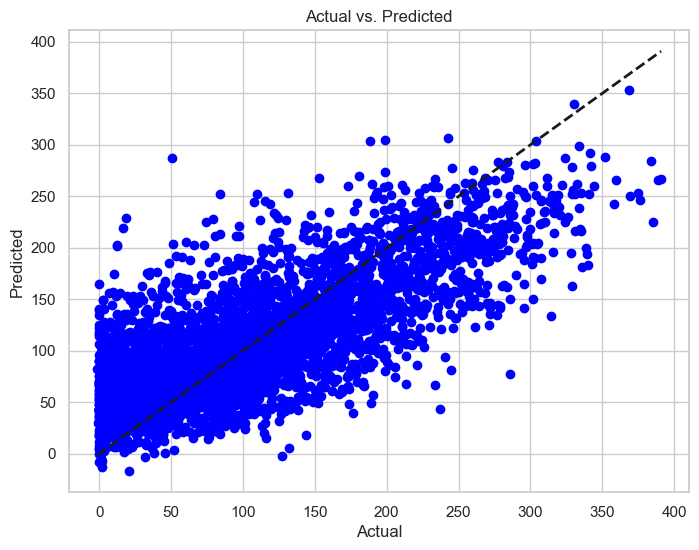

RMSE Training = 53.23132920681243


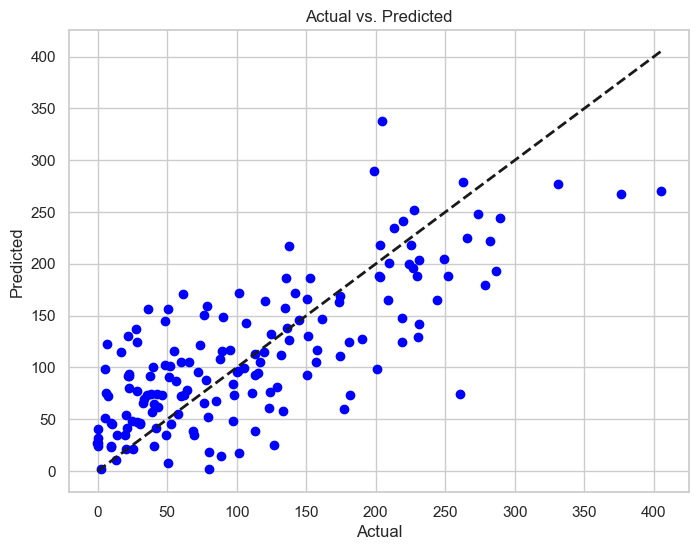

RMSE Testing = 56.589116297003045


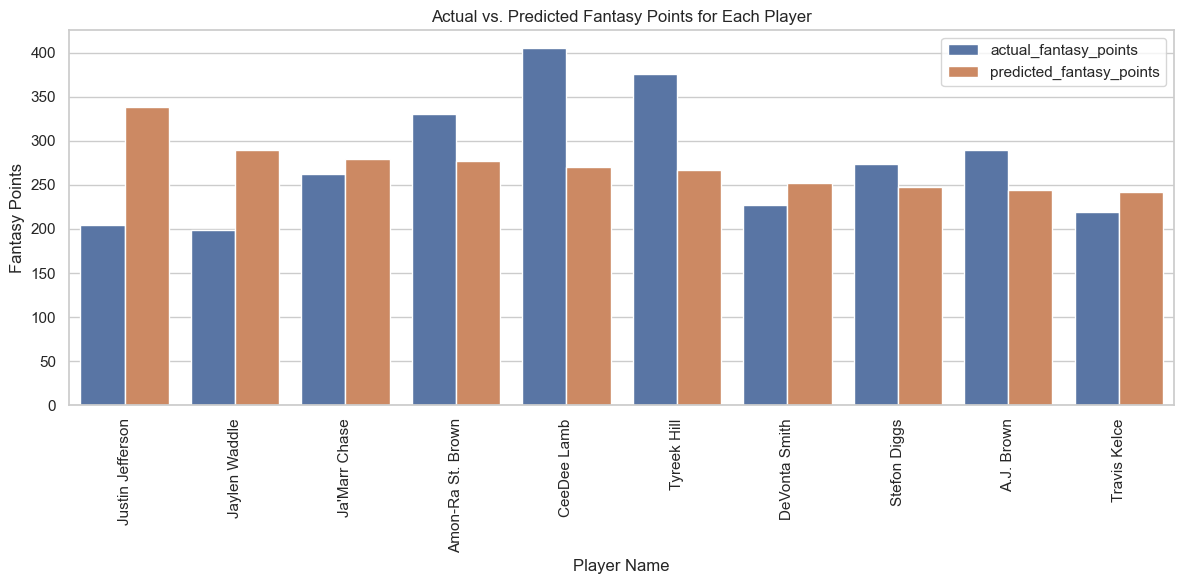

In [586]:
#predicts outcome for the 2023 season
linear_reg(train_X, test_X, train_y, test_y, test_ids_names)

### Random Forest

Out-of-Bag Score: 0.5237755756100491
Root Mean Squared Error: 58.92138726420808
R-squared: 0.5401282498439568


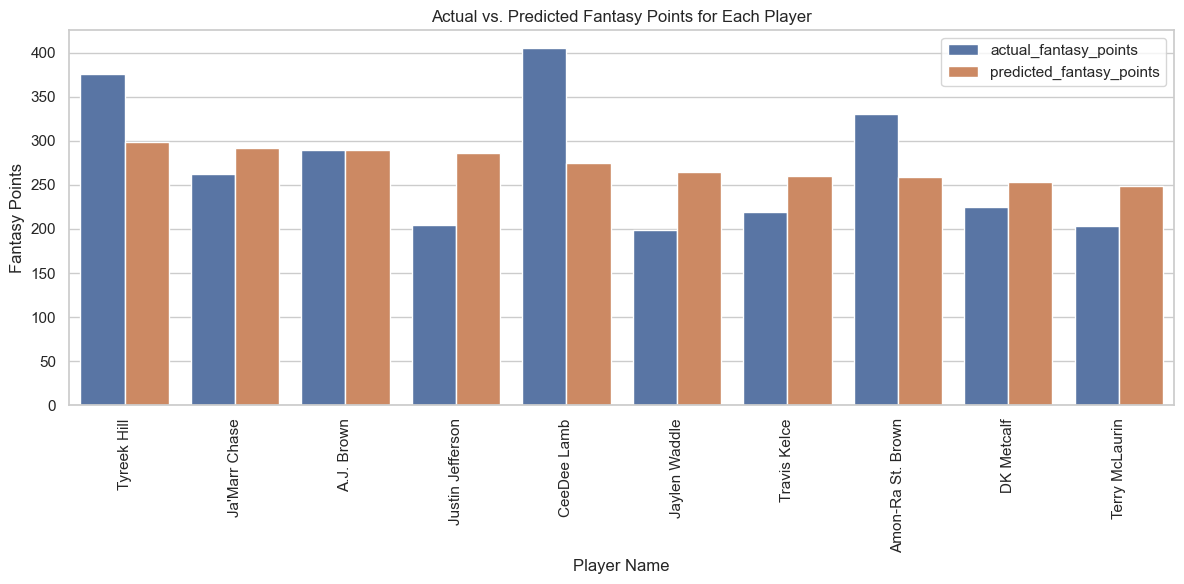

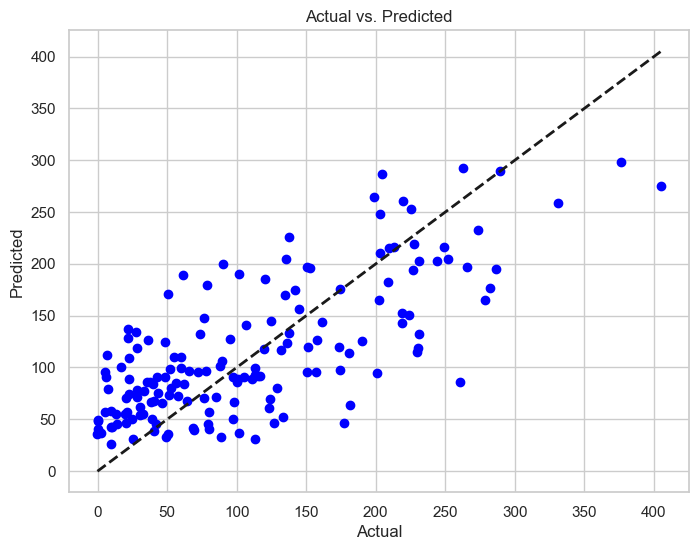

       player_id       player_name  actual_fantasy_points  \
8119  00-0033040       Tyreek Hill                 376.40   
3553  00-0036900     Ja'Marr Chase                 262.72   
3     00-0035676        A.J. Brown                 289.60   
4699  00-0036322  Justin Jefferson                 204.20   
1312  00-0036358       CeeDee Lamb                 405.20   

      predicted_fantasy_points  actual_points_rank  predicted_points_rank  
8119                298.699918                 2.0                    1.0  
3553                292.026282                10.0                    2.0  
3                   289.164847                 4.0                    3.0  
4699                286.672604                29.0                    4.0  
1312                274.892733                 1.0                    5.0  


In [587]:
results = randomforest(train_X, test_X, train_y, test_y, test_ids_names)

# Display results
print(results.head())

In [588]:
results.sort_values('predicted_fantasy_points',ascending=False).head(60)

player_id          player_name  actual_fantasy_points  \
8119  00-0033040          Tyreek Hill                 376.40   
3553  00-0036900        Ja'Marr Chase                 262.72   
3     00-0035676           A.J. Brown                 289.60   
4699  00-0036322     Justin Jefferson                 204.20   
1312  00-0036358          CeeDee Lamb                 405.20   
3998  00-0036613        Jaylen Waddle                 198.60   
7902  00-0030506         Travis Kelce                 219.40   
256   00-0036963    Amon-Ra St. Brown                 330.90   
1848  00-0035640           DK Metcalf                 225.40   
7636  00-0035659       Terry McLaurin                 203.20   
7329  00-0031588         Stefon Diggs                 273.80   
7561  00-0036410          Tee Higgins                 137.60   
2347  00-0036912        DeVonta Smith                 227.60   
815   00-0036261        Brandon Aiyuk                 249.20   
3218  00-0037740       Garrett Wilson                 213.20   
1524  00-0033921         Chris Godwin                 209.20   
3246  00-0033288        George Kittle                 203.20   
5541  00-0034753         Mark Andrews                 135.40   
8446  00-0036252      Michael Pittman                 252.20   
1571  00-0037239          Chris Olave                 231.30   
2366  00-0035719         Deebo Samuel                 243.70   
5950  00-0032765       Michael Thomas                  89.80   
2146  00-0031381        Davante Adams                 265.40   
1612  00-0034775       Christian Kirk                 150.26   
2655  00-0035216      Diontae Johnson                 152.70   
1843  00-0034827           D.J. Moore                 286.50   
244   00-0031544         Amari Cooper                 227.00   
1625  00-0038124     Christian Watson                 101.30   
4610  00-0033857  JuJu Smith-Schuster                  61.00   
4722  00-0036345          K.J. Osborn                 120.00   
3248  00-0037247       George Pickens                 208.80   
2044  00-0036309       Darnell Mooney                  78.90   
5997  00-0031408           Mike Evans                 282.50   
2817  00-0037238         Drake London                 174.38   
4204  00-0036407          Jerry Jeudy                 141.80   
8463  00-0033536        Mike Williams                  50.20   
5640  00-0035662       Marquise Brown                 134.70   
8105  00-0032211        Tyler Lockett                 202.40   
4775  00-0030279         Keenan Allen                 278.86   
8062  00-0033009           Tyler Boyd                 144.80   
7431  00-0035229       T.J. Hockenson                 219.00   
2289  00-0030564      DeAndre Hopkins                 223.60   
6328  00-0036894       Pat Freiermuth                  76.80   
3636  00-0037741         Jahan Dotson                 124.80   
3199  00-0036196           Gabe Davis                 161.40   
3682  00-0034960        Jakobi Meyers                 218.58   
4577  00-0036988          Josh Palmer                 106.70   
1425  00-0036326       Chase Claypool                  21.70   
5865  00-0035140       Mecole Hardman                  27.70   
5129  00-0036970           Kyle Pitts                 137.30   
6263  00-0035644            Noah Fant                  73.40   
98    00-0030035         Adam Thielen                 231.00   
5323  00-0036268     Laviska Shenault                  21.50   
138   00-0037664          Alec Pierce                  95.40   
4634  00-0027944          Julio Jones                  36.40   
6624  00-0037545       Rashid Shaheed                 157.60   
1776  00-0034348     Courtland Sutton                 190.20   
3437  00-0034983       Hunter Renfrow                  48.50   
1873  00-0034351       Dallas Goedert                 136.30   
2032  00-0035535       Darius Slayton                 151.00   

      predicted_fantasy_points  actual_points_rank  predicted_points_rank  
8119                298.69

### XGBoost

avg_fantasy_points: 0.311284
year_in_league: 0.042973
binned_draft_pick_Third Round: 0.028771
receiving_epa: 0.023538
changed_teams_midseason: 0.023374
injury severity_severe: 0.022371
binned_draft_pick_Early 1st Round: 0.022030
binned_draft_pick_Late First Round: 0.021388
receiving_yards_after_catch: 0.020852
season ending_yes: 0.019726
binned_draft_pick_Seventh Round: 0.018937
binned_draft_pick_Late Second Round: 0.017324
injury severity_moderate: 0.017221
injury type_groin: 0.016858
new_team: 0.016544
rushing_epa: 0.015559
binned_height_69-71: 0.015415
receiving_2pt_conversions: 0.015138
binned_draft_pick_Undrafted: 0.015038
binned_weight_180-199: 0.014839
air_yards_share: 0.014403
binned_draft_pick_Fifth Round: 0.014072
wins: 0.013574
receiving_fumbles: 0.013391
rushing_tds: 0.013317
binned_height_75-77: 0.013028
racr: 0.012745
binned_draft_pick_Early Second Round: 0.012651
years_coached: 0.012254
injury type_illness: 0.012057
(1=firstyearwithteam,0=2+seasons): 0.011935
injury type

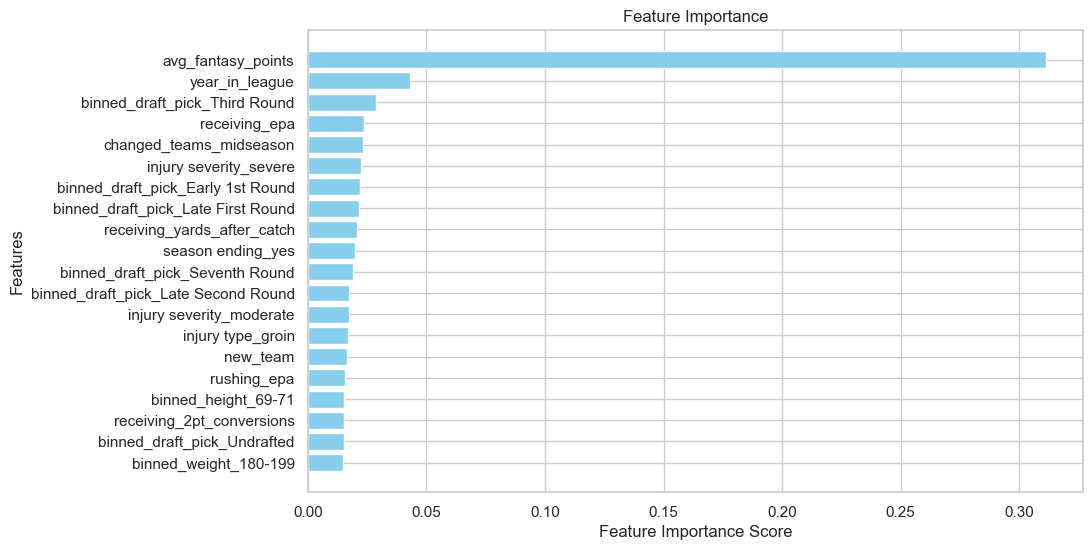

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Root Mean Squared Error: 59.970813459851584
R-squared: 0.5236011720380165


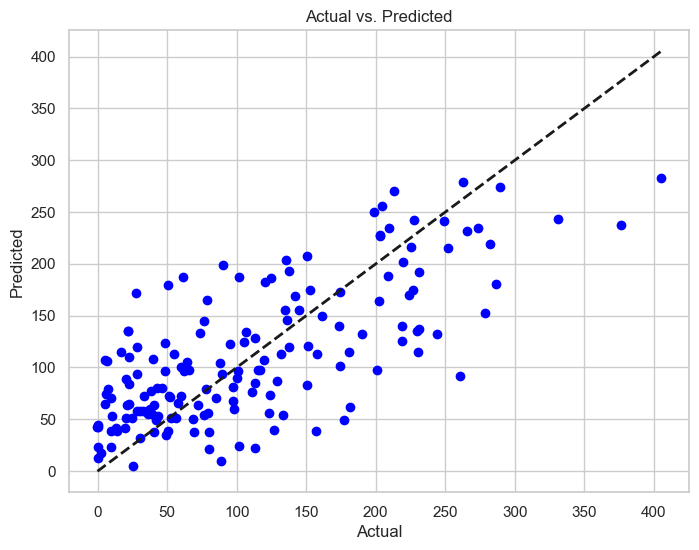

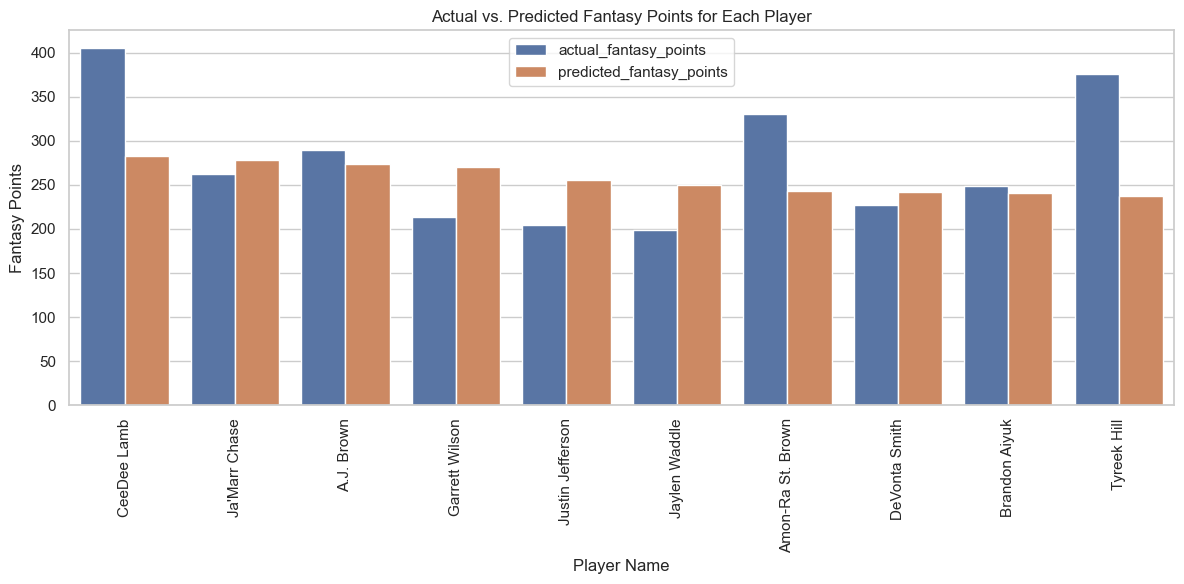

In [589]:
xg_results = xgboost(train_X, test_X, train_y, test_y, test_ids_names )

### Gradient Boosting

avg_fantasy_points: 0.719710
year_in_league: 0.068510
receiving_epa: 0.051656
receiving_yards_after_catch: 0.028293
air_yards_share: 0.020239
rushing_epa: 0.016442
rushing_yards: 0.012995
wins: 0.010452
racr: 0.010216
years_coached: 0.010007
new_team: 0.006338
receiving_fumbles: 0.002360
binned_draft_pick_Sixth Round: 0.001959
binned_height_75-77: 0.001787
binned_draft_pick_Seventh Round: 0.001703
binned_draft_pick_Third Round: 0.001683
injury severity_moderate: 0.001657
changed_teams_midseason: 0.001581
binned_weight_180-199: 0.001562
QB_4000_yards: 0.001458
injury type_stress fracture foot: 0.001314
ties: 0.001279
injury severity_severe: 0.001230
(1=firstyearwithteam,0=2+seasons): 0.001176
binned_draft_pick_Early Second Round: 0.001172
injury type_illness: 0.001104
binned_draft_pick_Fourth Round: 0.001081
injury type_groin: 0.001010
receiving_2pt_conversions: 0.000972
rushing_fumbles: 0.000972
binned_weight_200-219: 0.000937
binned_weight_220-239: 0.000894
binned_draft_pick_Undrafted

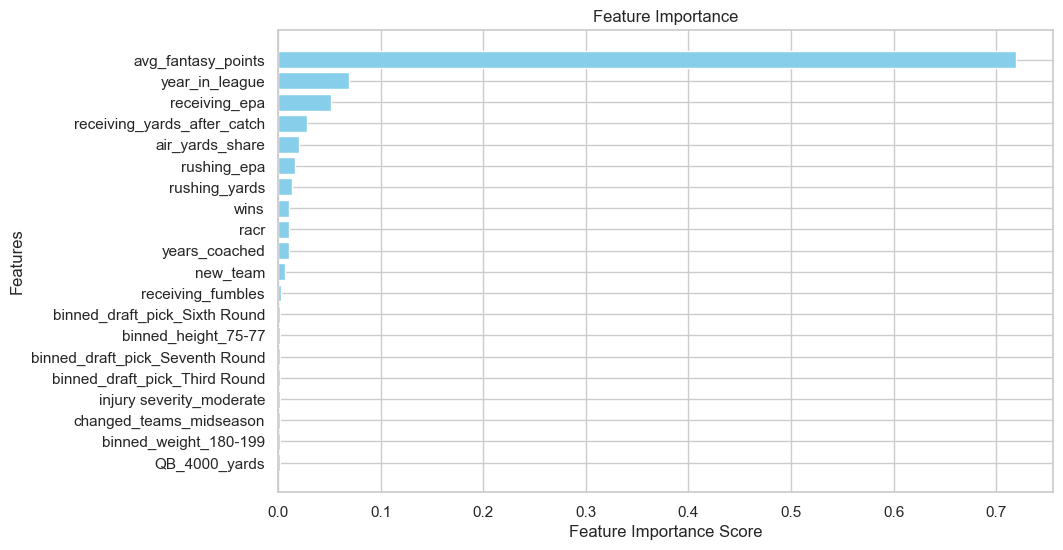

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 61.59304671985277
R-squared: 0.49747904191329684


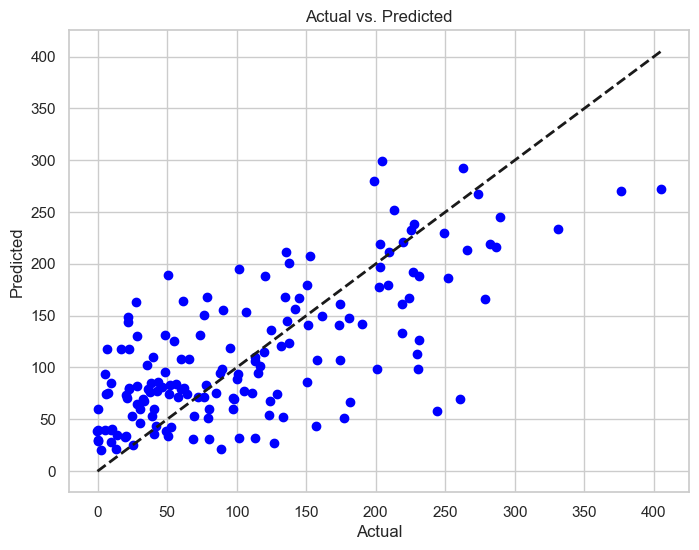

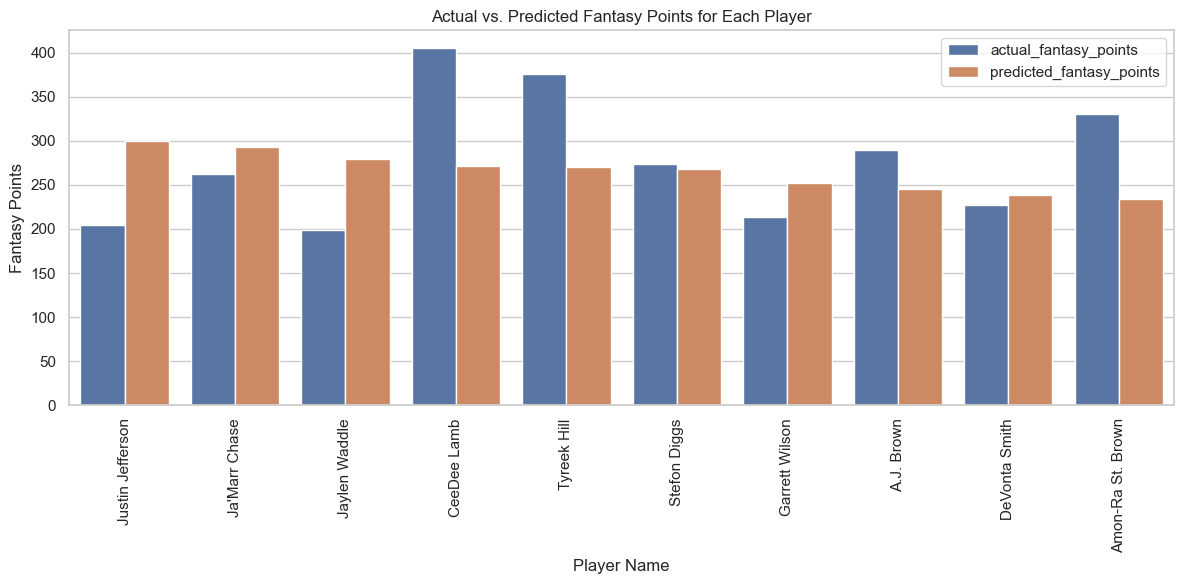

In [590]:
gb_results = gradientboosting(train_X, test_X, train_y, test_y, test_ids_names)

### Voting Regression

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 60.176980074472944
R-squared: 0.520320030657577


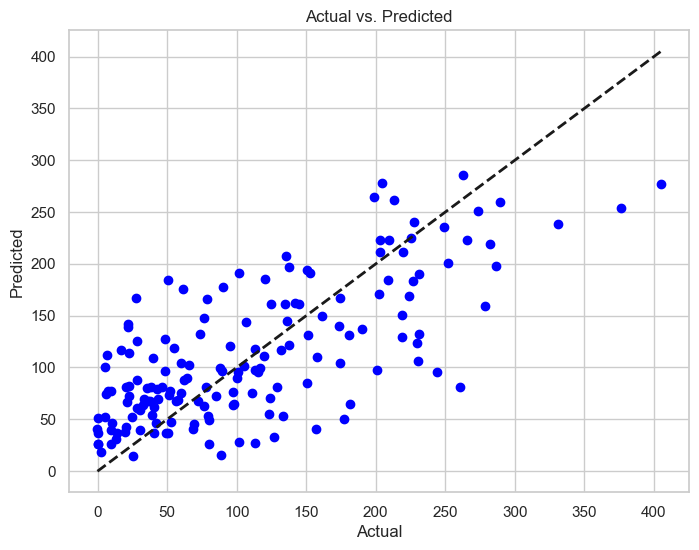

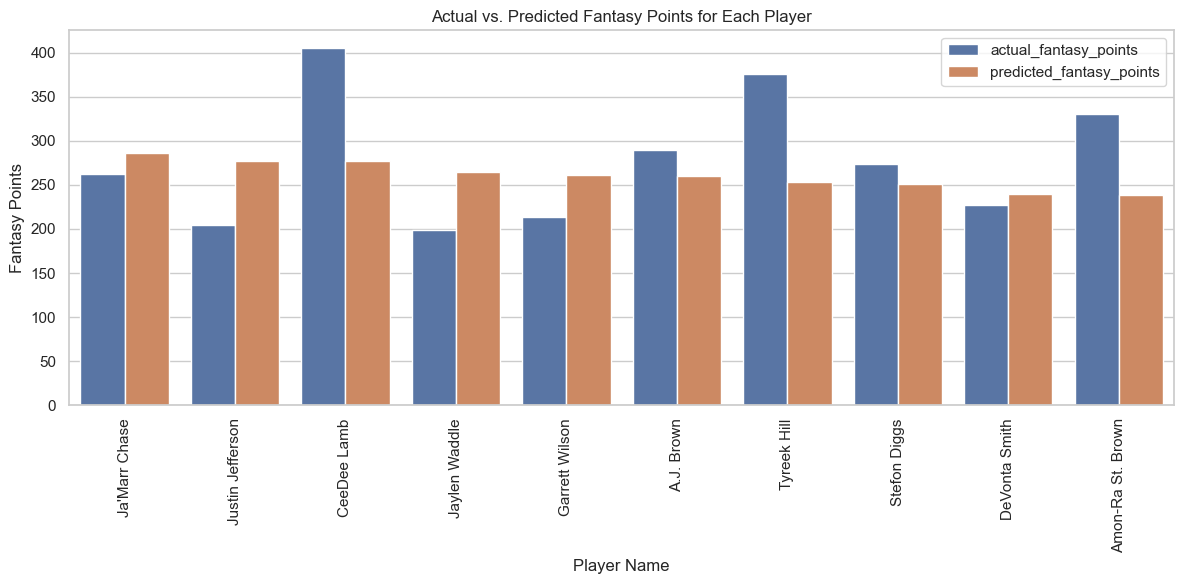

In [591]:
votingregressor(xg_results, gb_results )

## Running Back Analysis

### Regression

In [592]:
#this drops all the rookie data
rb_df.dropna(axis = 0, inplace=True)

In [593]:
rb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 3756 to 4870
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   player_id                          1853 non-null   object  
 1   player_name                        1853 non-null   object  
 2   position                           1853 non-null   object  
 3   season                             1853 non-null   int64   
 4   games_played                       1853 non-null   int64   
 5   injured                            1853 non-null   int64   
 6   injury type                        1853 non-null   object  
 7   injury severity                    1853 non-null   object  
 8   season ending                      1853 non-null   object  
 9   new_team                           1853 non-null   int64   
 10  QB_4000_yards                      1853 non-null   int64   
 11  Receiving_1000_yards               1853 

In [601]:
x = pd.get_dummies(rb_df.drop(columns=['player_id', 'player_name','season',
                                     'fantasy_points_ppr_next_season', 'fantasy_points_per_game']),drop_first=True).astype(float)
y = rb_df['fantasy_points_ppr_next_season'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)

In [595]:
multicollinearity(x)

C:\Users\alexs\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\alexs\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


feature    games_played
VIF            2.700518
Name: 0, dtype: object
feature     injured
VIF        1.724887
Name: 1, dtype: object
feature    new_team
VIF        1.251307
Name: 2, dtype: object
feature    QB_4000_yards
VIF             1.333482
Name: 3, dtype: object
feature    Receiving_1000_yards
VIF                    1.212671
Name: 4, dtype: object
feature        racr
VIF        1.133142
Name: 5, dtype: object
feature    target_share
VIF            2.914453
Name: 6, dtype: object
feature    air_yards_share
VIF               1.974987
Name: 7, dtype: object
feature        wopr
VIF        5.859317
Name: 8, dtype: object
feature    rushing_fumbles
VIF               2.049969
Name: 9, dtype: object
feature    rushing_epa
VIF           1.500607
Name: 10, dtype: object
feature    rushing_2pt_conversions
VIF                       1.084145
Name: 11, dtype: object
feature    receiving_tds
VIF             2.020224
Name: 12, dtype: object
feature    receiving_fumbles
VIF                  1.21

feature       VIF
0                       games_played  2.700518
1                            injured  1.724887
2                           new_team  1.251307
3                      QB_4000_yards  1.333482
4               Receiving_1000_yards  1.212671
..                               ...       ...
100   binned_draft_pick_Fourth Round  3.565070
101    binned_draft_pick_Fifth Round  2.690307
102    binned_draft_pick_Sixth Round  2.516110
103  binned_draft_pick_Seventh Round  2.056960
104      binned_draft_pick_Undrafted  4.768112

[105 rows x 2 columns]

In [602]:
x.drop(columns = ['injury type_knee', 'injury type_no injury', 'injury type_suspension', 'injury type_sports-hernia', 'injury type_shoulder, knee', 'injury severity_minor, moderate', 'injury severity_no injury', 'injury severity_suspended', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_78-80', 'injury severity_suspension', 'games_played', 'fantasy_points_ppr'], inplace = True)

In [603]:
multicollinearity(x)

feature     injured
VIF        2.210379
Name: 0, dtype: object
feature    new_team
VIF        1.456338
Name: 1, dtype: object
feature    QB_4000_yards
VIF             1.749639
Name: 2, dtype: object
feature    Receiving_1000_yards
VIF                    2.577711
Name: 3, dtype: object
feature       racr
VIF        1.11247
Name: 4, dtype: object
feature    target_share
VIF           11.601415
Name: 5, dtype: object
feature    air_yards_share
VIF               1.957687
Name: 6, dtype: object
feature         wopr
VIF        12.322727
Name: 7, dtype: object
feature    rushing_fumbles
VIF               2.543188
Name: 8, dtype: object
feature    rushing_epa
VIF           1.775966
Name: 9, dtype: object
feature    rushing_2pt_conversions
VIF                       1.134039
Name: 10, dtype: object
feature    receiving_tds
VIF             2.767156
Name: 11, dtype: object
feature    receiving_fumbles
VIF                 1.510358
Name: 12, dtype: object
feature    receiving_air_yards
VIF          

feature       VIF
0                           injured  2.210379
1                          new_team  1.456338
2                     QB_4000_yards  1.749639
3              Receiving_1000_yards  2.577711
4                              racr  1.112470
..                              ...       ...
86   binned_draft_pick_Fourth Round  2.338327
87    binned_draft_pick_Fifth Round  1.827564
88    binned_draft_pick_Sixth Round  1.954151
89  binned_draft_pick_Seventh Round  1.435462
90      binned_draft_pick_Undrafted  3.289996

[91 rows x 2 columns]

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.542
Model:                                        OLS   Adj. R-squared:                  0.509
Method:                             Least Squares   F-statistic:                     16.26
Date:                            Mon, 20 May 2024   Prob (F-statistic):          1.18e-149
Time:                                    16:36:17   Log-Likelihood:                -7200.3
No. Observations:                            1297   AIC:                         1.458e+04
Df Residuals:                                1208   BIC:                         1.504e+04
Df Model:                                      88                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

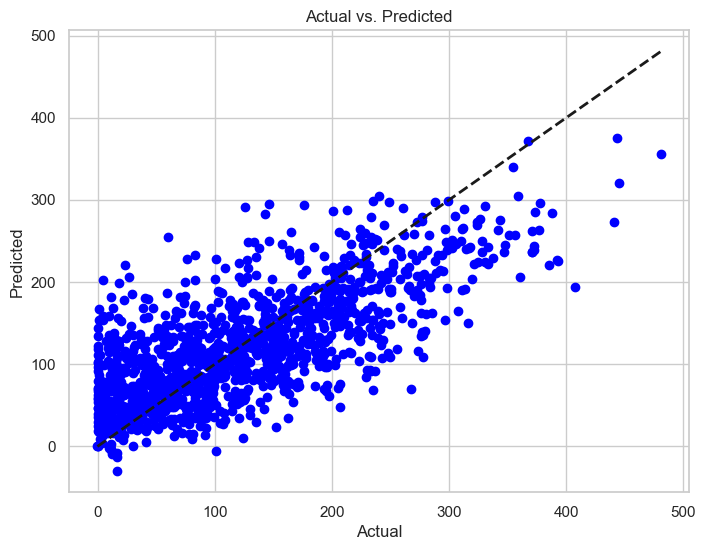

RMSE Training = 62.33970026982344


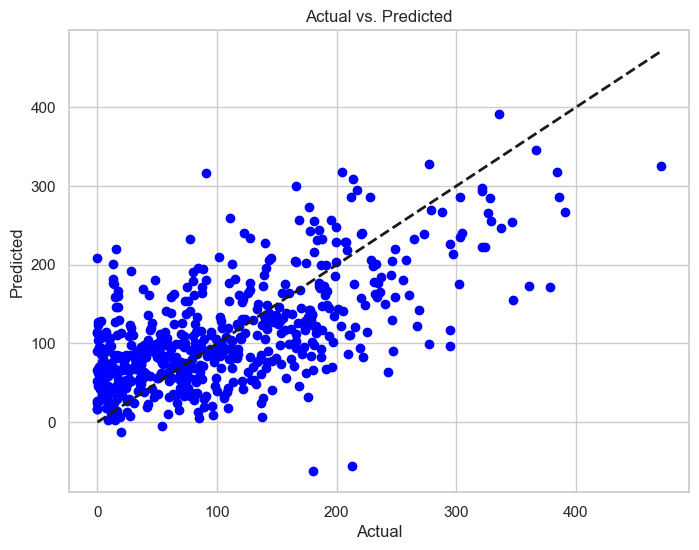

RMSE Testing = 69.32386854421456


In [604]:
linear_reg(x_train, x_test, y_train, y_test)

In [605]:
train_rb = rb_df[rb_df['season']!=2022]
test_rb = rb_df[rb_df['season']==2022]

In [609]:
# Saving player_id and player_name before dropping them
train_ids_names = train_rb[['player_id', 'player_name']]
test_ids_names = test_rb[['player_id', 'player_name']]

train_X = pd.get_dummies(train_rb.drop(columns=['position','player_id','player_name','season','fantasy_points_ppr_next_season','fantasy_points_per_game' ]),drop_first=True).astype(float)
train_y = train_rb['fantasy_points_ppr_next_season'].astype(float)
test_X = pd.get_dummies(test_rb.drop(columns=['position','player_id','player_name','season','fantasy_points_ppr_next_season','fantasy_points_per_game']),drop_first=True).astype(float)
test_y = test_rb['fantasy_points_ppr_next_season'].astype(float)
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

In [610]:
train_X.drop(columns = ['injury type_knee', 'injury type_no injury', 'injury type_suspension', 'injury type_sports-hernia', 'injury type_shoulder, knee', 'injury severity_minor, moderate', 'injury severity_no injury', 'injury severity_suspended', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_78-80', 'injury severity_suspension', 'games_played', 'fantasy_points_ppr'], inplace = True)
test_X.drop(columns = ['injury type_knee', 'injury type_no injury', 'injury type_suspension', 'injury type_sports-hernia', 'injury type_shoulder, knee', 'injury severity_minor, moderate', 'injury severity_no injury', 'injury severity_suspended', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_78-80', 'injury severity_suspension', 'games_played', 'fantasy_points_ppr'], inplace = True)

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.523
Model:                                        OLS   Adj. R-squared:                  0.498
Method:                             Least Squares   F-statistic:                     20.82
Date:                            Mon, 20 May 2024   Prob (F-statistic):          1.97e-210
Time:                                    16:40:35   Log-Likelihood:                -9892.8
No. Observations:                            1780   AIC:                         1.997e+04
Df Residuals:                                1690   BIC:                         2.046e+04
Df Model:                                      89                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

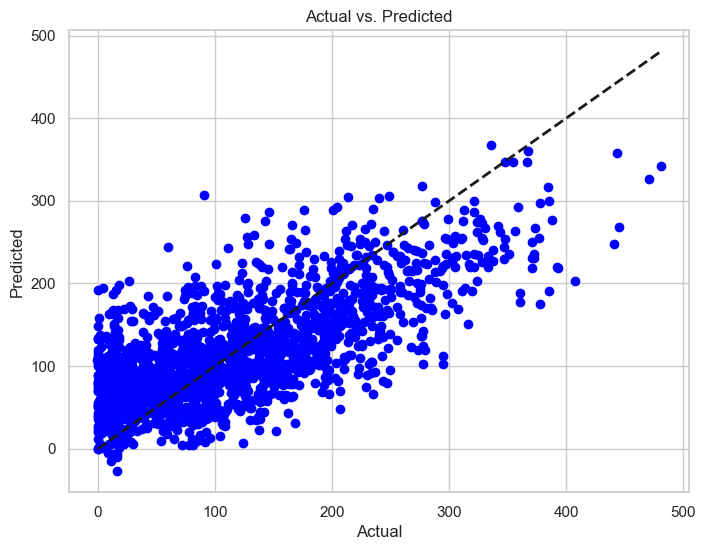

RMSE Training = 62.73002009371032


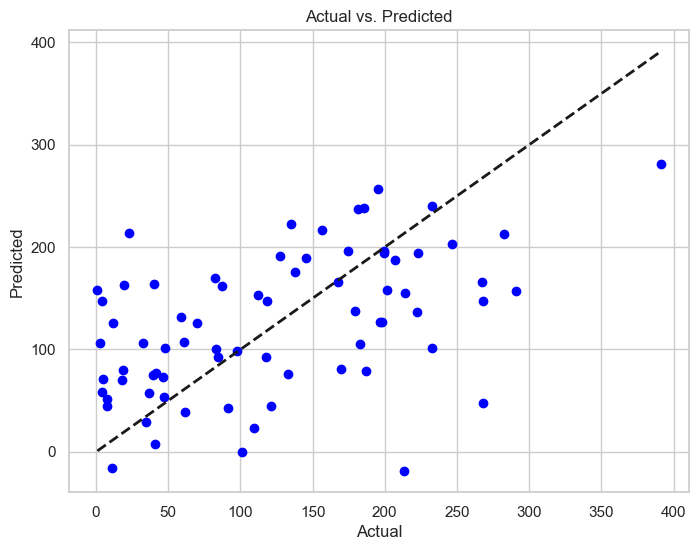

RMSE Testing = 81.90013292497324


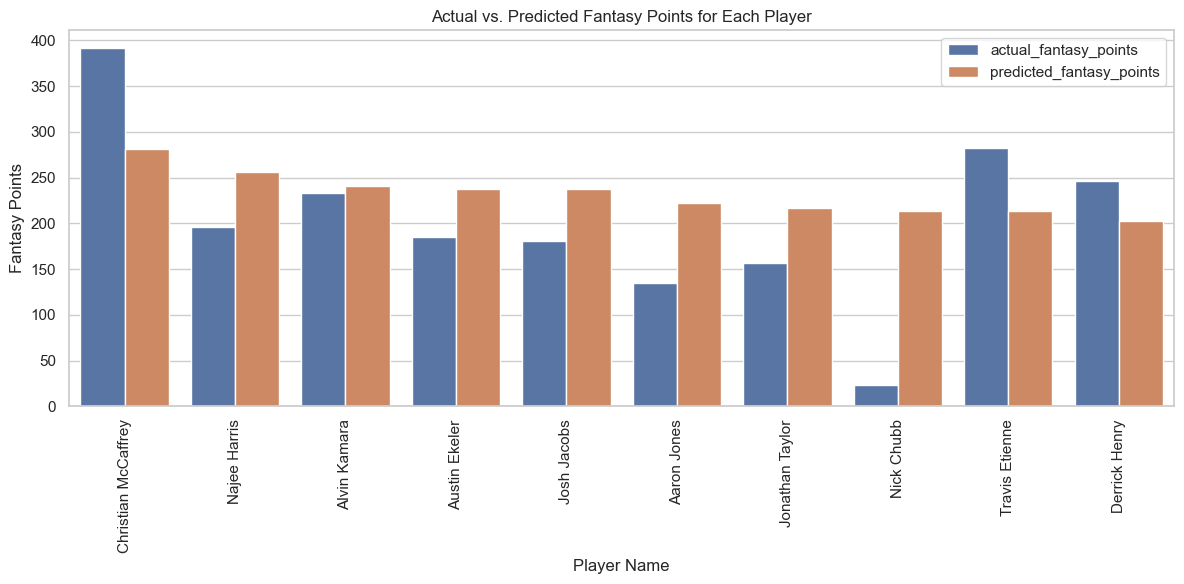

In [611]:
#predicts outcome for the 2023 season
linear_reg(train_X, test_X, train_y, test_y, test_ids_names)

### Random Forest

Out-of-Bag Score: 0.46375276360570716
Root Mean Squared Error: 82.79695262996844
R-squared: 0.1499327555956267


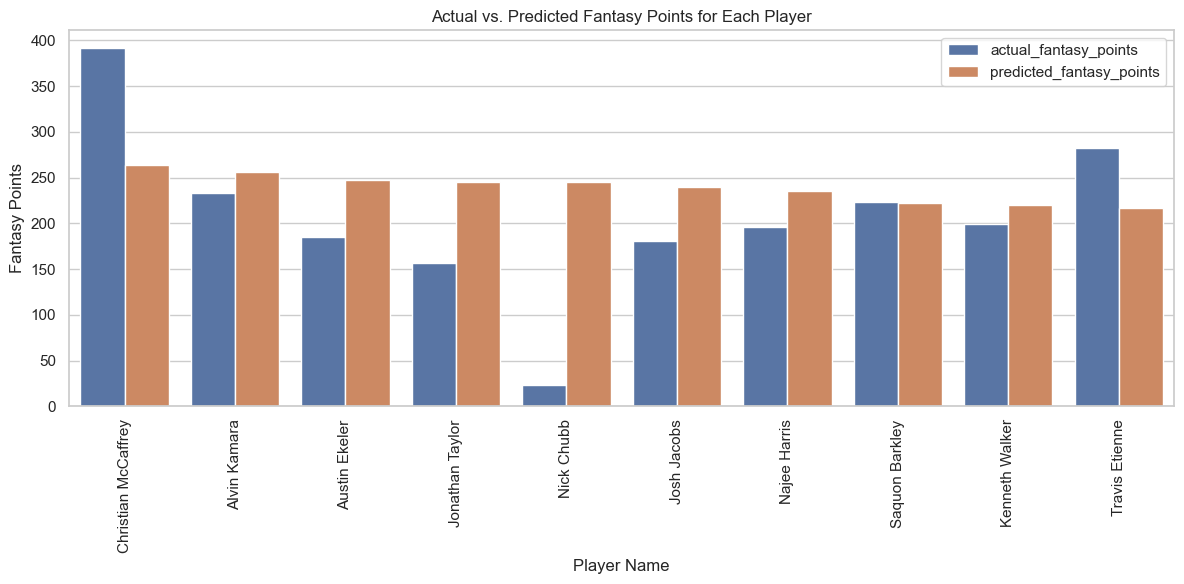

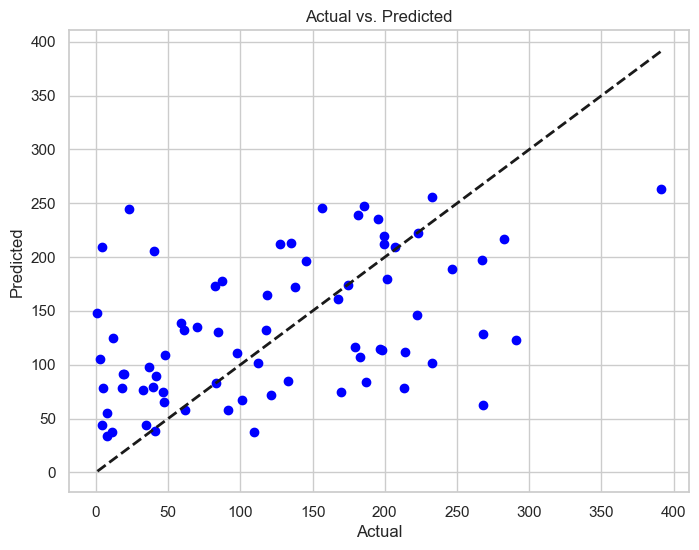

       player_id          player_name  actual_fantasy_points  \
1619  00-0033280  Christian McCaffrey                  391.3   
225   00-0033906         Alvin Kamara                  233.0   
551   00-0033699        Austin Ekeler                  185.4   
4433  00-0036223      Jonathan Taylor                  156.4   
6213  00-0034791           Nick Chubb                   23.1   

      predicted_fantasy_points  actual_points_rank  predicted_points_rank  
1619                263.431789                 1.0                    1.0  
225                 255.580684                 8.0                    2.0  
551                 247.211256                22.0                    3.0  
4433                245.678332                29.0                    4.0  
6213                244.655114                61.0                    5.0  


In [612]:
results = randomforest(train_X, test_X, train_y, test_y, test_ids_names)

# Display results
print(results.head())

In [613]:
results.sort_values('predicted_fantasy_points',ascending=False).head(60)

player_id            player_name  actual_fantasy_points  \
1619  00-0033280    Christian McCaffrey                 391.30   
225   00-0033906           Alvin Kamara                 233.00   
551   00-0033699          Austin Ekeler                 185.40   
4433  00-0036223        Jonathan Taylor                 156.40   
6213  00-0034791             Nick Chubb                  23.10   
4551  00-0035700            Josh Jacobs                 181.10   
6155  00-0036893           Najee Harris                 195.50   
7181  00-0034844         Saquon Barkley                 223.20   
4870  00-0038134         Kenneth Walker                 199.40   
7883  00-0036973         Travis Etienne                 282.40   
44    00-0033293            Aaron Jones                 134.90   
1811  00-0036275          D'Andre Swift                 199.30   
482   00-0036328         Antonio Gibson                 127.40   
5390  00-0033856      Leonard Fournette                   4.00   
2212  00-0035685       David Montgomery                 207.20   
1887  00-0033893            Dalvin Cook                  40.20   
4325  00-0033897              Joe Mixon                 267.00   
6713  00-0036875    Rhamondre Stevenson                 145.70   
2497  00-0032764          Derrick Henry                 246.66   
3765  00-0033553           James Conner                 201.50   
6086  00-0035243          Miles Sanders                  87.60   
3110  00-0033045        Ezekiel Elliott                 174.50   
1889  00-0037258          Dameon Pierce                  82.70   
8054  00-0037263         Tyler Allgeier                 137.60   
4751  00-0033923            Kareem Hunt                 118.50   
2588  00-0035250       Devin Singletary                 167.34   
3796  00-0035831         James Robinson                   1.00   
7823  00-0035261           Tony Pollard                 222.60   
5902  00-0036924         Michael Carter                  58.80   
1660  00-0036360  Clyde Edwards-Helaire                  70.10   
7     00-0036265            A.J. Dillon                 117.60   
3720  00-0033948        Jamaal Williams                  60.80   
4111  00-0031376        Jerick McKinnon                  84.36   
6543  00-0037256          Rachaad White                 267.90   
3534  00-0036158           J.K. Dobbins                  11.70   
953   00-0038120            Breece Hall                 290.50   
3954  00-0036997       Javonte Williams                 179.20   
4000  00-0037228          Jaylen Warren                 196.40   
1057  00-0037746         Brian Robinson                 198.10   
3496  00-0037197          Isiah Pacheco                 213.90   
4868  00-0036919       Kenneth Gainwell                  97.38   
3003  00-0036567        Elijah Mitchell                  47.50   
1637  00-0036555          Chuba Hubbard                 182.50   
4915  00-0033118           Kenyan Drake                   3.10   
5024  00-0036906         Khalil Herbert                 112.50   
3767  00-0037248             James Cook                 232.70   
1719  00-0030578  Cordarrelle Patterson                  36.90   
1899  00-0035657          Damien Harris                  19.00   
5874  00-0032144          Melvin Gordon                  19.70   
4061  00-0034115         Jeffery Wilson                  41.30   
163   00-0034972     Alexander Mattison                 133.20   
3358  00-0034184            Gus Edwards                 187.00   
5293  00-0030513        Latavius Murray                  82.90   
1431  00-0034681          Chase Edmonds                  39.70   
6601  00-0034750          Rashaad Penny                   4.80   
4155  00-0037267            Jerome Ford                 213.20   
774   00-0034414           Boston Scott                  17.80   
8042  00-0035537             Ty Johnson                  32.40   
8368  00-0036251              Zack Moss                 169.60   
1209  00-0036414              Cam Akers        

### XGBoost

avg_fantasy_points: 0.235078
year_in_league: 0.080727
binned_draft_pick_Third Round: 0.047817
binned_height_72-74: 0.035635
receiving_2pt_conversions: 0.028934
ties: 0.025276
binned_weight_240-259: 0.025054
binned_draft_pick_Late Second Round: 0.024182
binned_weight_220-239: 0.023515
binned_draft_pick_Early 1st Round: 0.023312
receiving_epa: 0.021382
receiving_yards_after_catch: 0.021366
binned_height_69-71: 0.020313
injury type_leg: 0.019945
special_teams_tds: 0.019063
receiving_tds: 0.018683
years_coached: 0.018494
wopr: 0.018143
binned_weight_200-219: 0.017627
receiving_air_yards: 0.017626
rushing_fumbles: 0.017292
rushing_epa: 0.016778
racr: 0.016736
target_share: 0.016349
air_yards_share: 0.015900
injury type_thigh: 0.015284
QB_4000_yards: 0.014391
changed_teams_midseason: 0.013259
wins: 0.013105
injury severity_severe: 0.013099
receiving_fumbles: 0.012986
new_team: 0.011142
injury type_acl: 0.010875
injured: 0.010435
injury type_arm: 0.010114
(1=firstyearwithteam,0=2+seasons): 0.

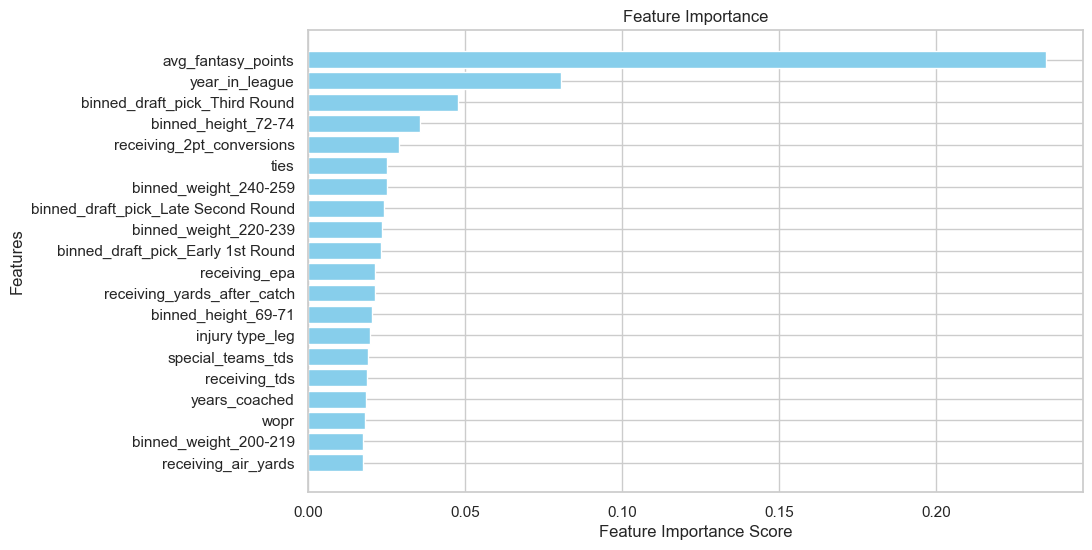

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Root Mean Squared Error: 89.11082619063721
R-squared: 0.015341766114079447


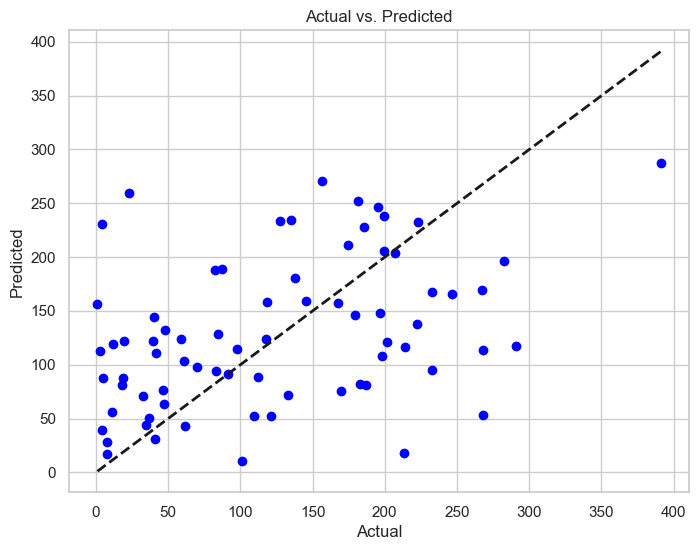

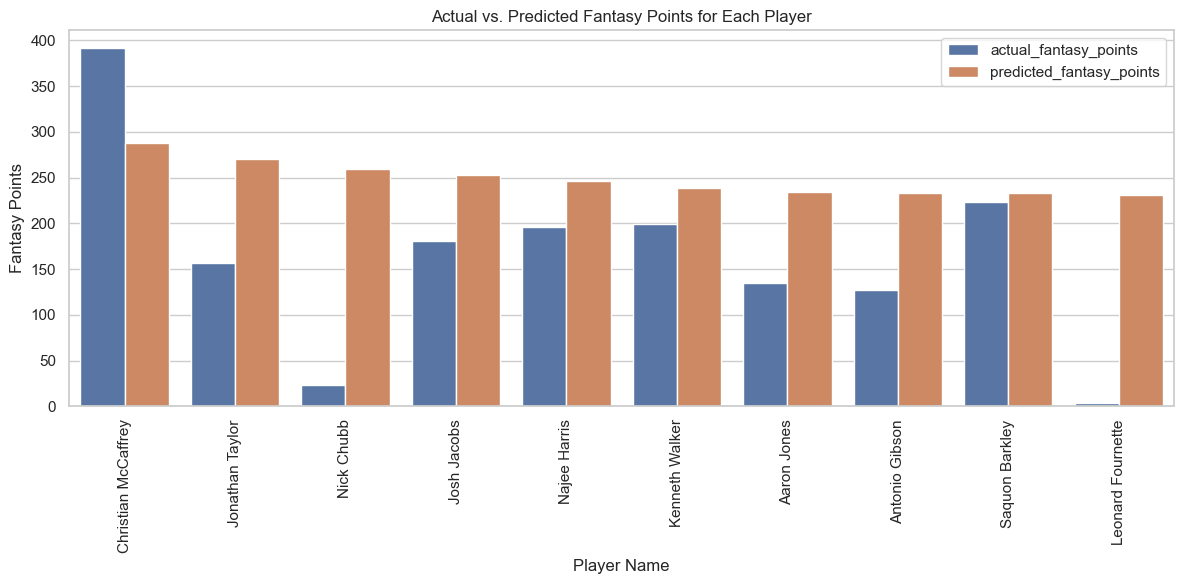

In [614]:
xg_results = xgboost(train_X, test_X, train_y, test_y, test_ids_names )

### Gradient Boosting

avg_fantasy_points: 0.569376
year_in_league: 0.101596
rushing_epa: 0.044679
receiving_epa: 0.042420
target_share: 0.038199
racr: 0.033381
air_yards_share: 0.024714
receiving_yards_after_catch: 0.019886
receiving_air_yards: 0.015778
rushing_fumbles: 0.015230
years_coached: 0.014325
wopr: 0.010922
wins: 0.009375
receiving_tds: 0.005841
injured: 0.005191
receiving_fumbles: 0.004546
binned_draft_pick_Seventh Round: 0.002593
new_team: 0.002541
binned_draft_pick_Third Round: 0.002473
binned_draft_pick_Late First Round: 0.002201
binned_draft_pick_Early 1st Round: 0.002004
binned_weight_200-219: 0.001992
QB_4000_yards: 0.001962
binned_weight_240-259: 0.001914
special_teams_tds: 0.001888
injury type_suspended: 0.001518
binned_draft_pick_Early Second Round: 0.001472
injury type_leg: 0.001404
injury type_acl: 0.001304
injury type_acl tear: 0.001262
receiving_2pt_conversions: 0.001240
injury type_knee tear: 0.001177
injury type_chest: 0.001165
binned_height_69-71: 0.001117
changed_teams_midseason:

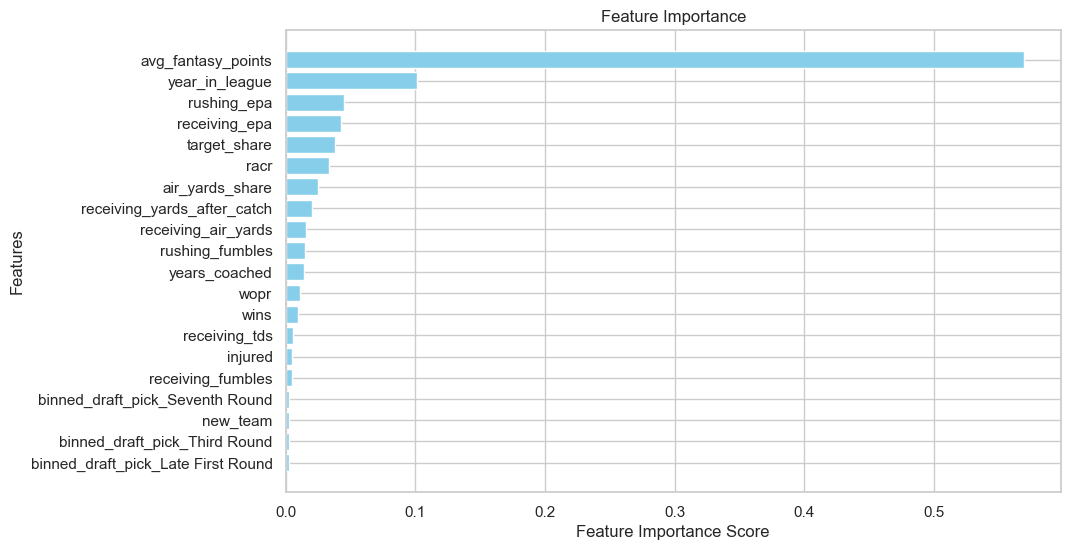

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 82.02852226565511
R-squared: 0.16563831571808385


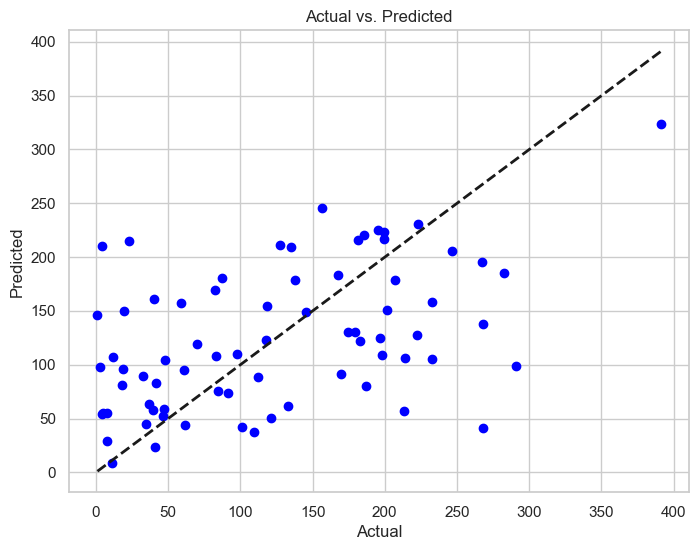

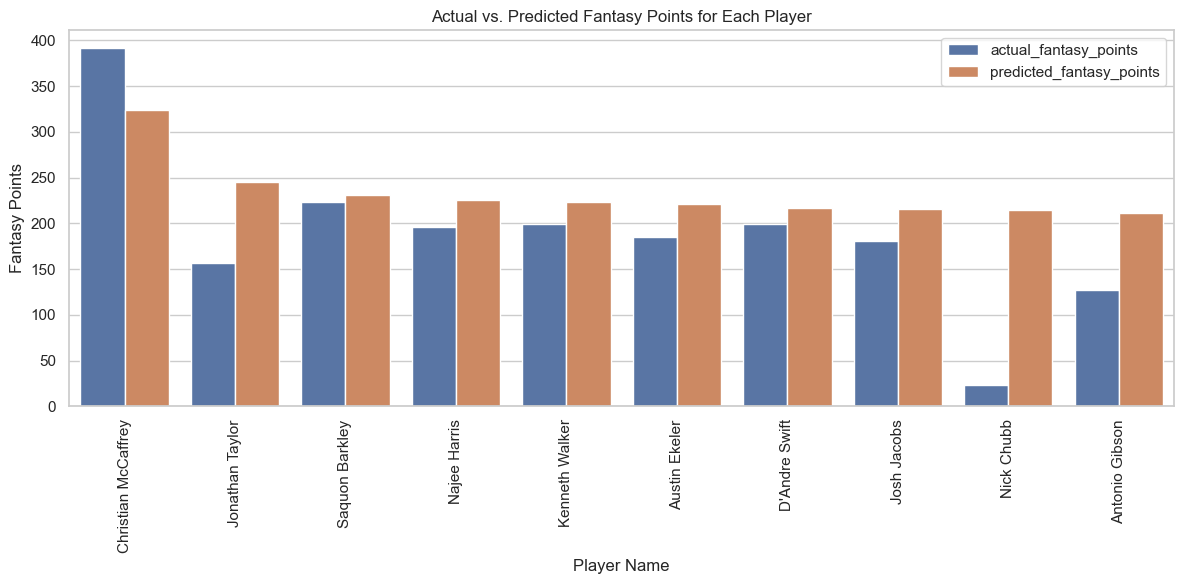

In [615]:
gb_results = gradientboosting(train_X, test_X, train_y, test_y, test_ids_names)

### Voting Regression

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 84.7567886767578
R-squared: 0.10921362962902348


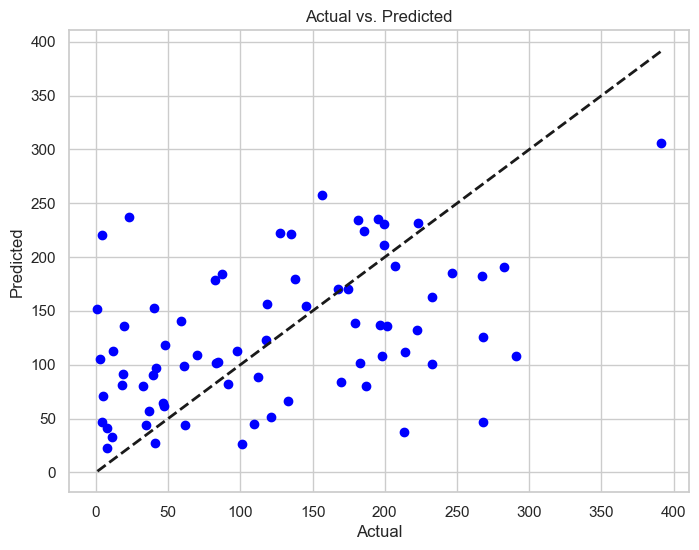

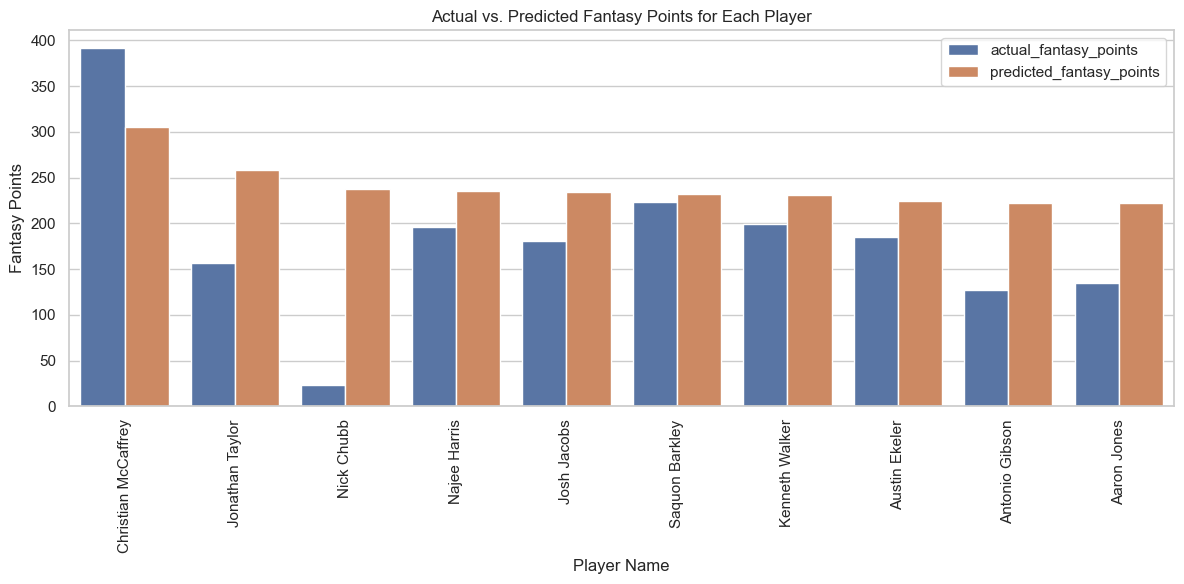

In [616]:
votingregressor(xg_results, gb_results )